In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(rc={'figure.figsize':(20,10)})
import data_utils as t
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('../data/survey_results_public_2020.csv')
schema = pd.read_csv('../data/survey_results_schema_2020.csv')

### Dataset Describtion(first look)
#### distribution of the numerical field and their correlation shows: 
* stackoverflow survey 2020.
* there were 64000 participants from 183 count
* a summary of numerical filed in the data set
* participants on average are 30 years old
* salary (ConvertedComp) of the 50% of participants is 50K
* salary per week in USD is mostly in the range of 0k to 25k
* majority of the participants are working 40 hours a week
* weekly working hours and age of the participants are positively correlated
* salary and weekly hours are positively correlated

,Respondent,Age,CompTotal,ConvertedComp,WorkWeekHrs
count,64461.000000,45446.000000,3.482600e+04,3.475600e+04,41151.000000
mean,32554.079738,30.834111,3.190464e+242,1.037561e+05,40.782174
std,18967.442360,9.585392,inf,2.268853e+05,17.816383
min,1.000000,1.000000,0.000000e+00,0.000000e+00,1.000000
25%,16116.000000,24.000000,2.000000e+04,2.464800e+04,40.000000
50%,32231.000000,29.000000,6.300000e+04,5.404900e+04,40.000000
75%,49142.000000,35.000000,1.250000e+05,9.500000e+04,44.000000
max,65639.000000,279.000000,1.111111e+247,2.000000e+06,475.000000


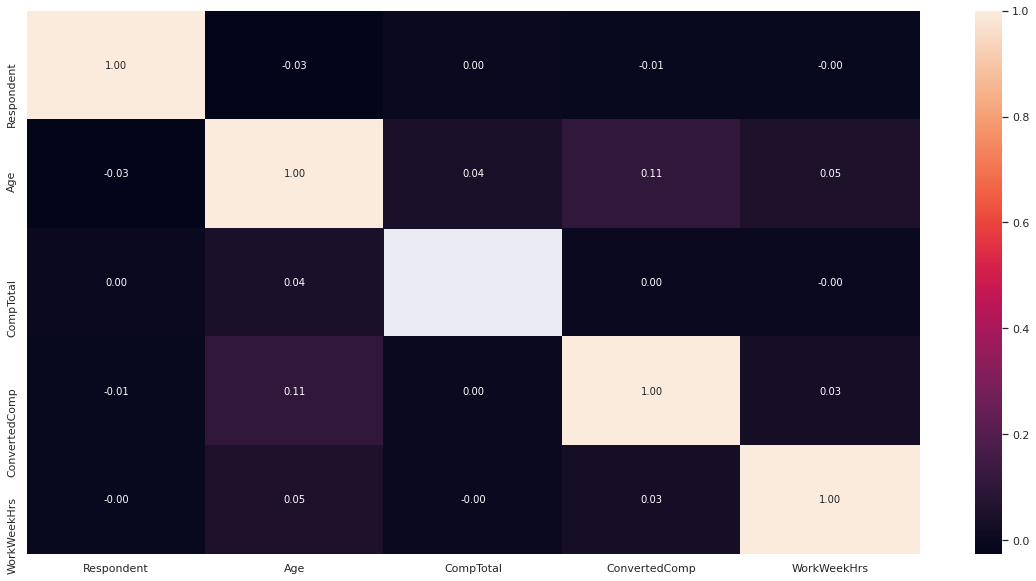

In [3]:
plt.figure(figsize=(20, 10))

sns.heatmap(df.corr(), annot=True, fmt='0.2f');
df.describe()

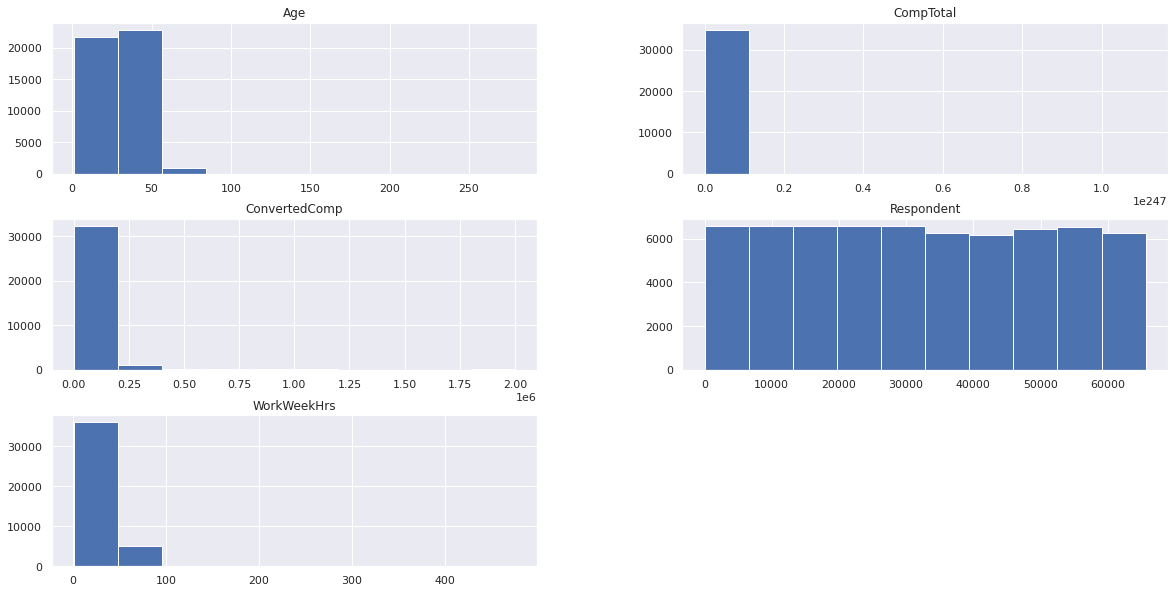

In [4]:
df.hist(figsize=(20,10));

In [5]:
df.head()


,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [4]:
df['HigherEd'] = df.EdLevel.apply(t.higher_ed) 
df['JobSatisfied'] = df.JobSat.apply(t.job_satisfaction)


In [7]:
schema.head(20)

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,MainBranch,Which of the following options best describes ...
2,Hobbyist,Do you code as a hobby?
3,Age,What is your age (in years)? If you prefer not...
4,Age1stCode,At what age did you write your first line of c...
5,CompFreq,"Is that compensation weekly, monthly, or yearly?"
6,CompTotal,What is your current total compensation (salar...
7,ConvertedComp,Salary converted to annual USD salaries using ...
8,Country,Where do you live?
9,CurrencyDesc,Which currency do you use day-to-day? If your ...


#### Rows with missing values
* looking at left skewed histigram below many rows are missing more than 80% of their values
* in the following we will check which columns are missing most of thier values

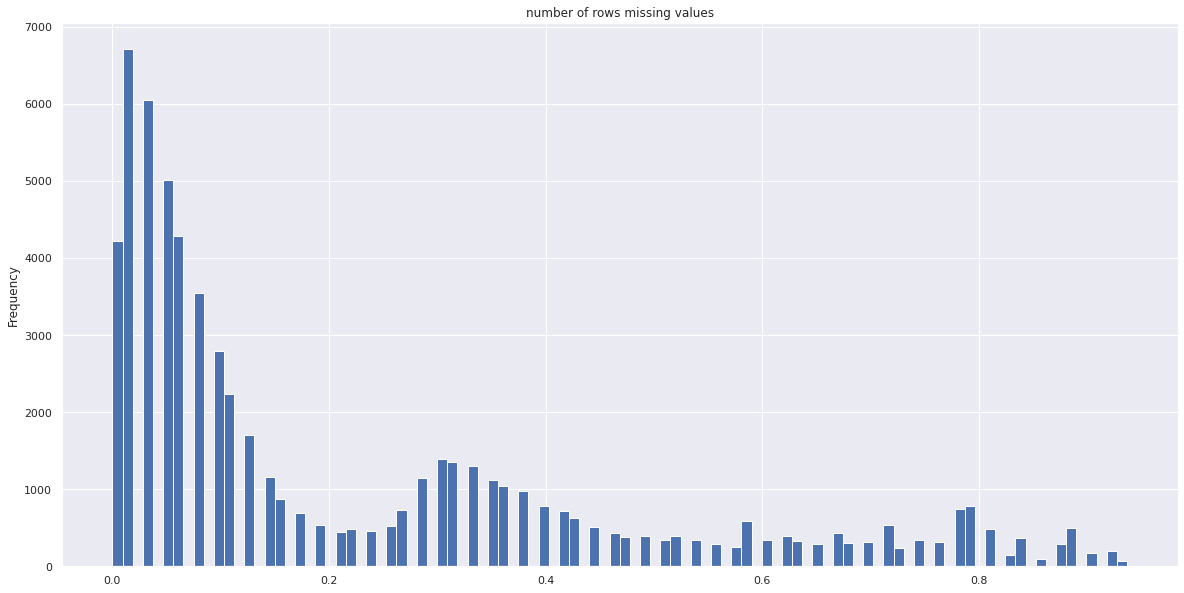

In [8]:
df = t.get_missing_row_percentage(df);
df.MissingRows.plot(kind='hist', bins=100, figsize=(20,10), title='number of rows missing values');

#### Columns with missing values
* the bar plot below showed percentage of missing values on each columns
* it is filtered by more 15% missing values
* participants were reluctant to enter information regarding salary and research for purchasing softwares
* we can combine the percentage of values missing in each row and columns
* the following columns are missing the most:

In [14]:
outliers_columns_row=t.get_outliers(df[df.MissingRows>0.5],0.8);
for c in outliers_columns_row.OutlierLabels:
    print(''.join(['\n',c,' : ',schema[schema.Column==c].QuestionText.values[0]])) 
    


Age : What is your age (in years)? If you prefer not to answer, you may leave this question blank.

CompFreq : Is that compensation weekly, monthly, or yearly?

CompTotal : What is your current total compensation (salary, bonuses, and perks, before taxes and deductions), in `CurrencySymbol`? Please enter a whole number in the box below, without any punctuation. If you are paid hourly, please estimate an equivalent weekly, monthly, or yearly salary. If you prefer not to answer, please leave the box empty.

ConvertedComp : Salary converted to annual USD salaries using the exchange rate on 2020-02-19, assuming 12 working months and 50 working weeks.

Ethnicity : Which of the following describe you, if any? Please check all that apply. If you prefer not to answer, you may leave this question blank.

Gender : Which of the following describe you, if any? Please check all that apply. If you prefer not to answer, you may leave this question blank.

JobFactors : Imagine that you are deciding b

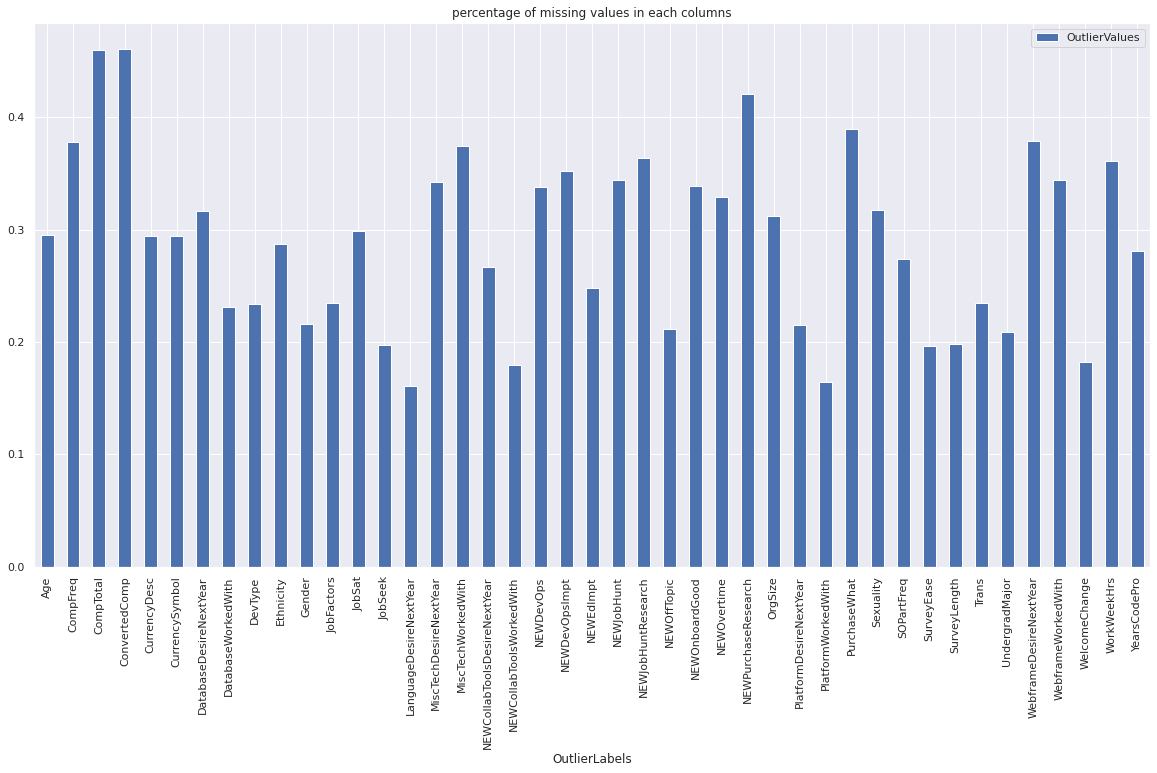

In [16]:
outliers = t.get_outliers(df, 0.15);

outliers.plot.bar(x='OutlierLabels', y='OutlierValues',figsize=(20,10), title='percentage of missing values in each columns');


### Removing nan values
* when we remove all nan values we lose significant amount of data

In [17]:

all_drop  = df.dropna()
print(all_drop.shape, df.shape)

(4213, 64) (64461, 64)


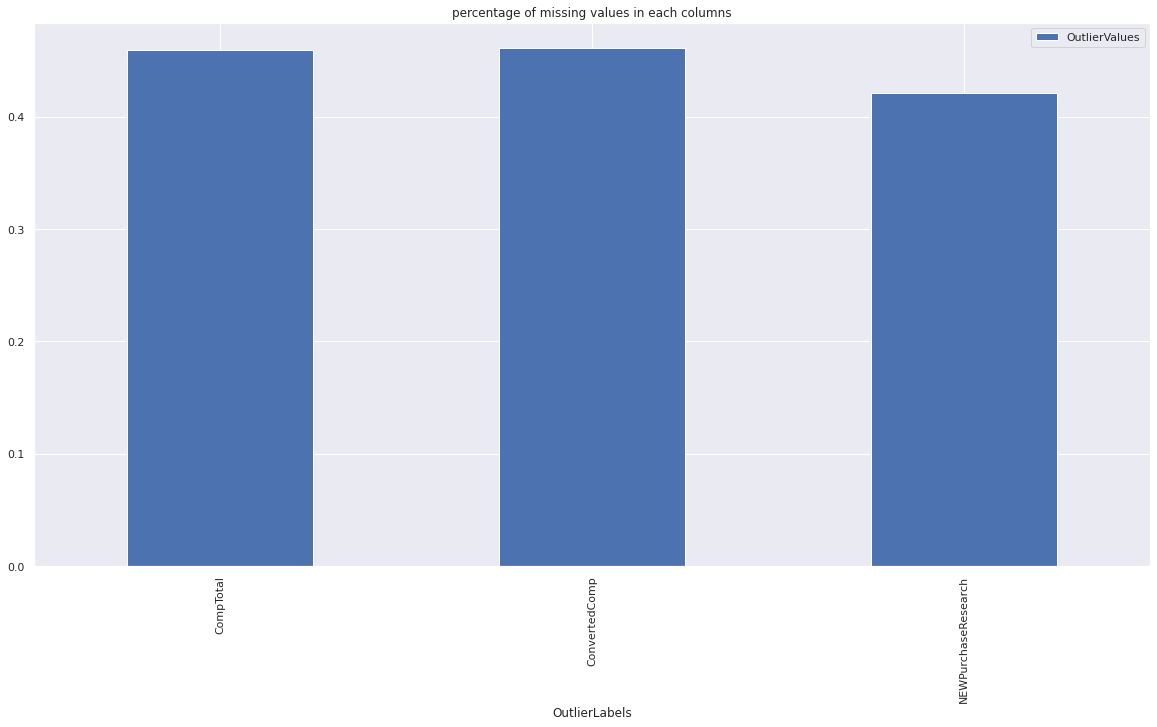

In [19]:
outliers = t.get_outliers(df,0.40);

outliers.plot.bar(x='OutlierLabels', y='OutlierValues',figsize=(20,10), title='percentage of missing values in each columns');


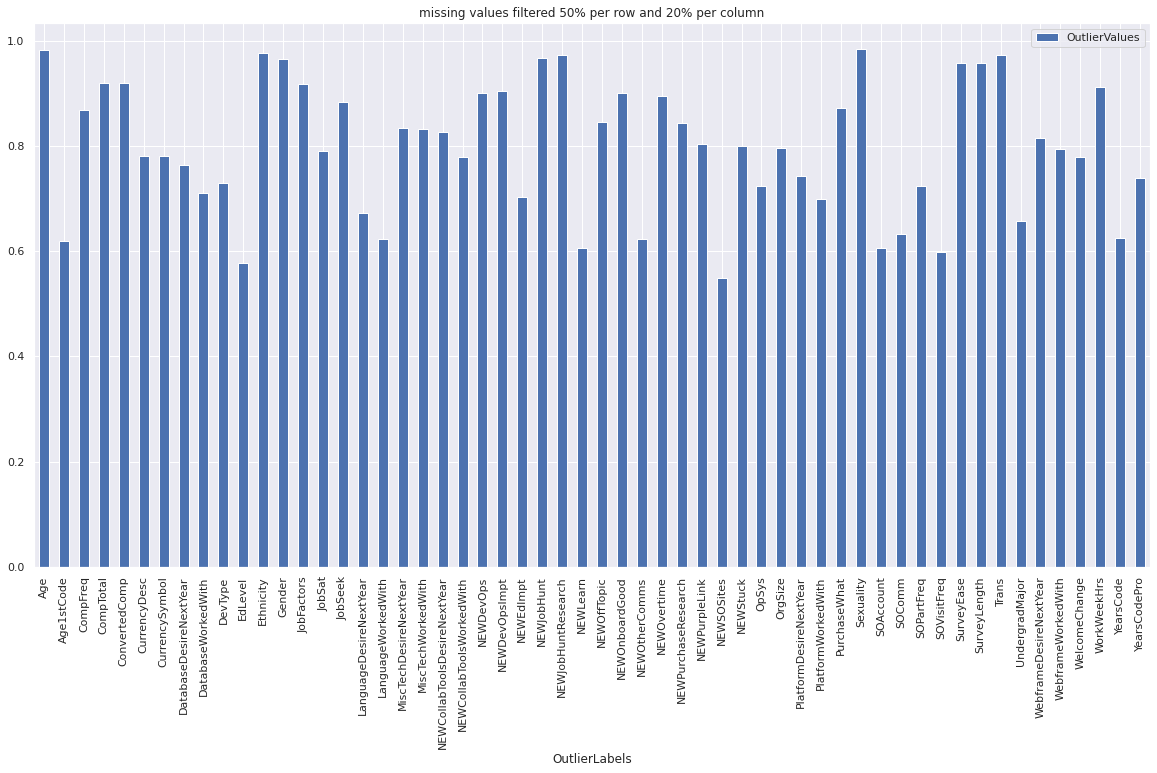

In [21]:
outliers_columns_row=t.get_outliers(df[df.MissingRows>0.5],0.2);
outliers_columns_row.plot.bar(x='OutlierLabels', y='OutlierValues',figsize=(20,10), title='missing values filtered 50% per row and 20% per column');


In [22]:
num_rows = df.shape[0] #Provide the number of rows in the dataset
num_cols = df.shape[1] #Provide the number of columns in the dataset

#### Looking at the categorical fields
* there are many 61 fields in the data set and 56 are categorical
* we need to look at their value ditribution including all the multiple and single choice values
* we need to check for missing values and fill them with potentiall and possible best alternatieve values




/home/ramzo/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/home/ramzo/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/ramzo/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


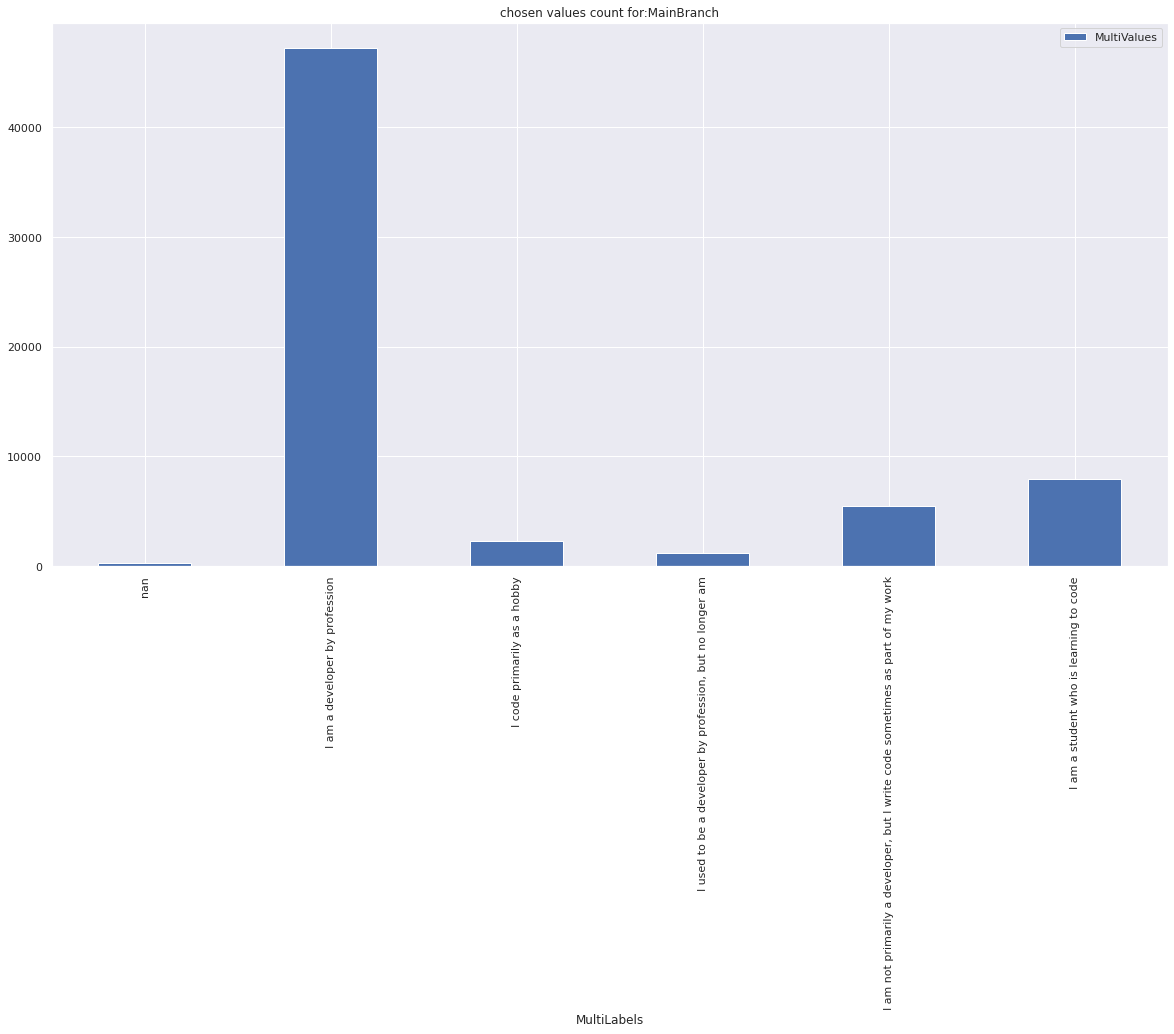

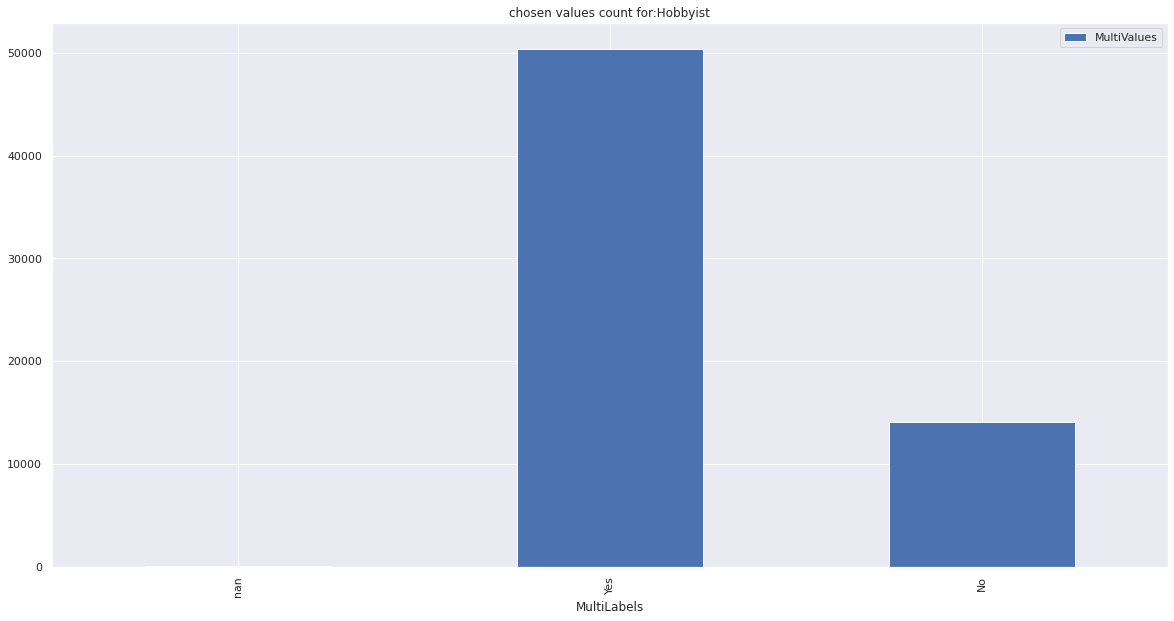

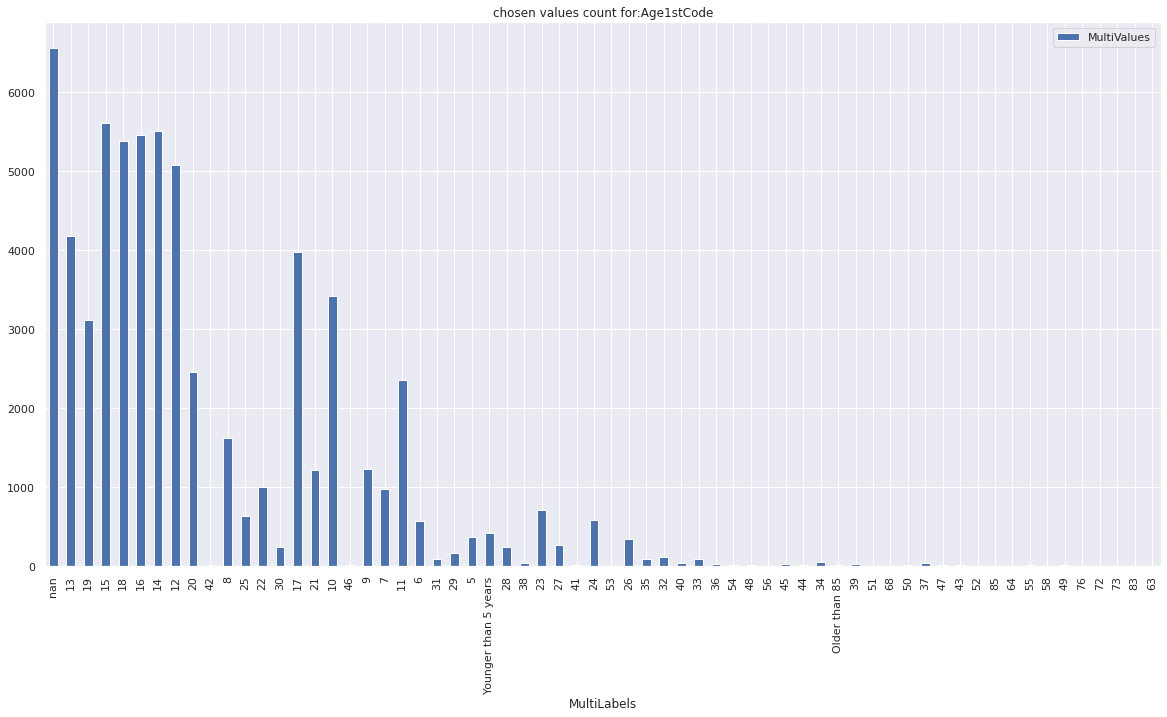

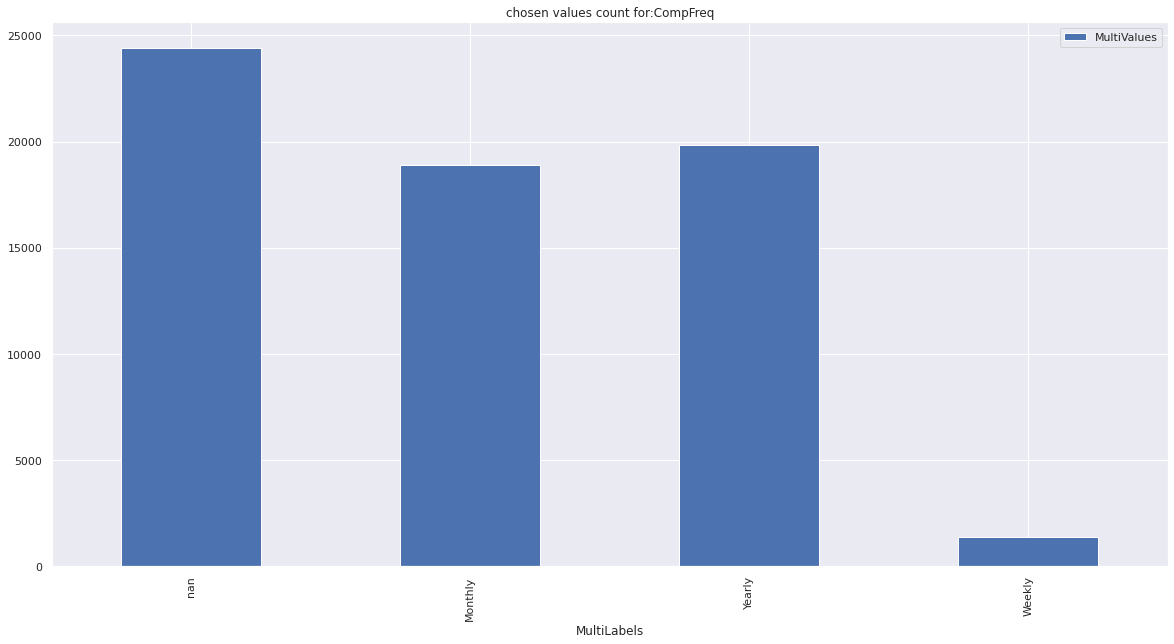

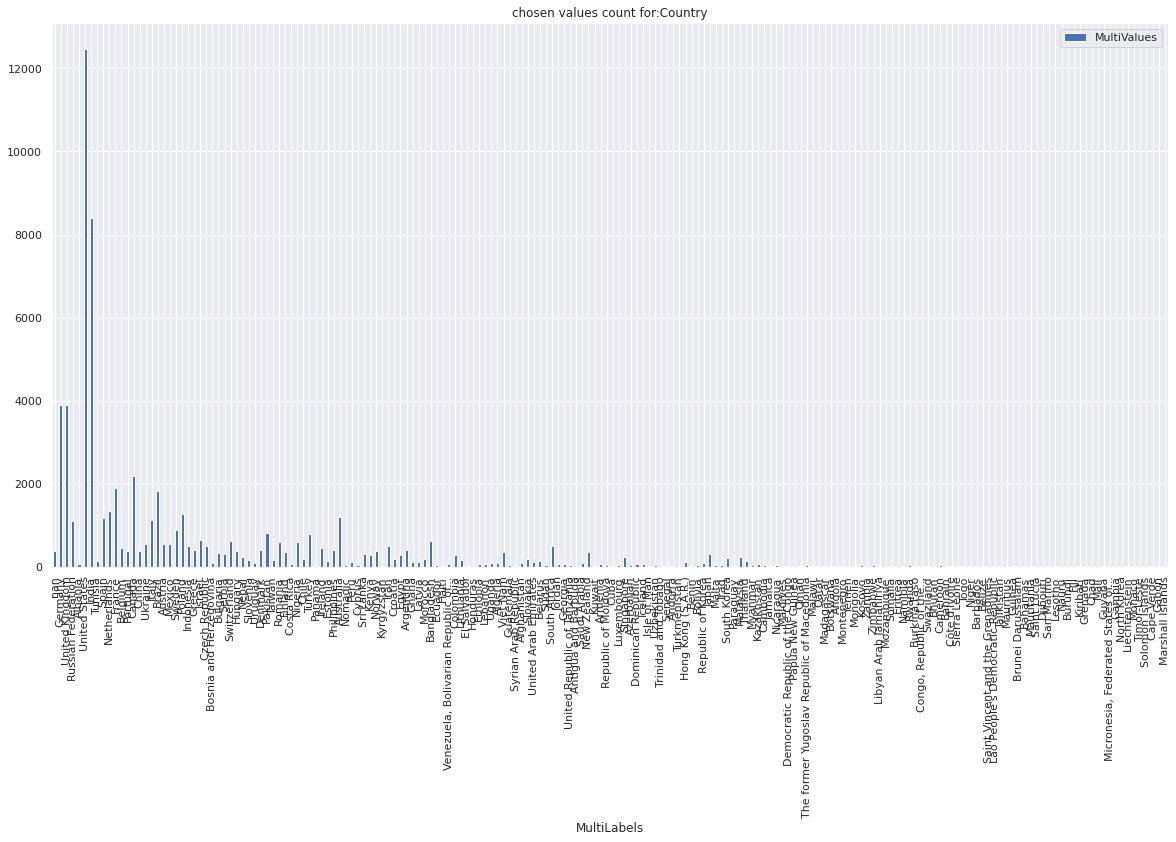

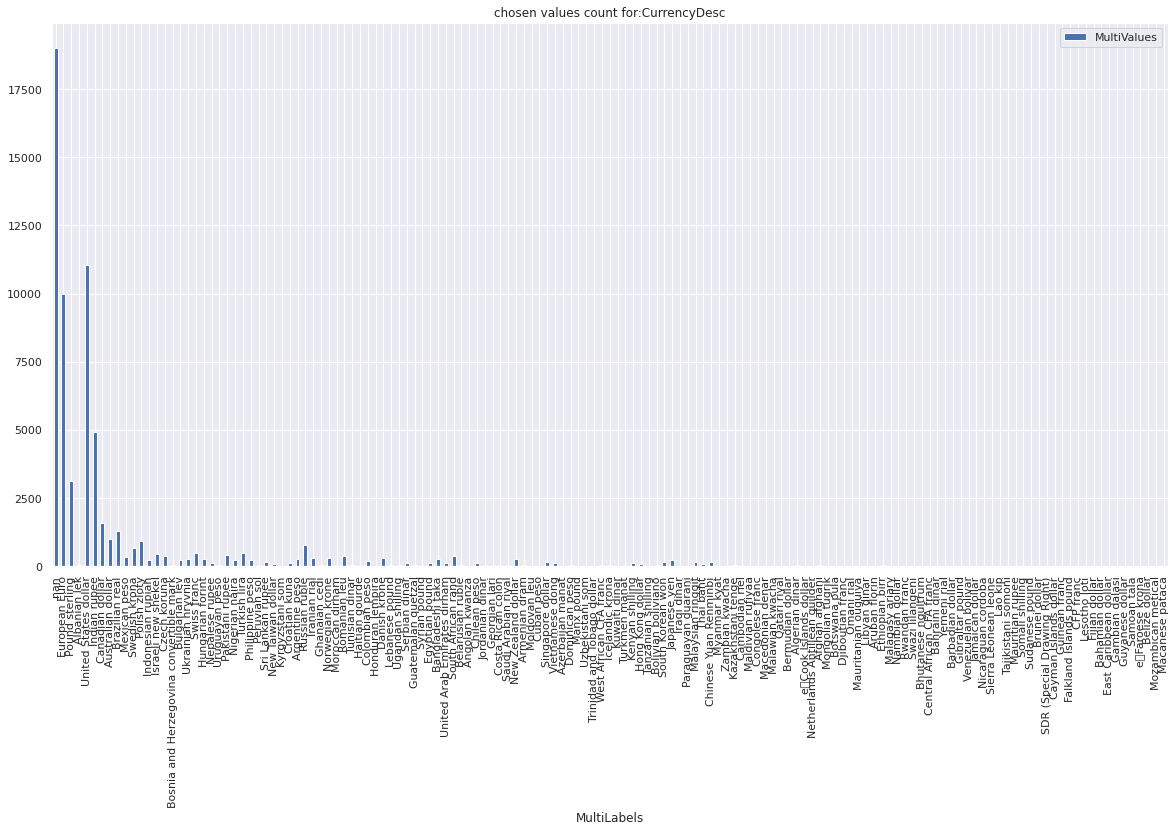

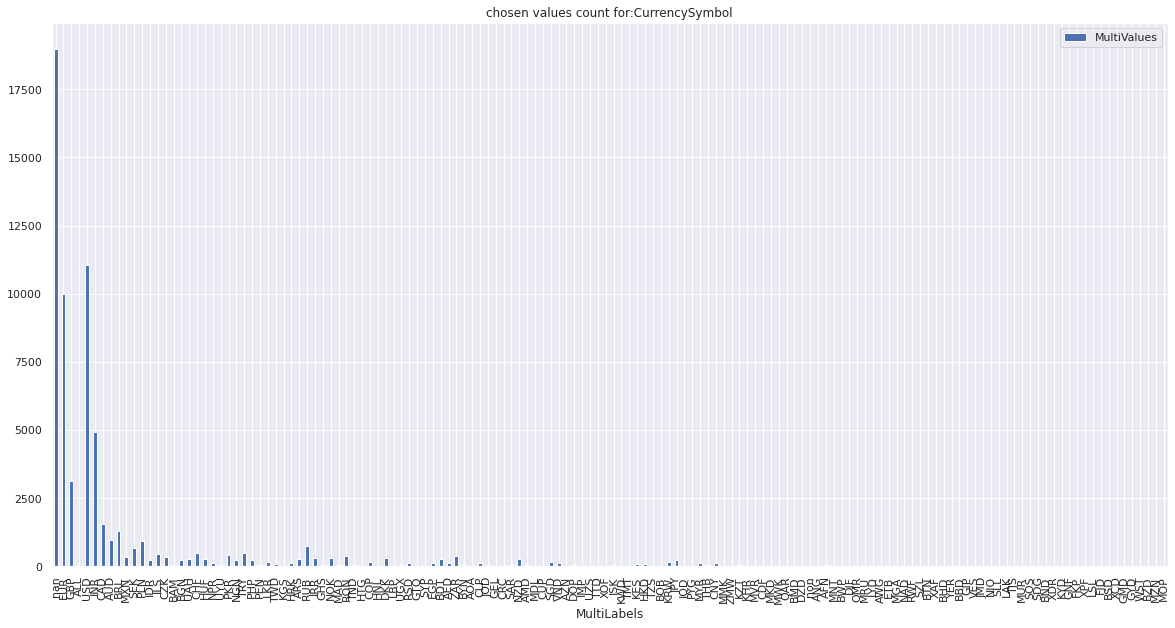

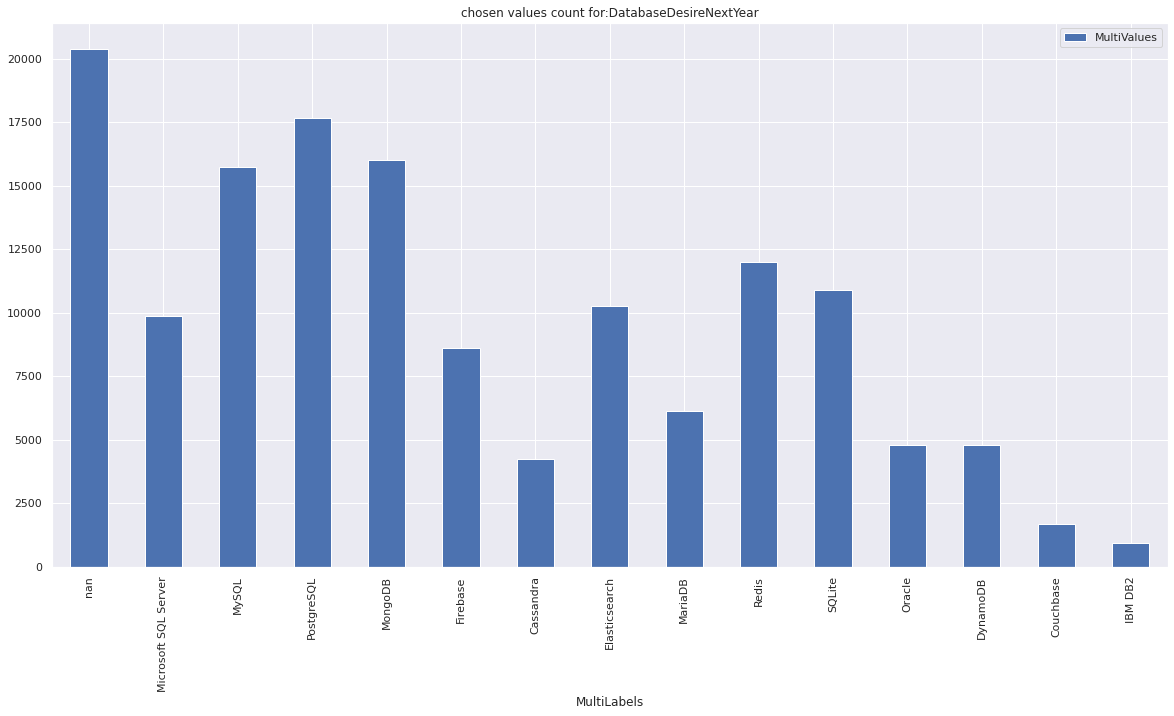

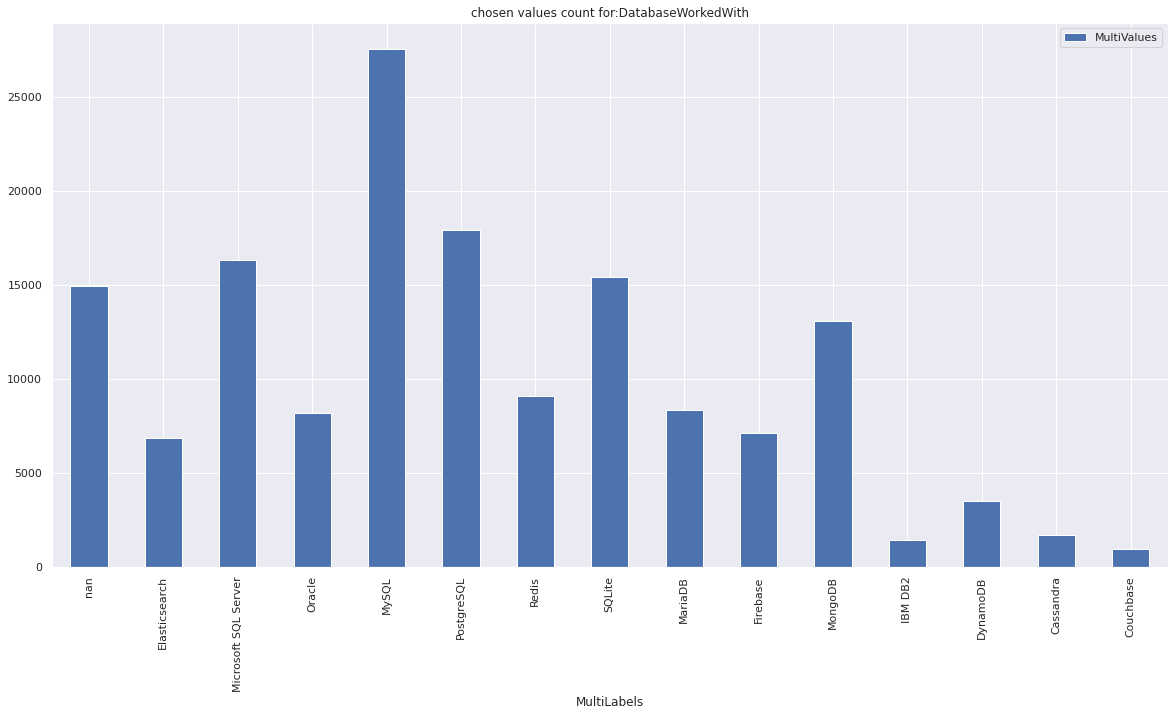

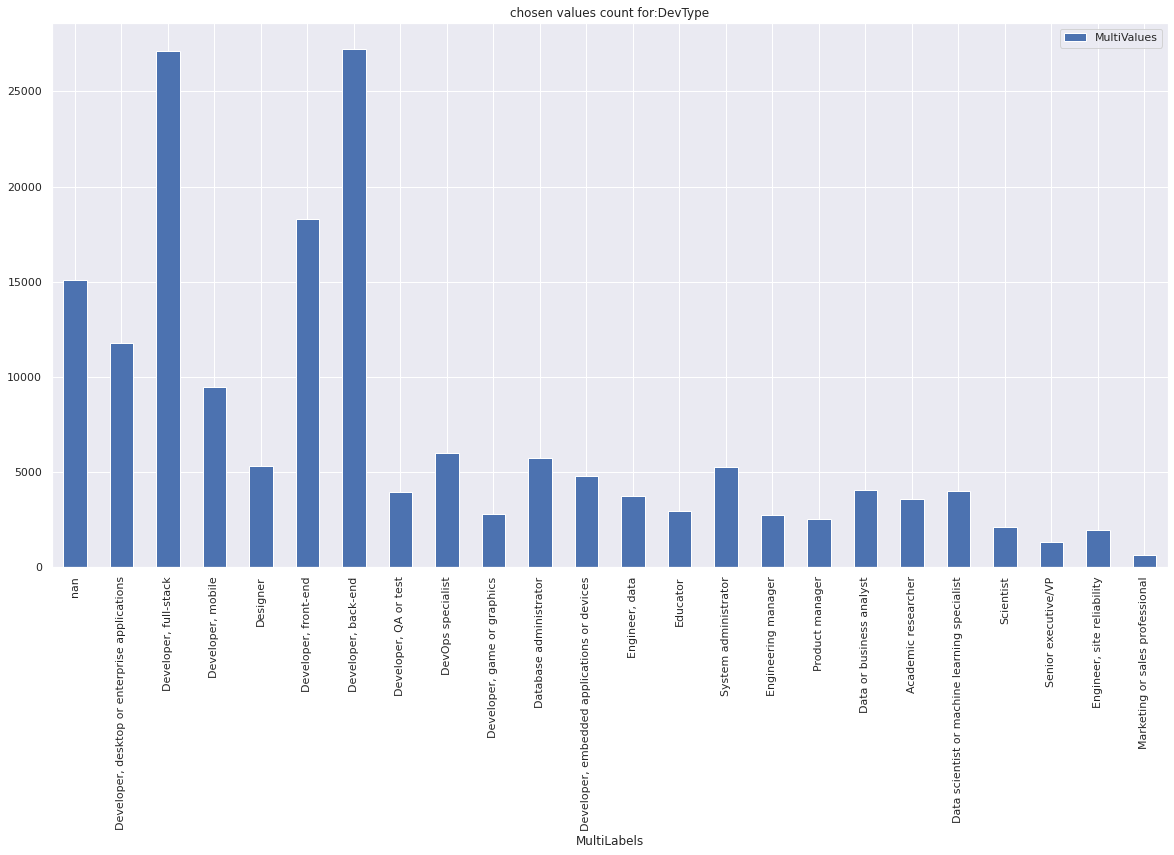

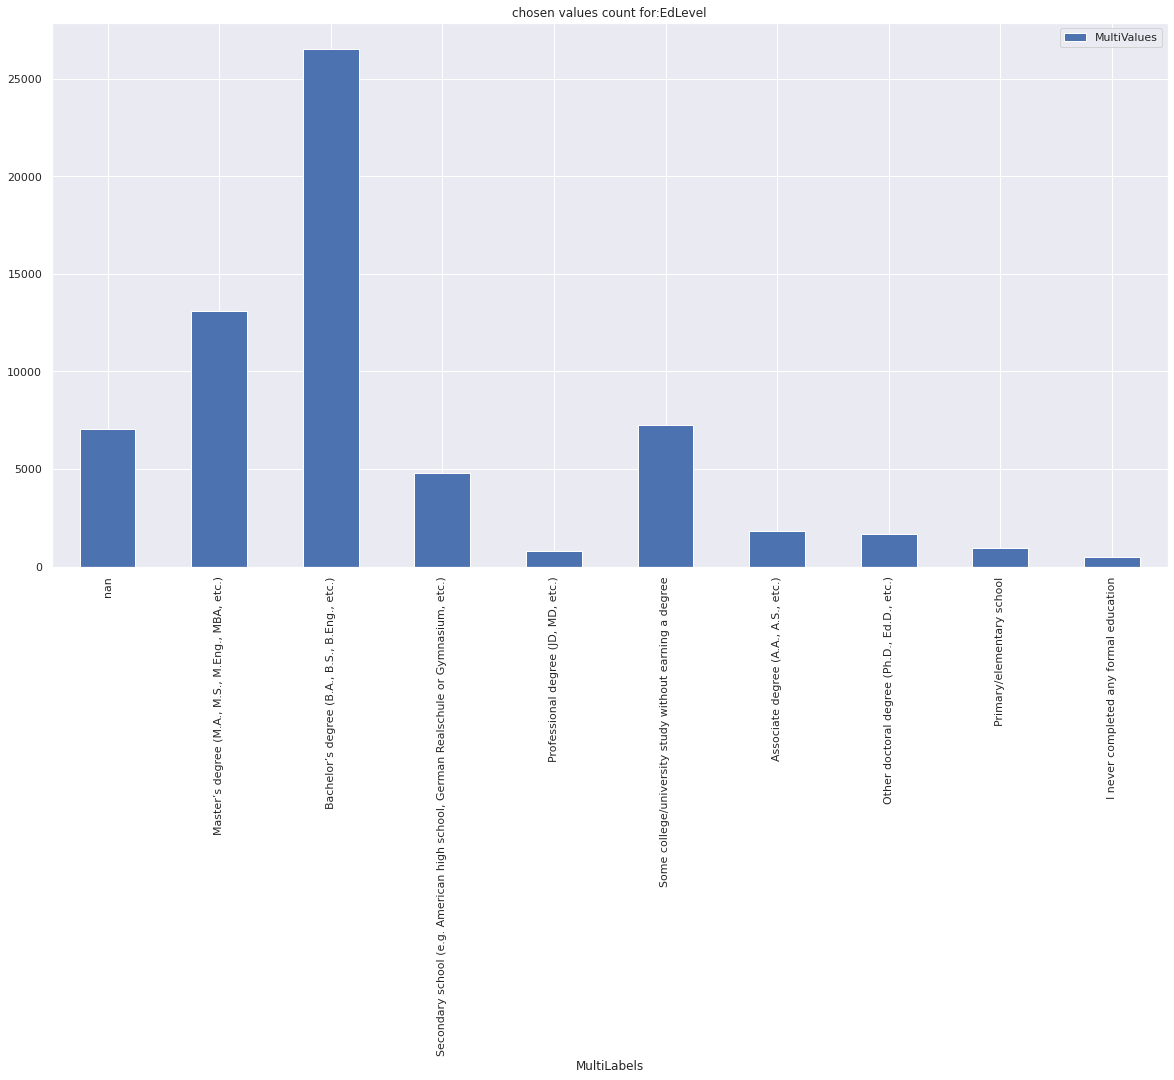

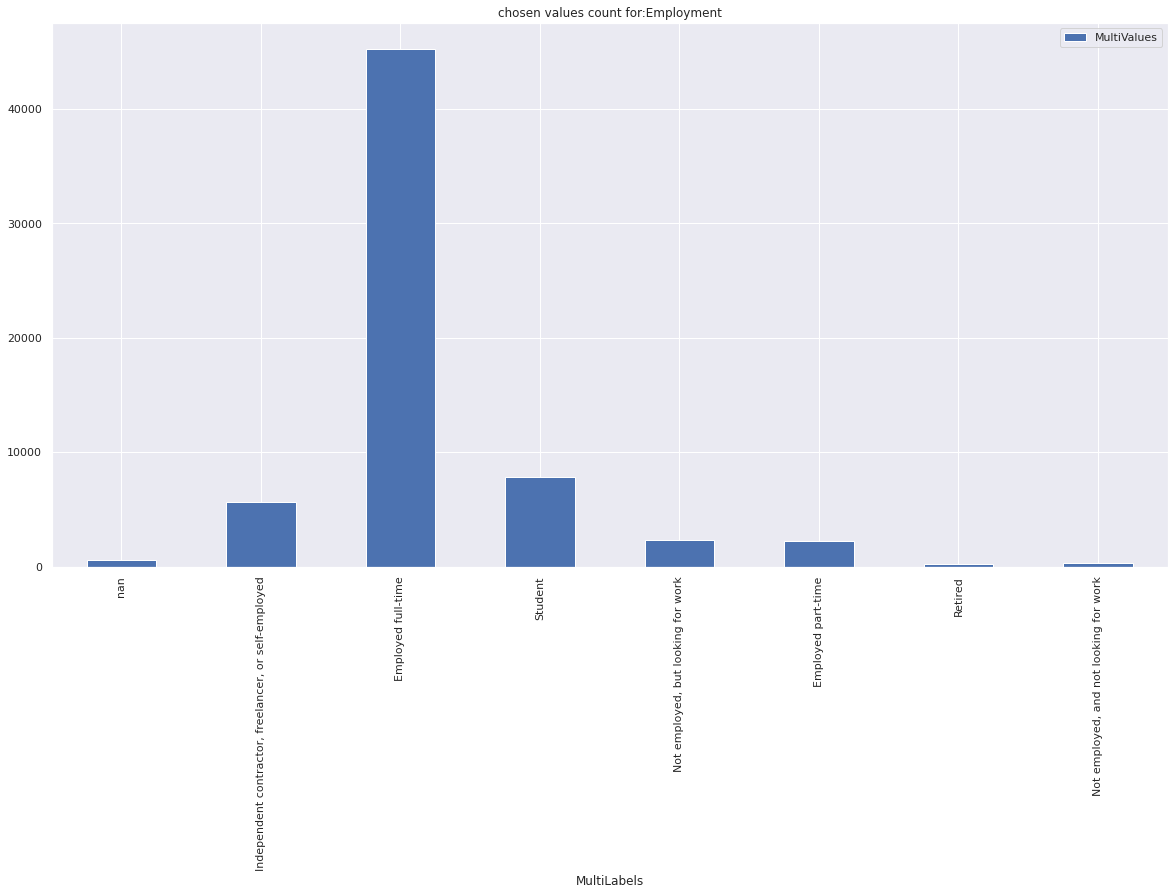

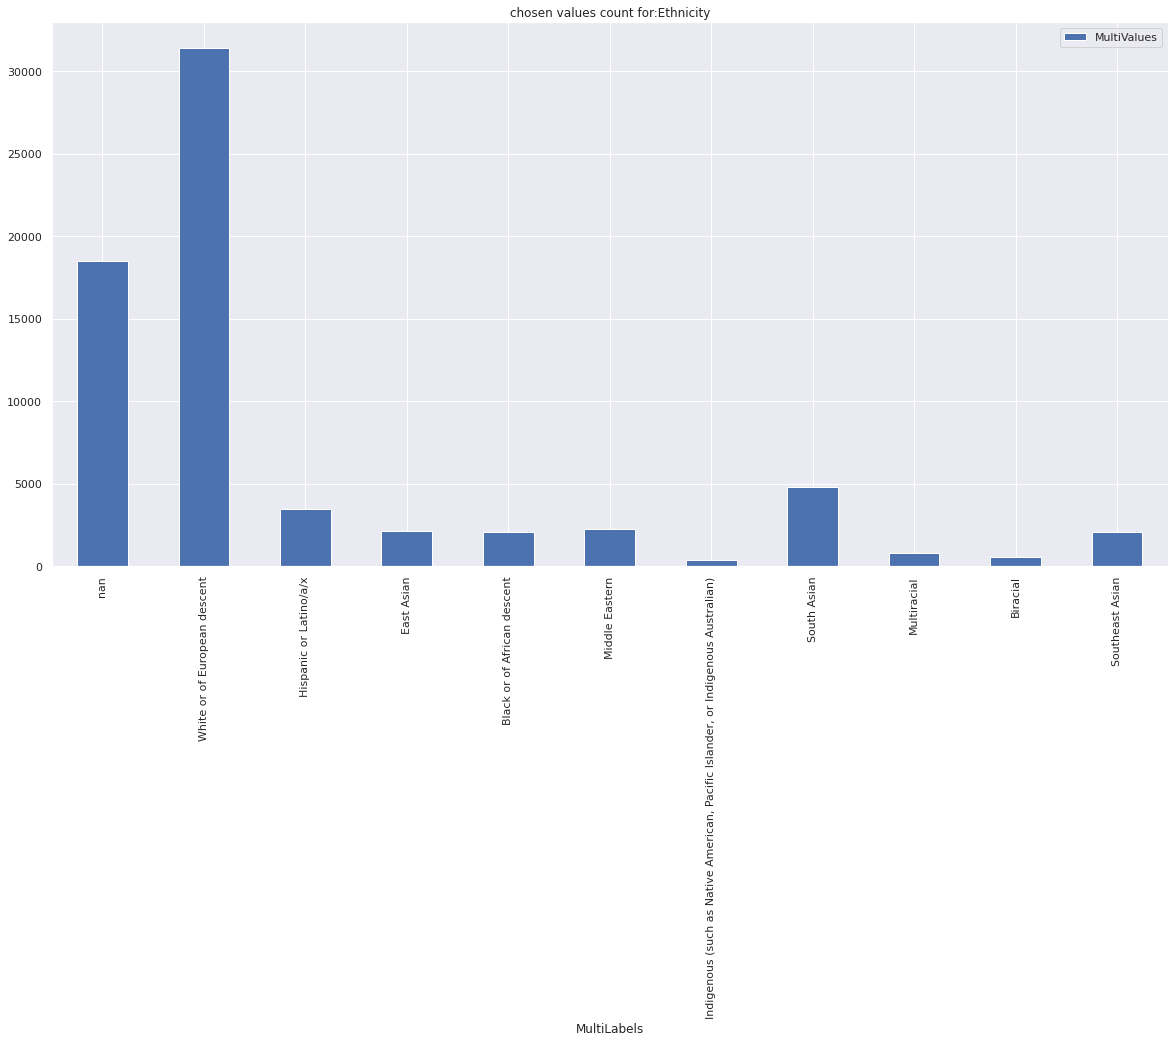

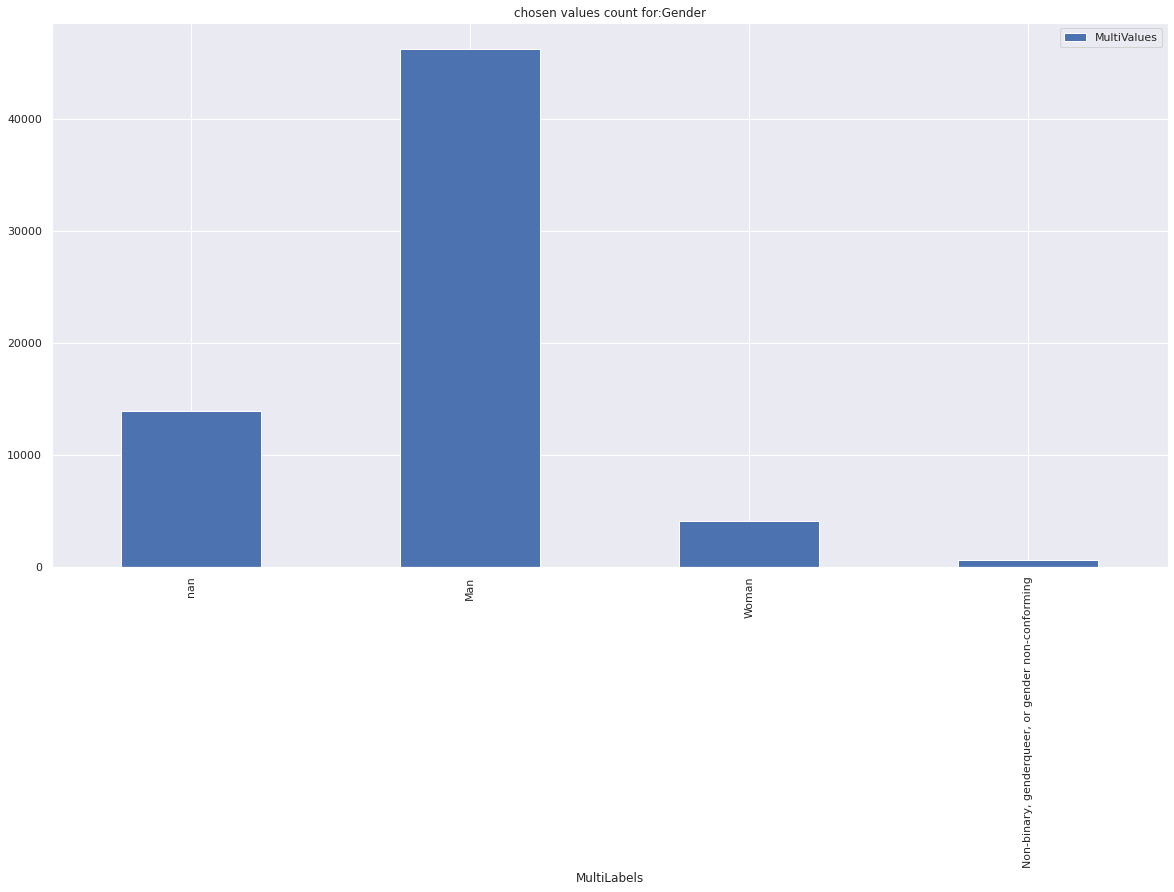

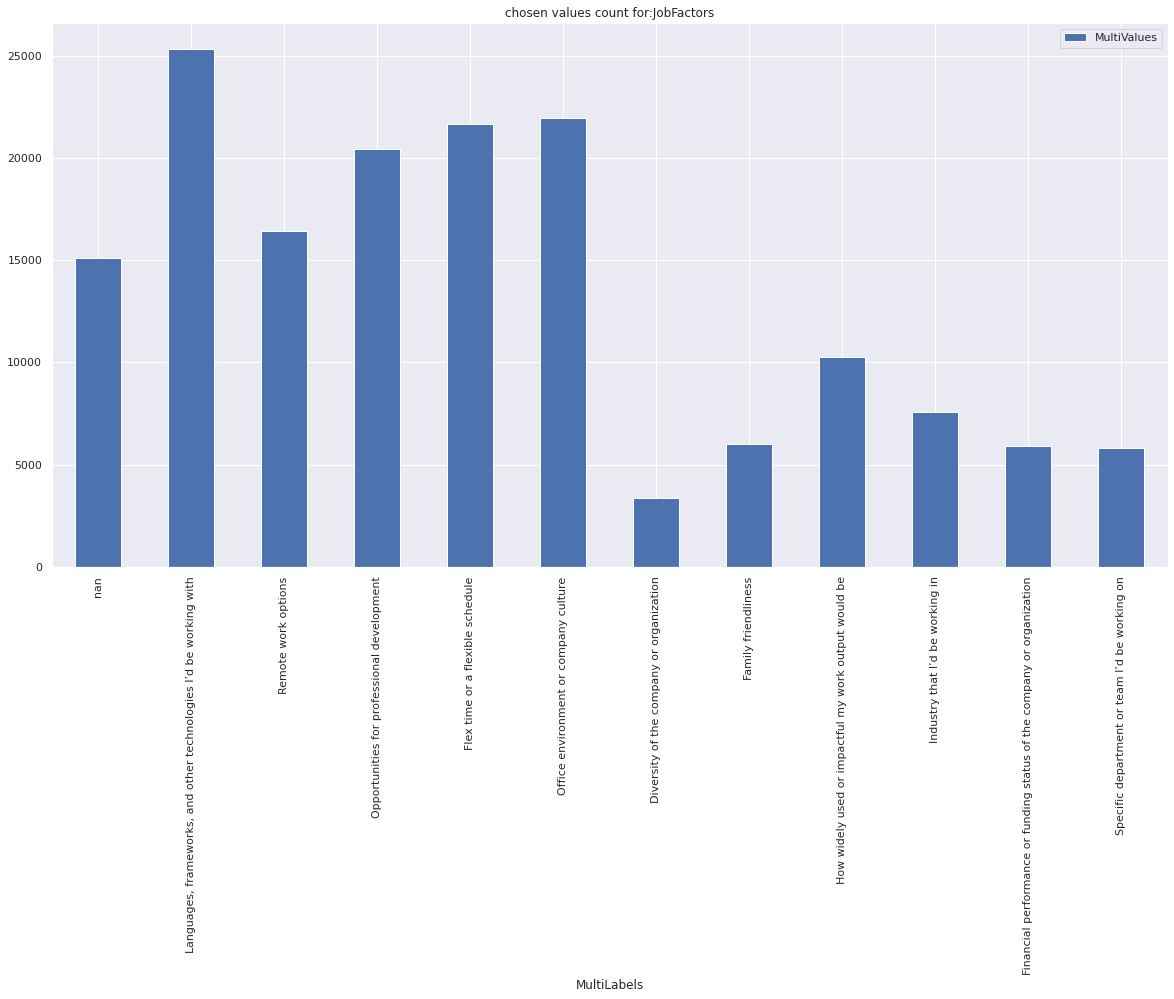

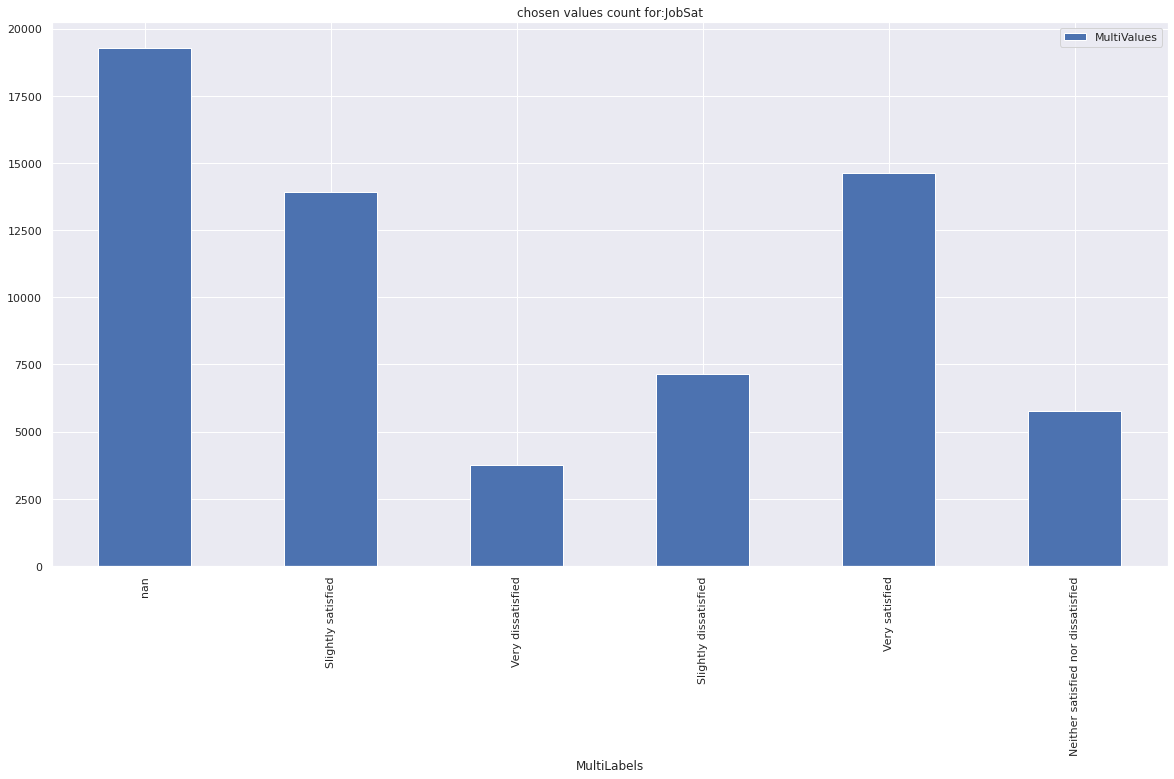

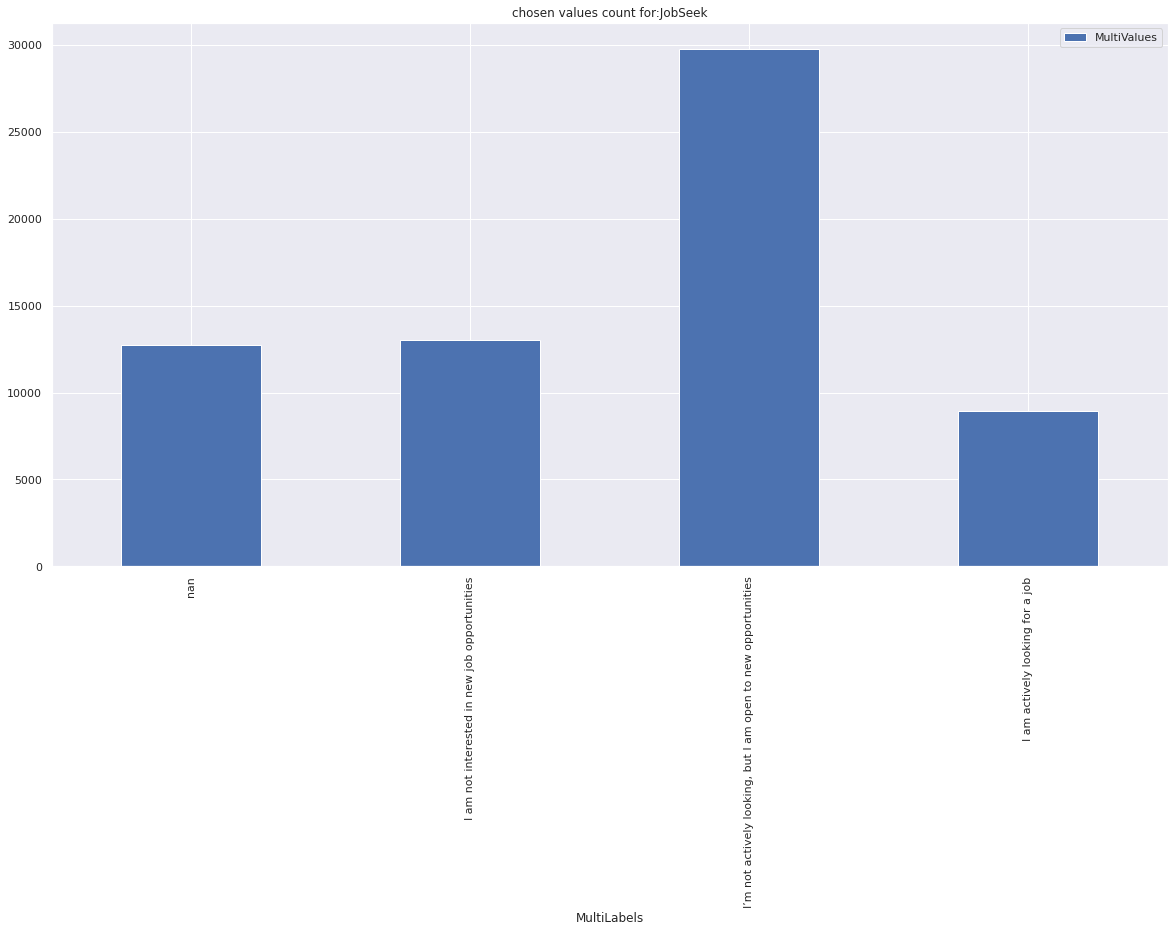

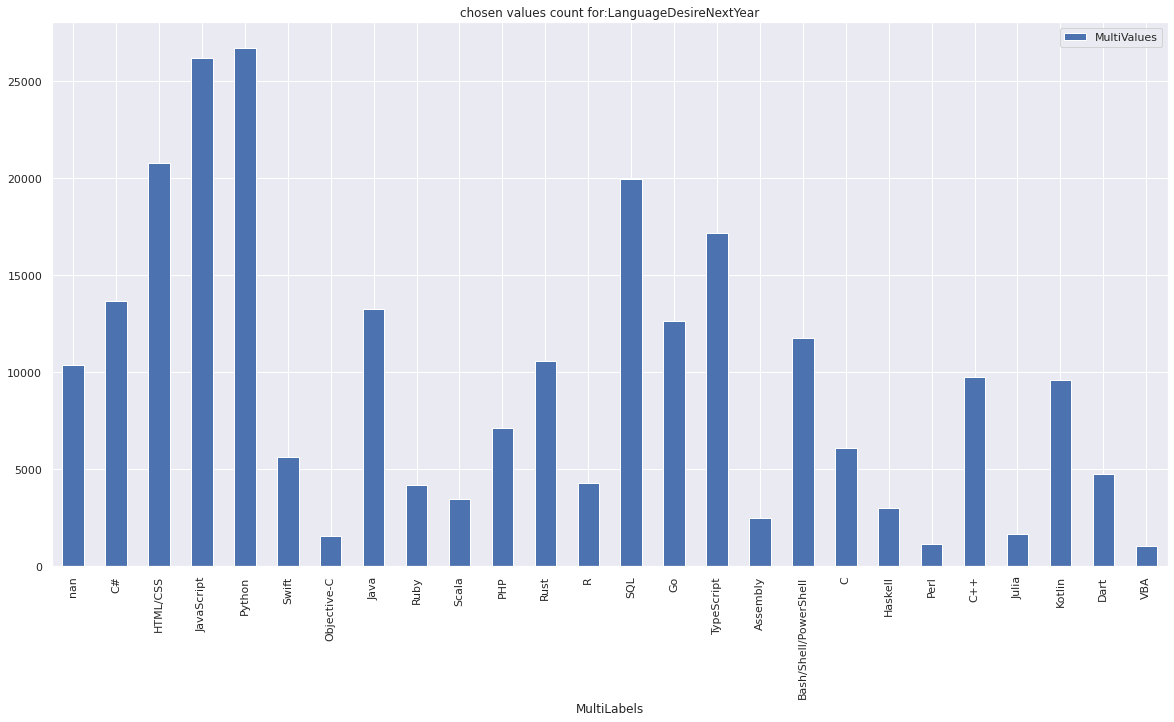

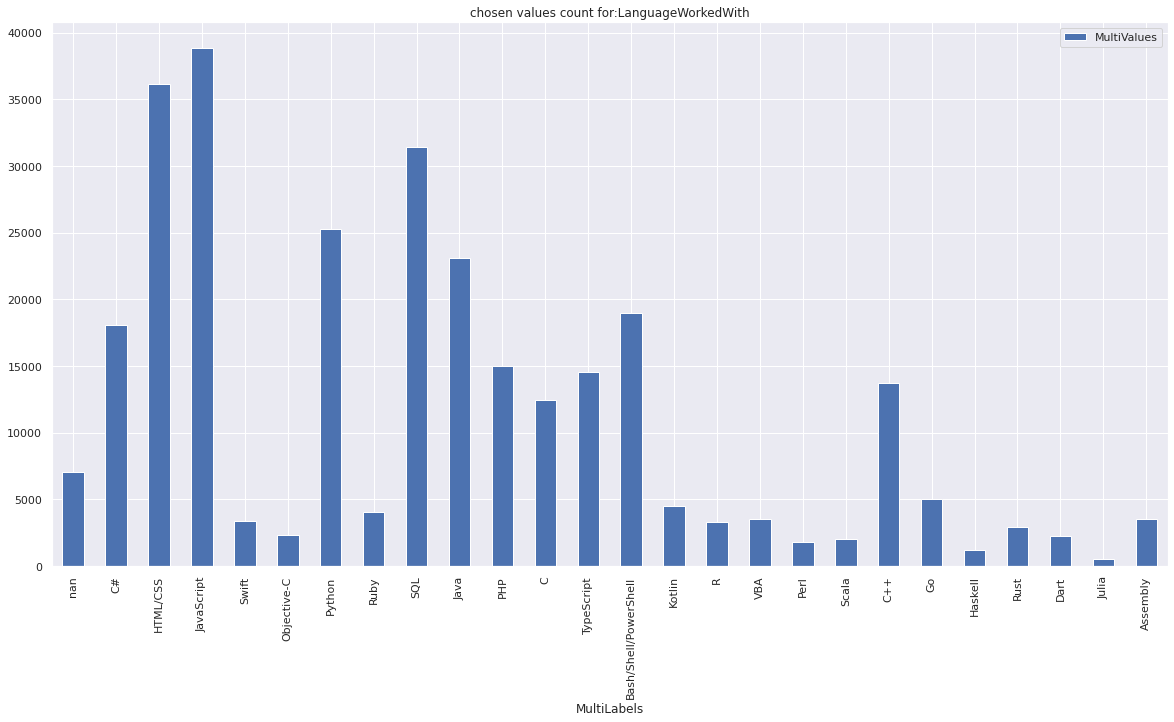

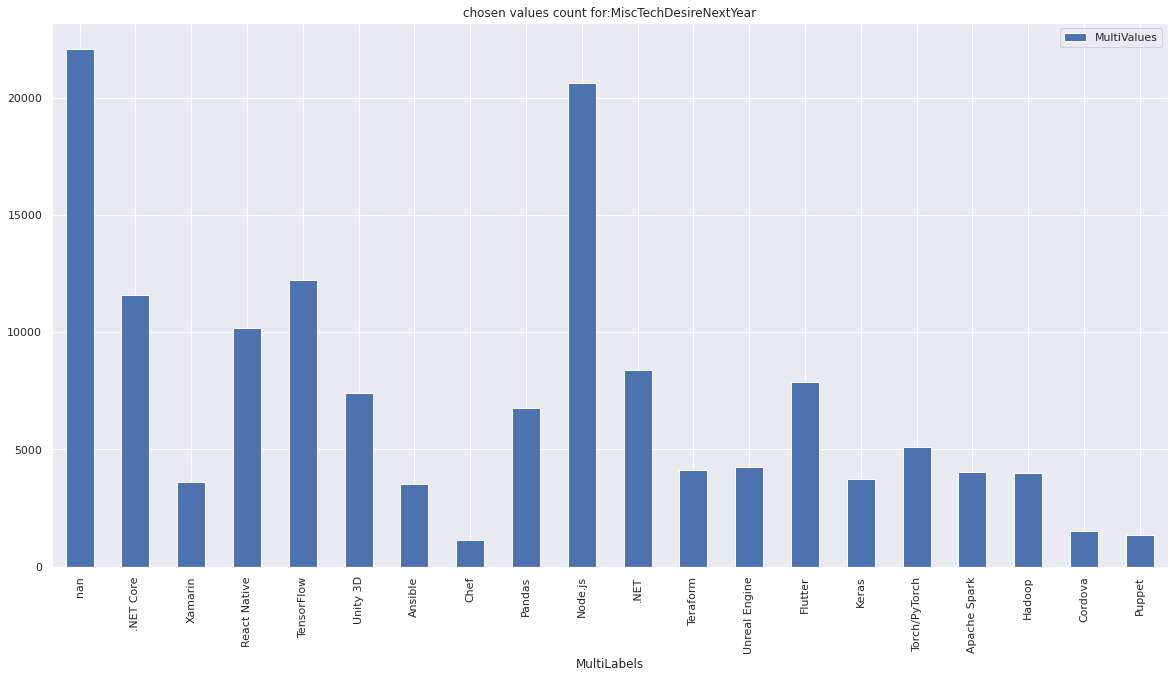

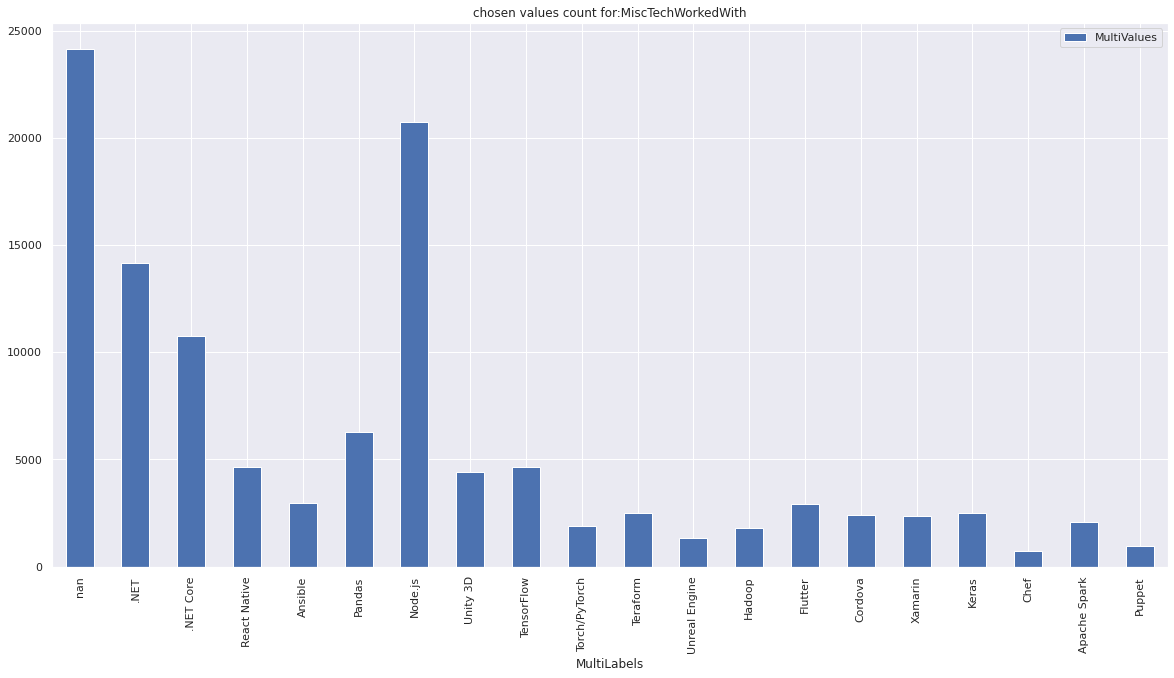

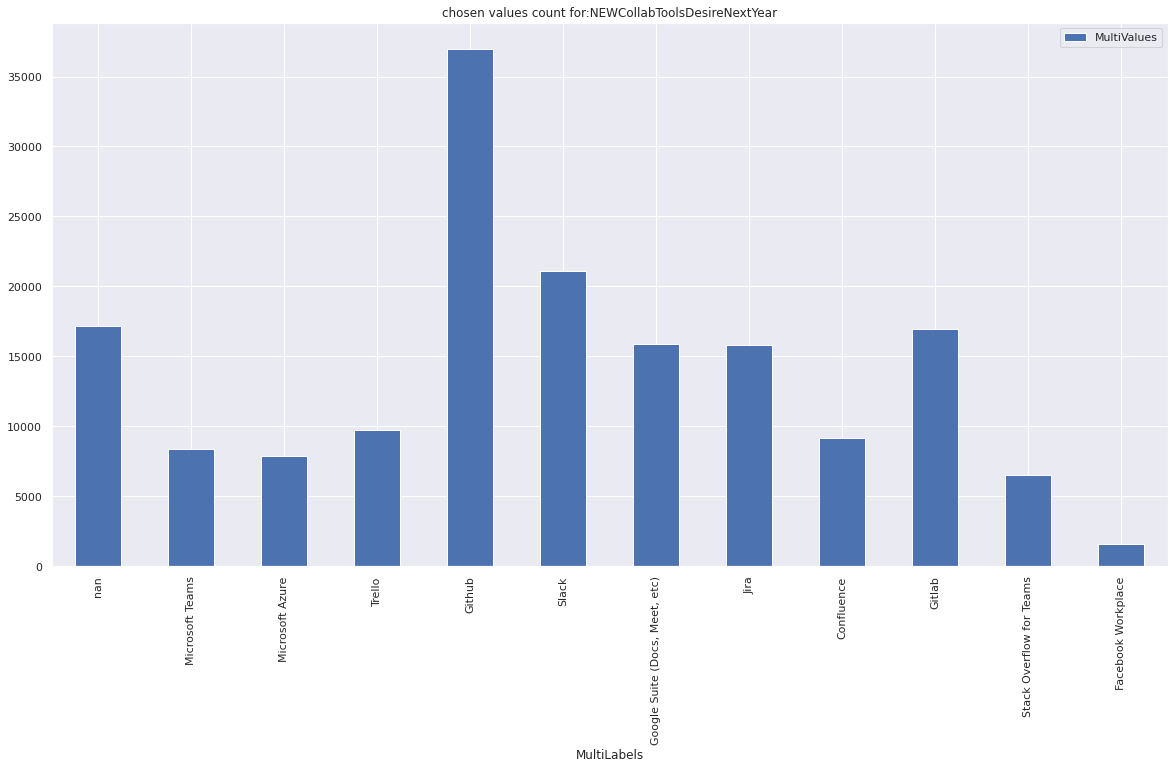

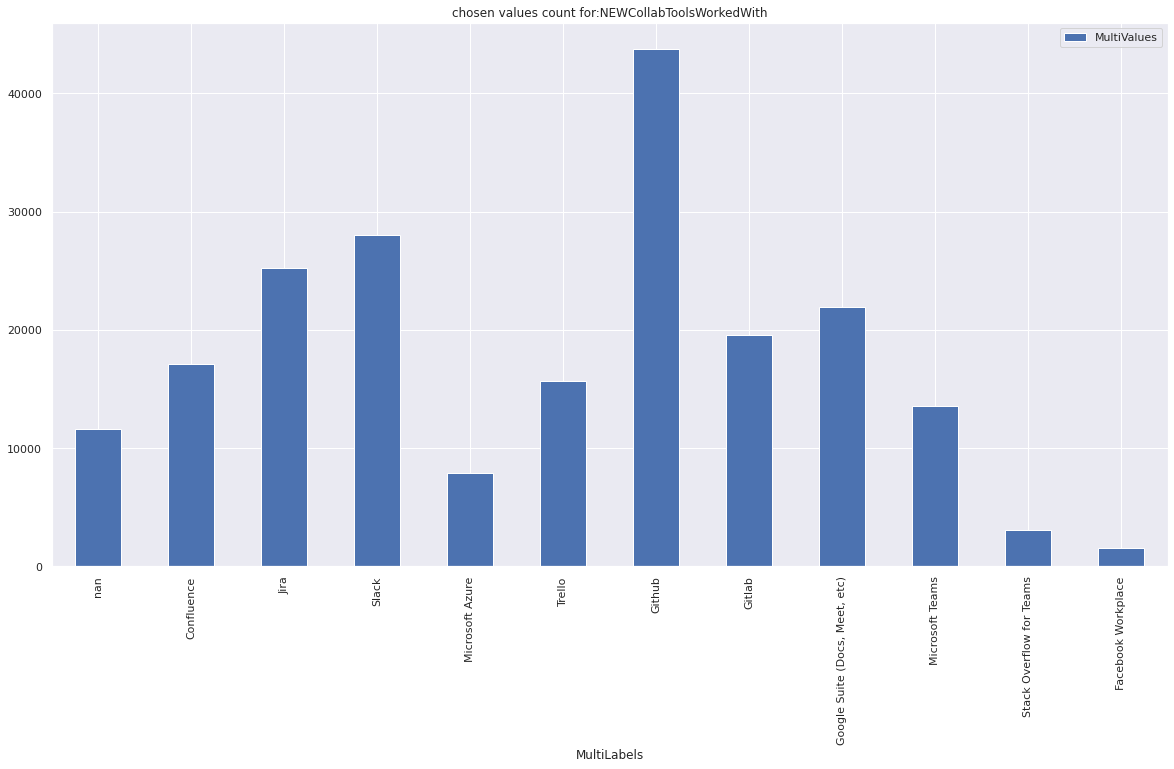

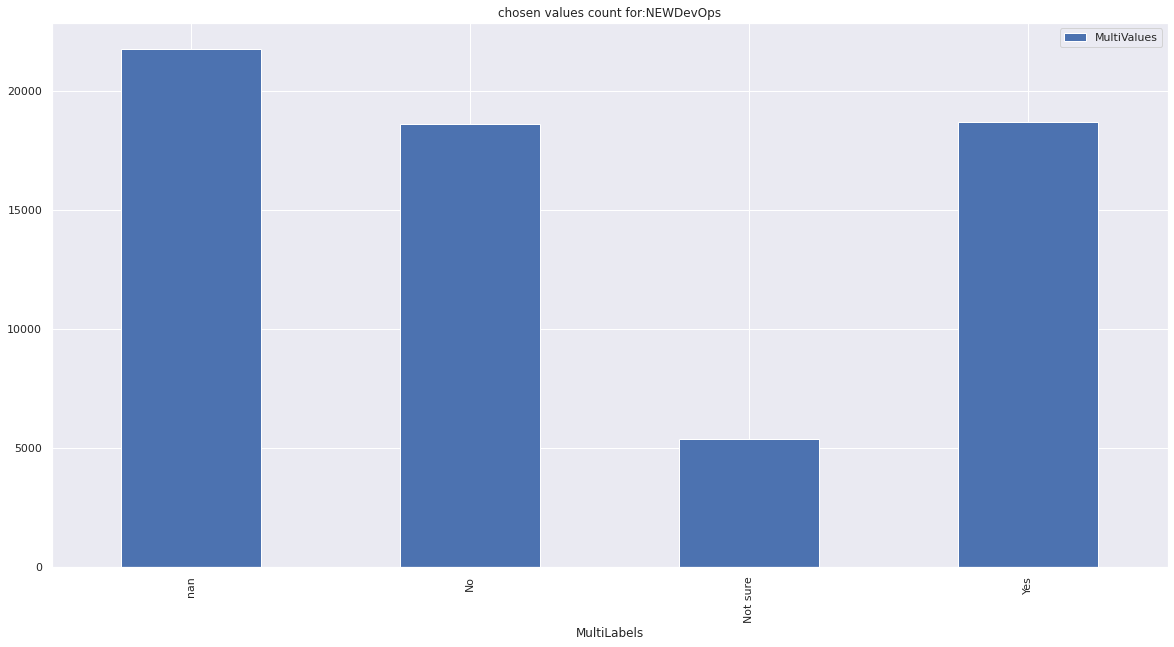

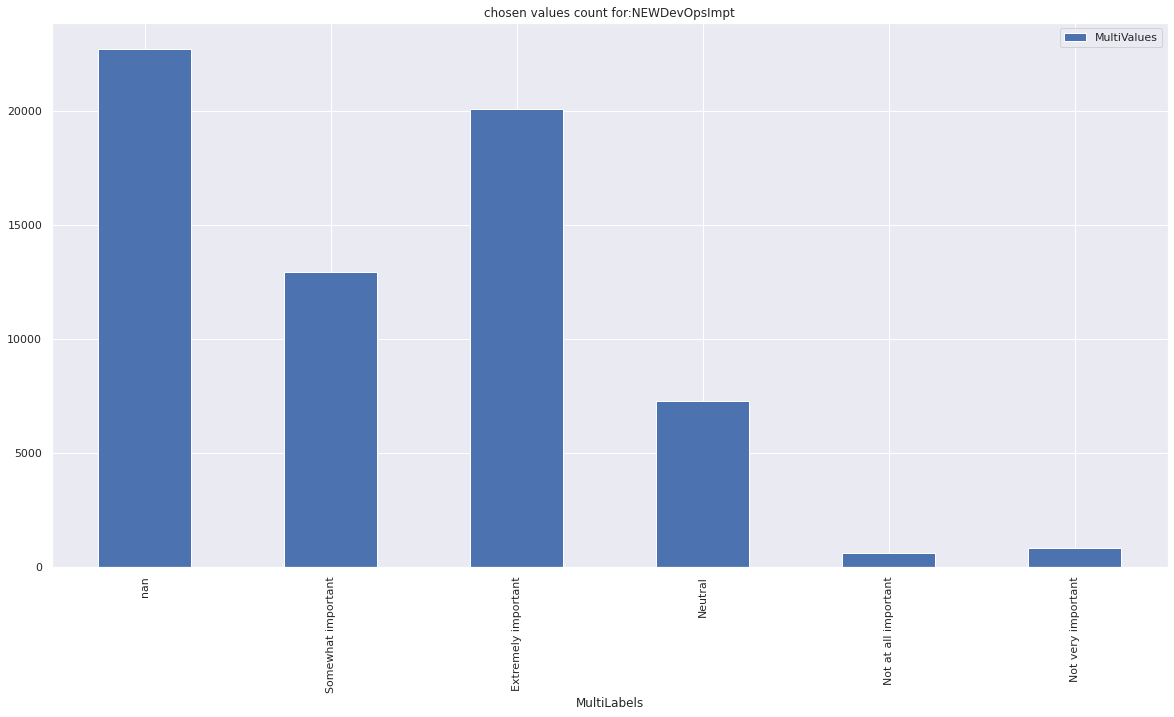

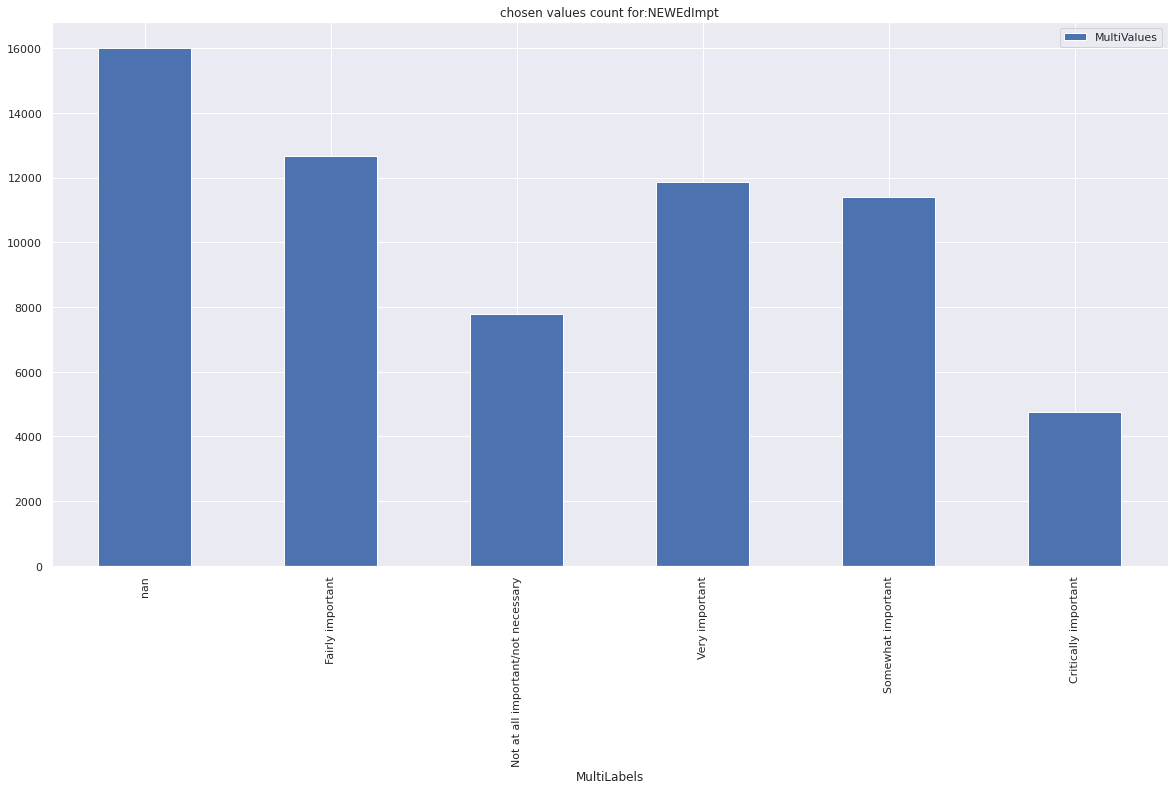

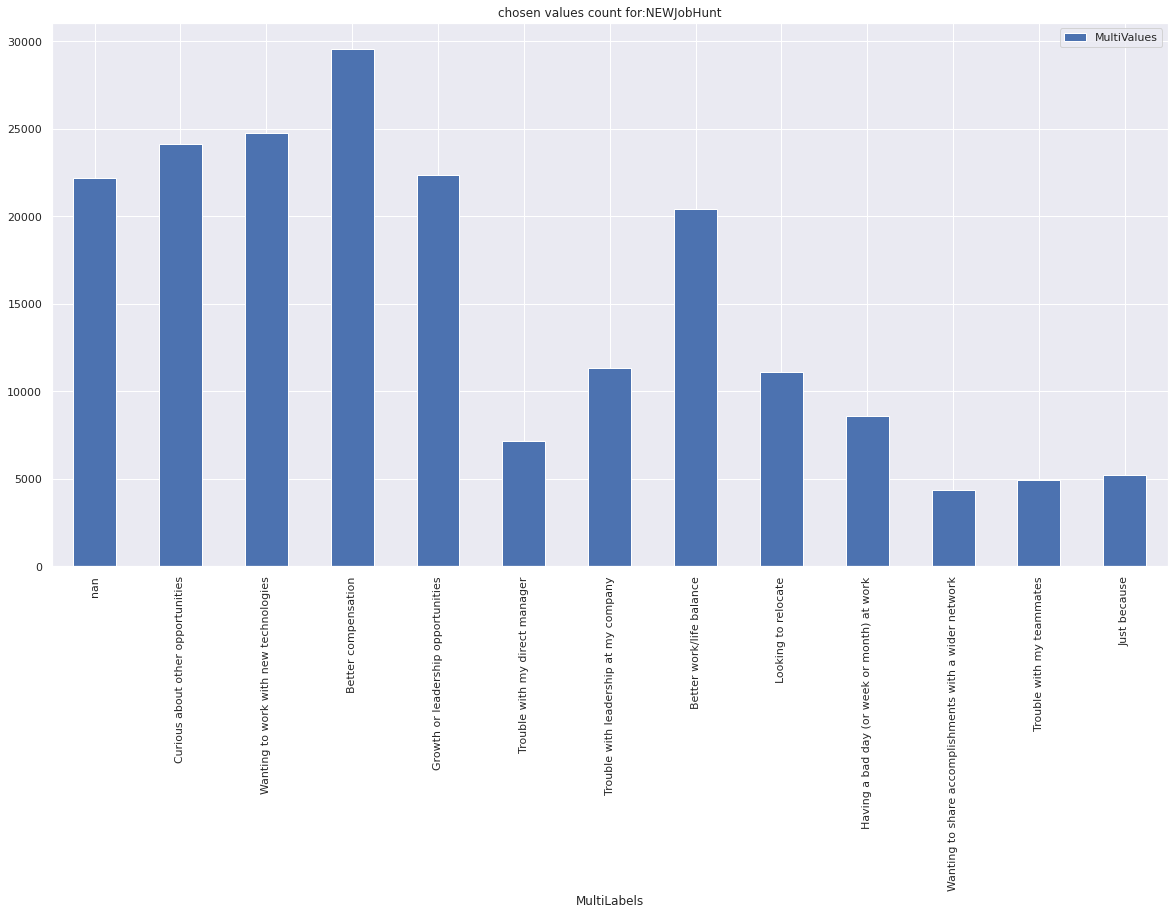

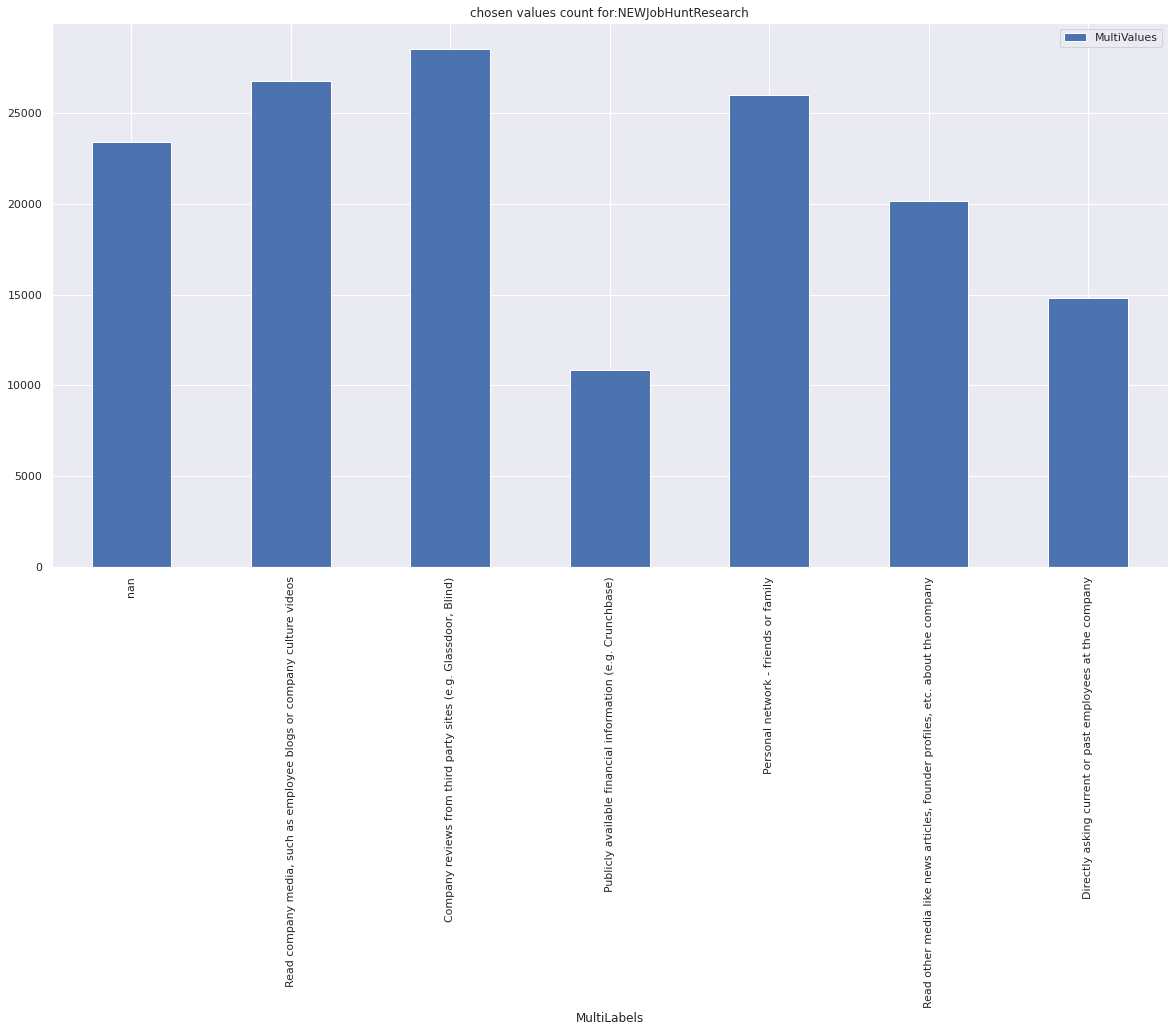

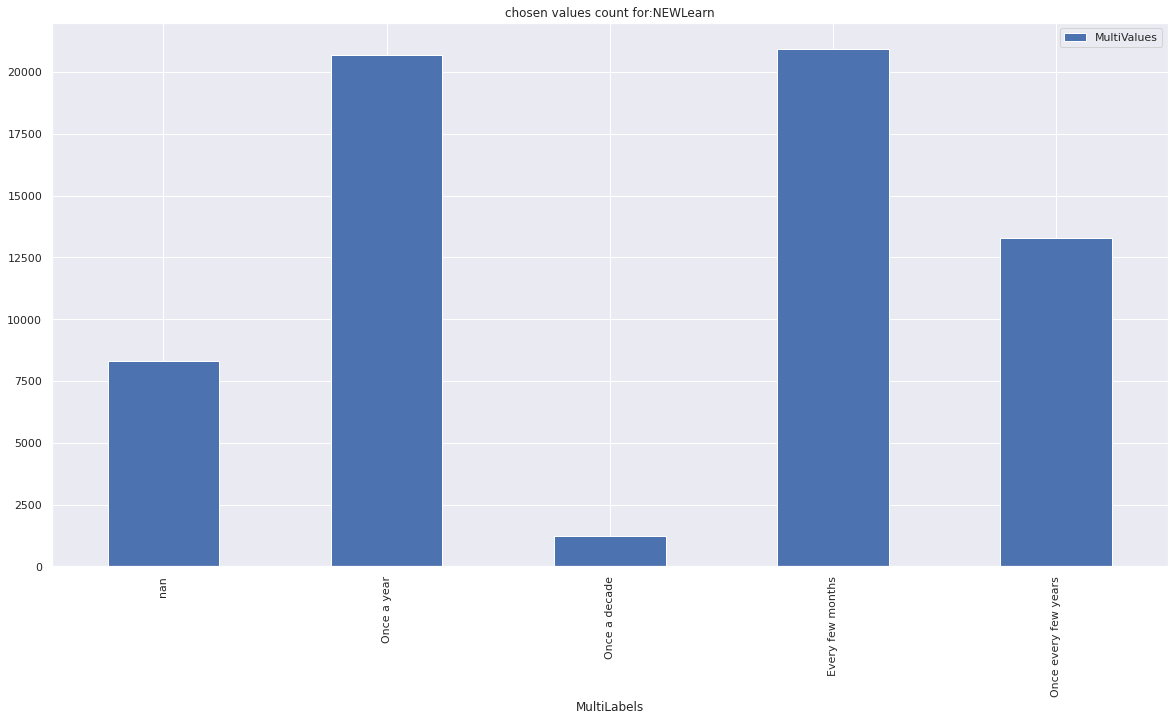

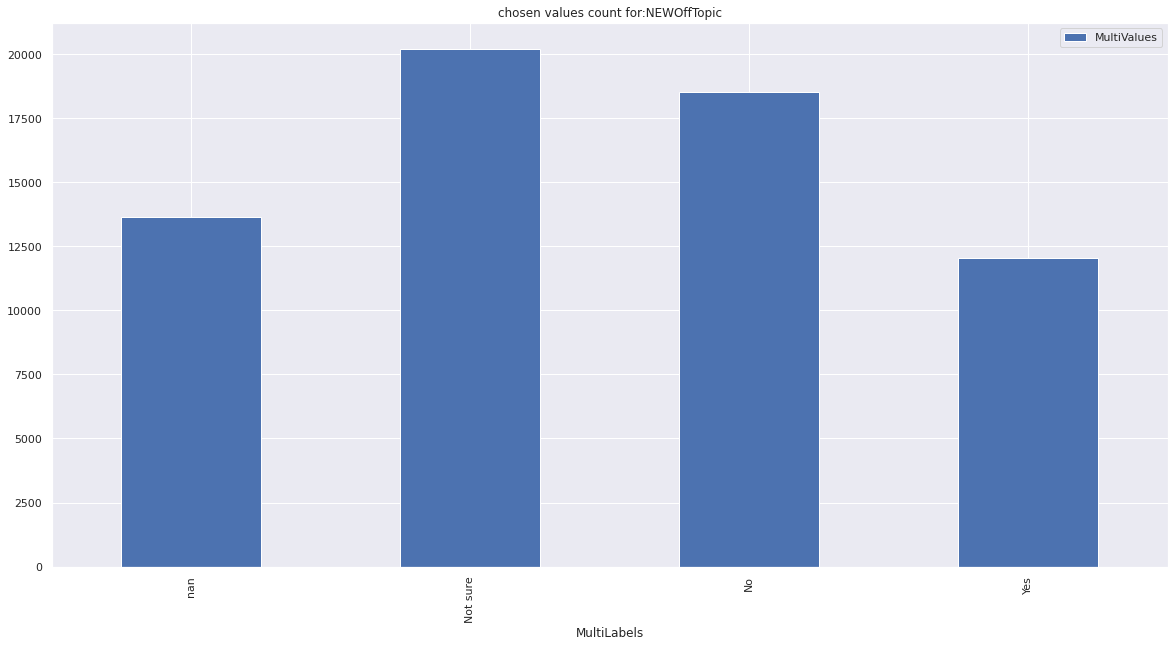

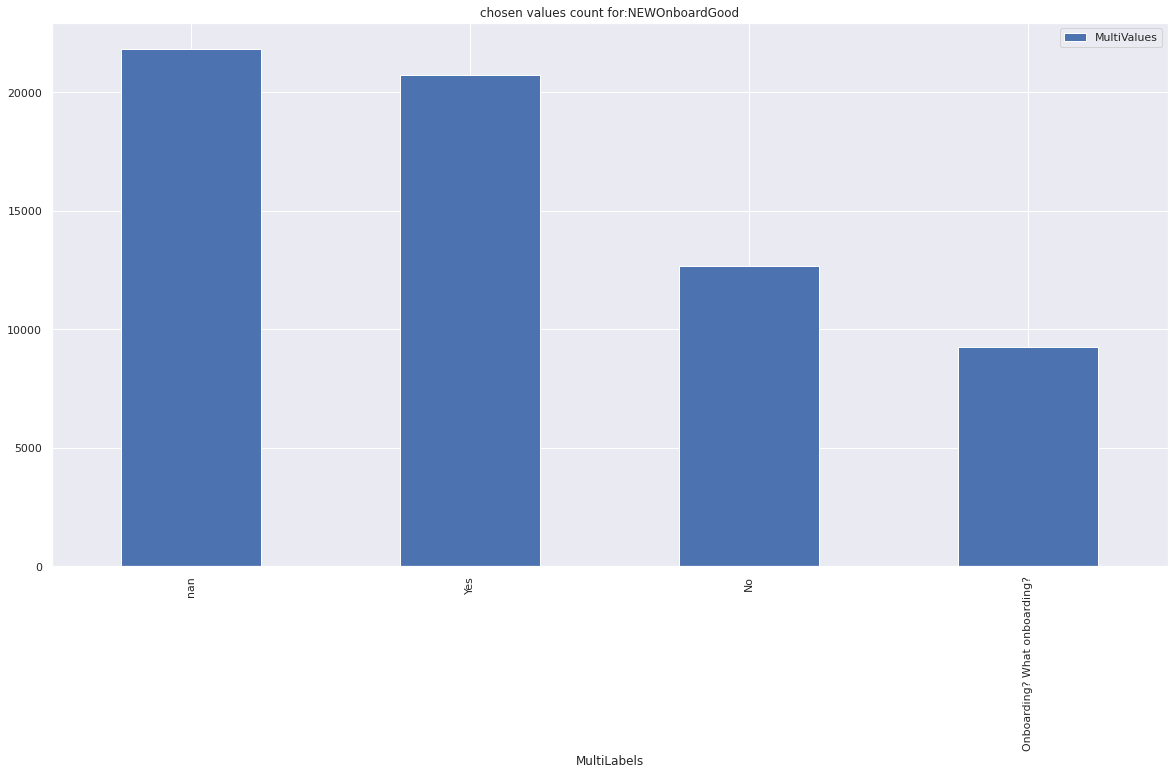

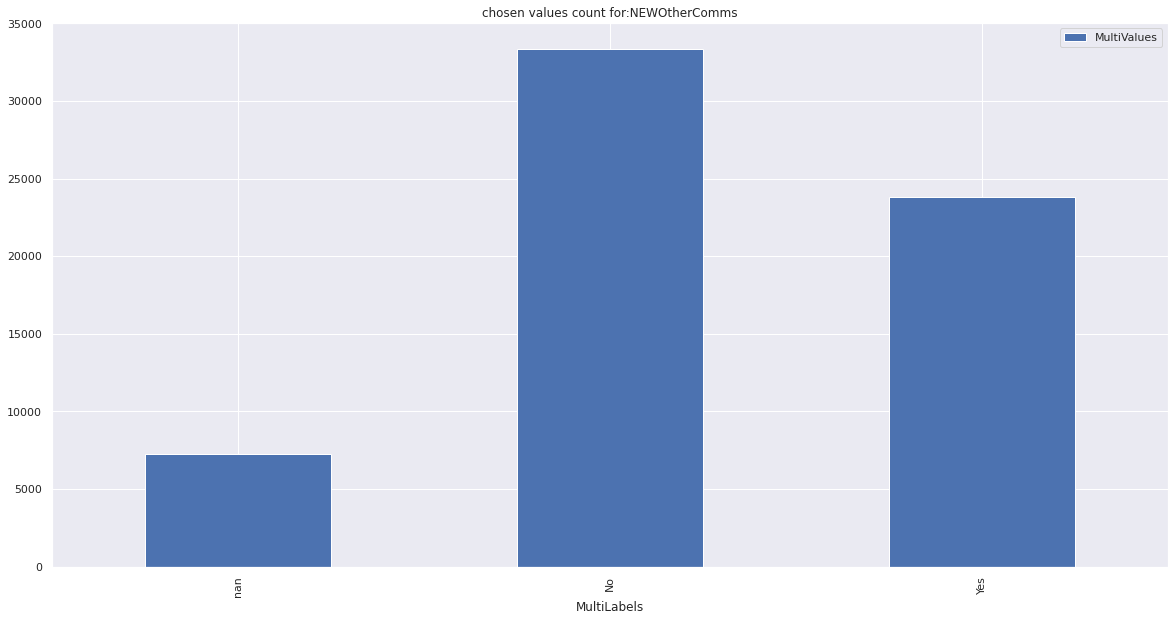

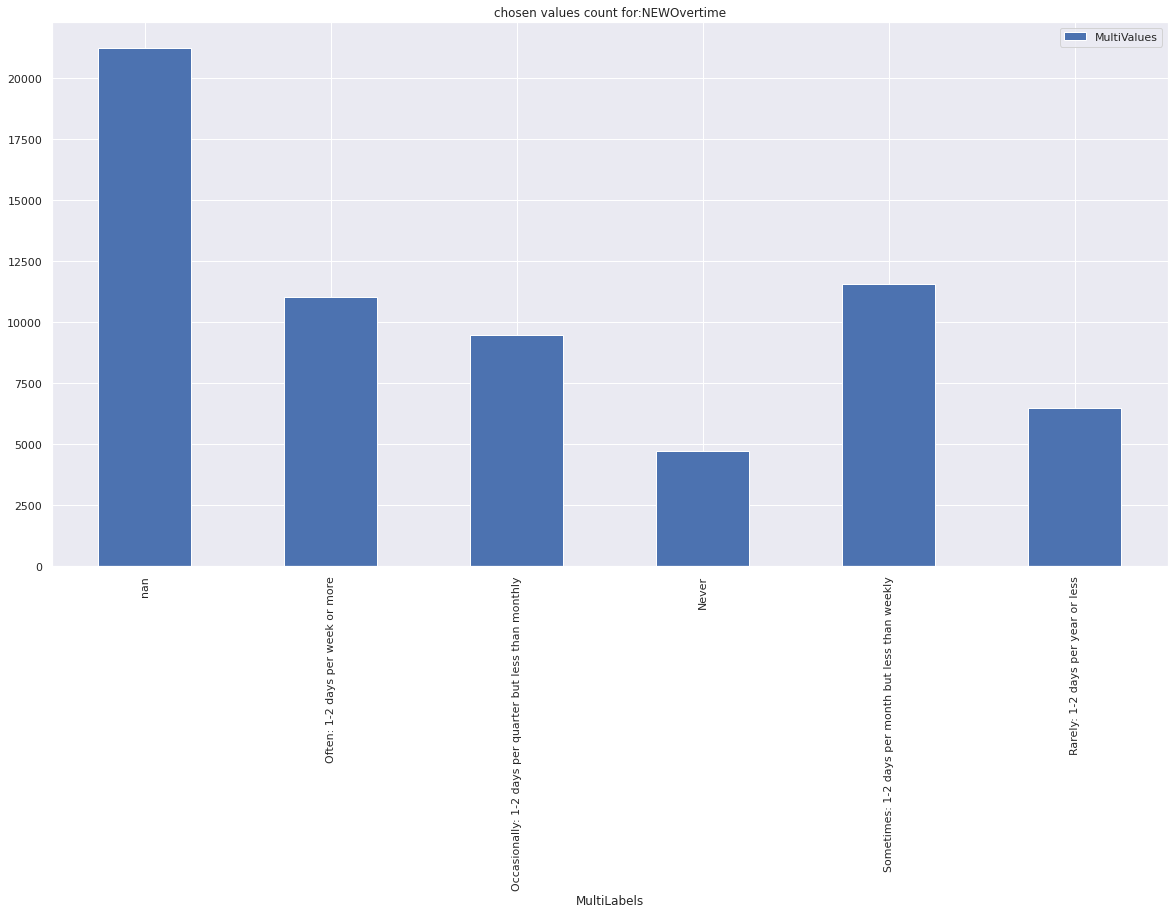

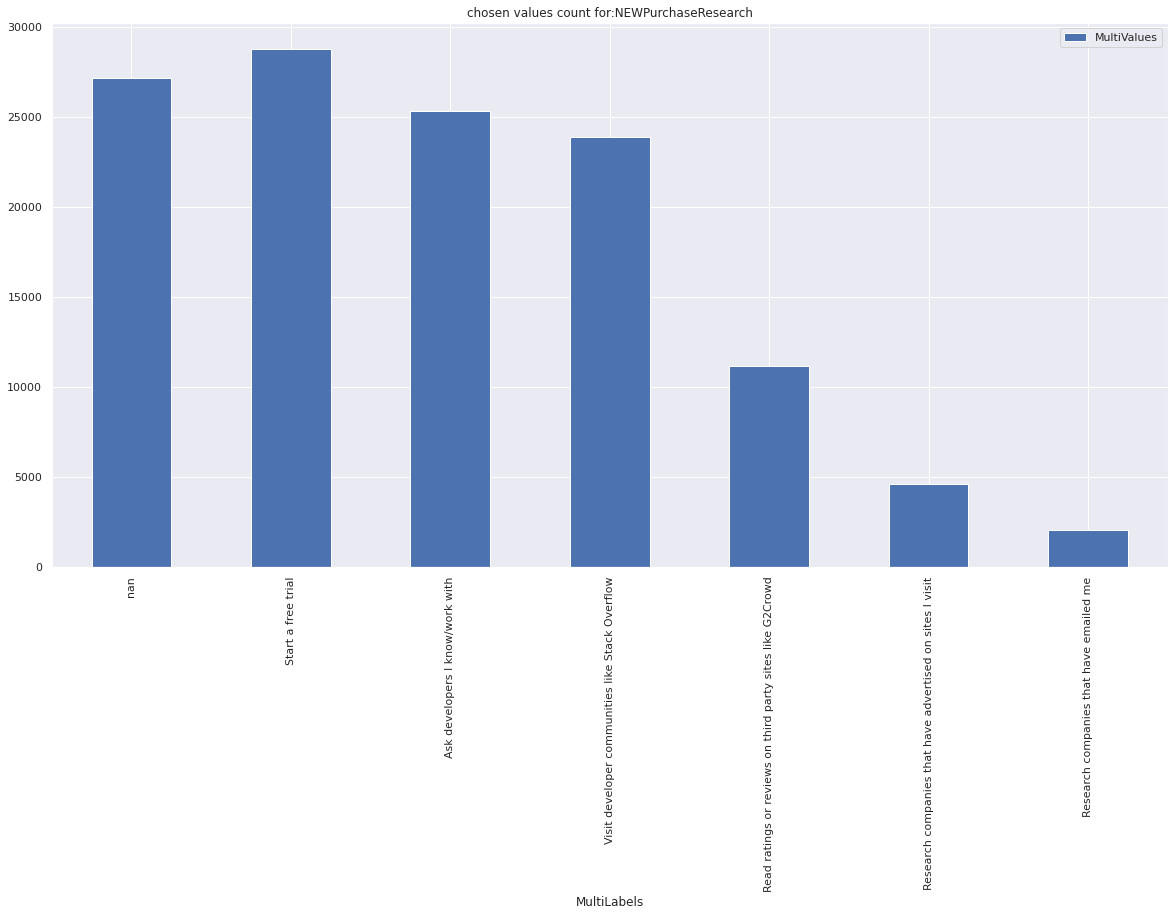

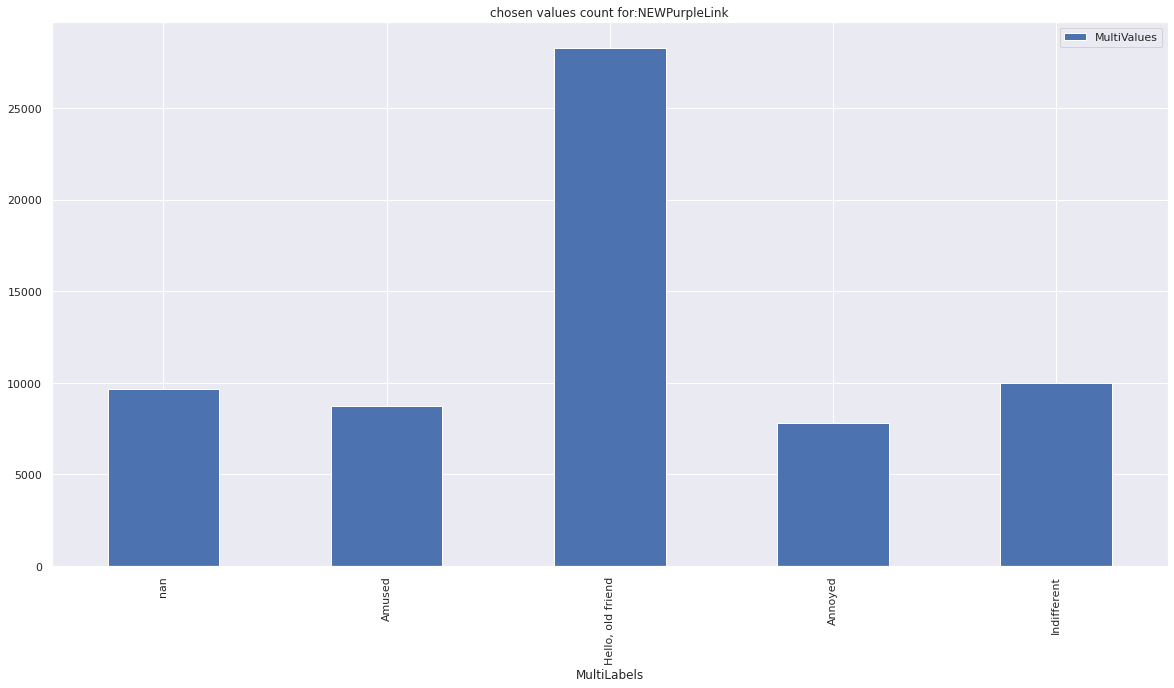

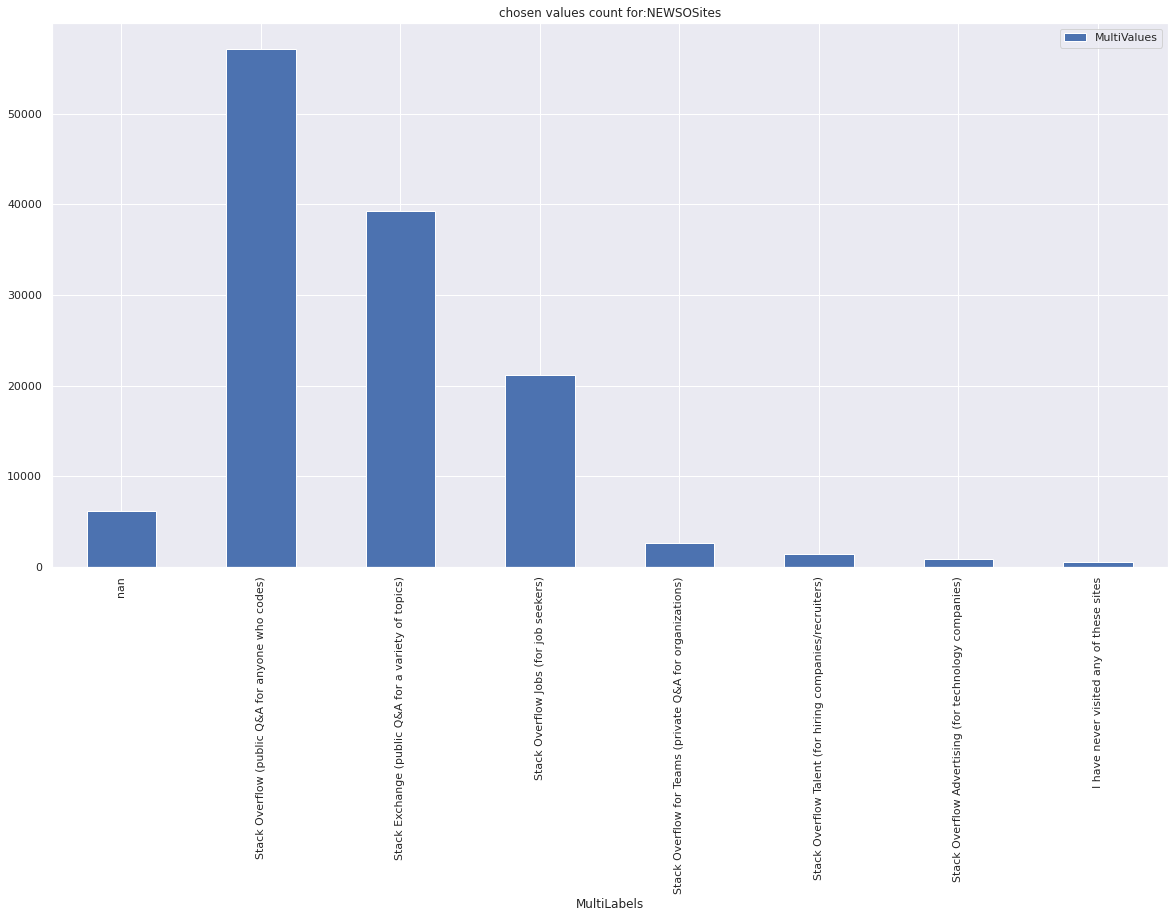

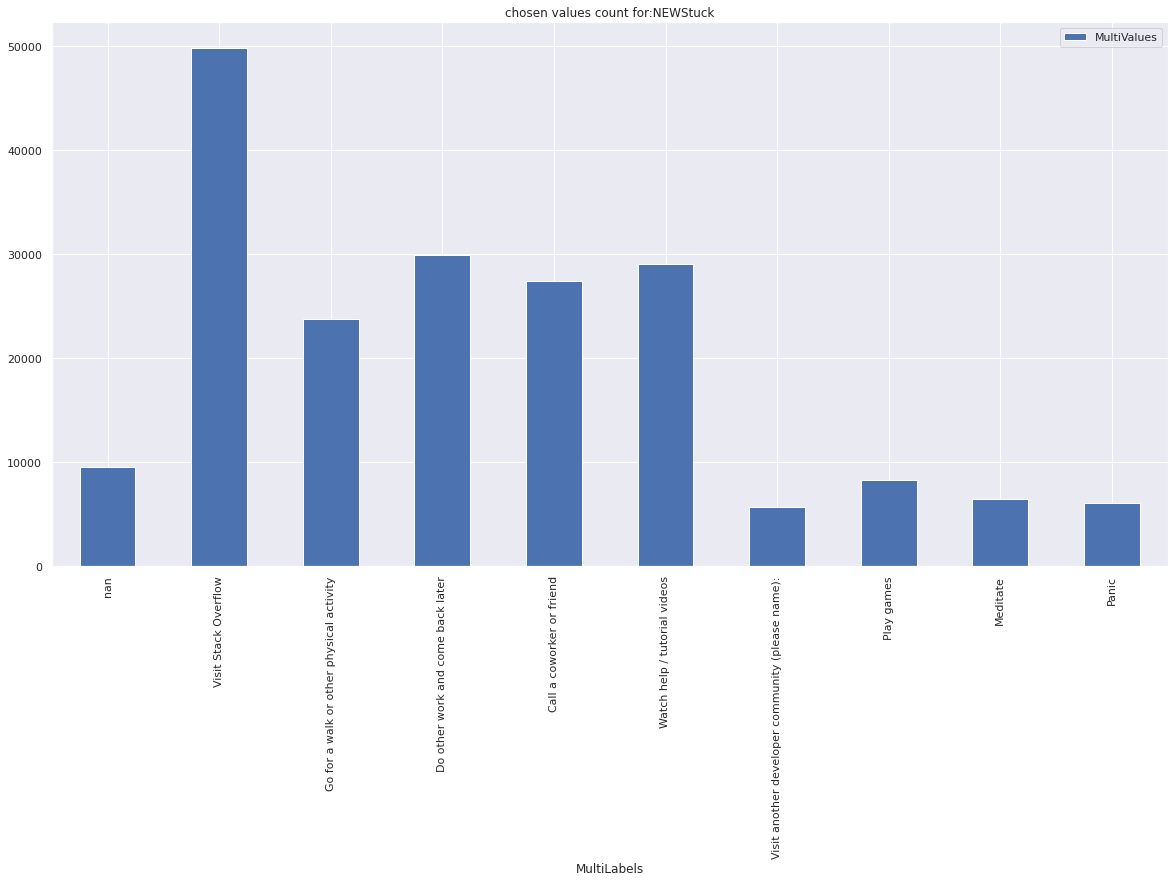

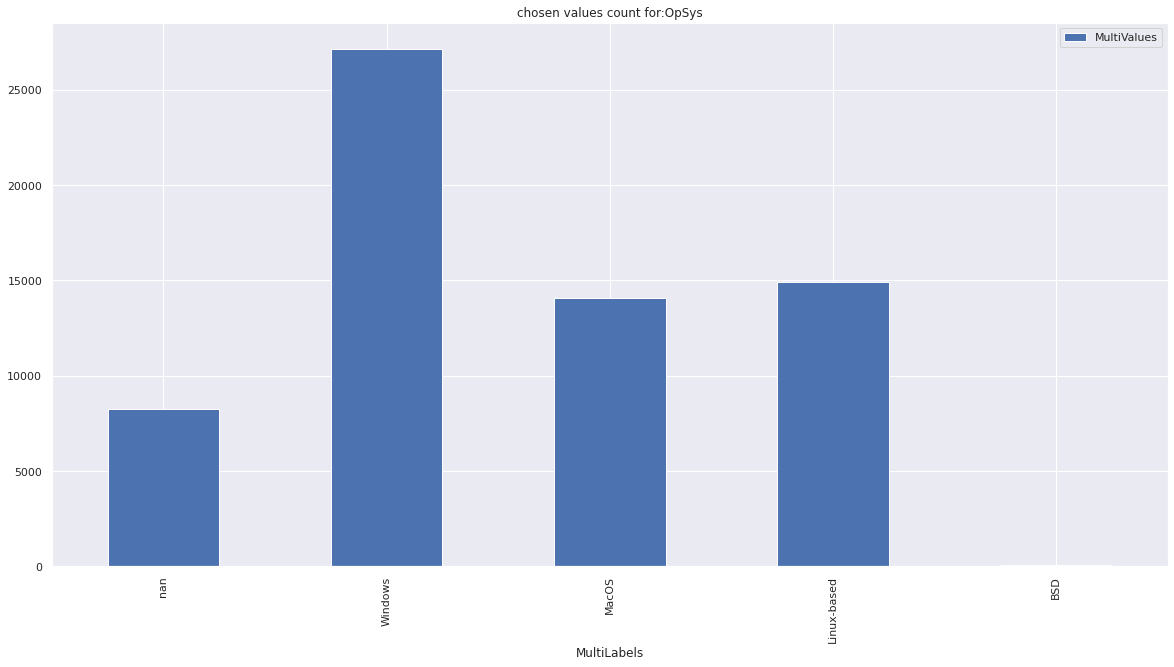

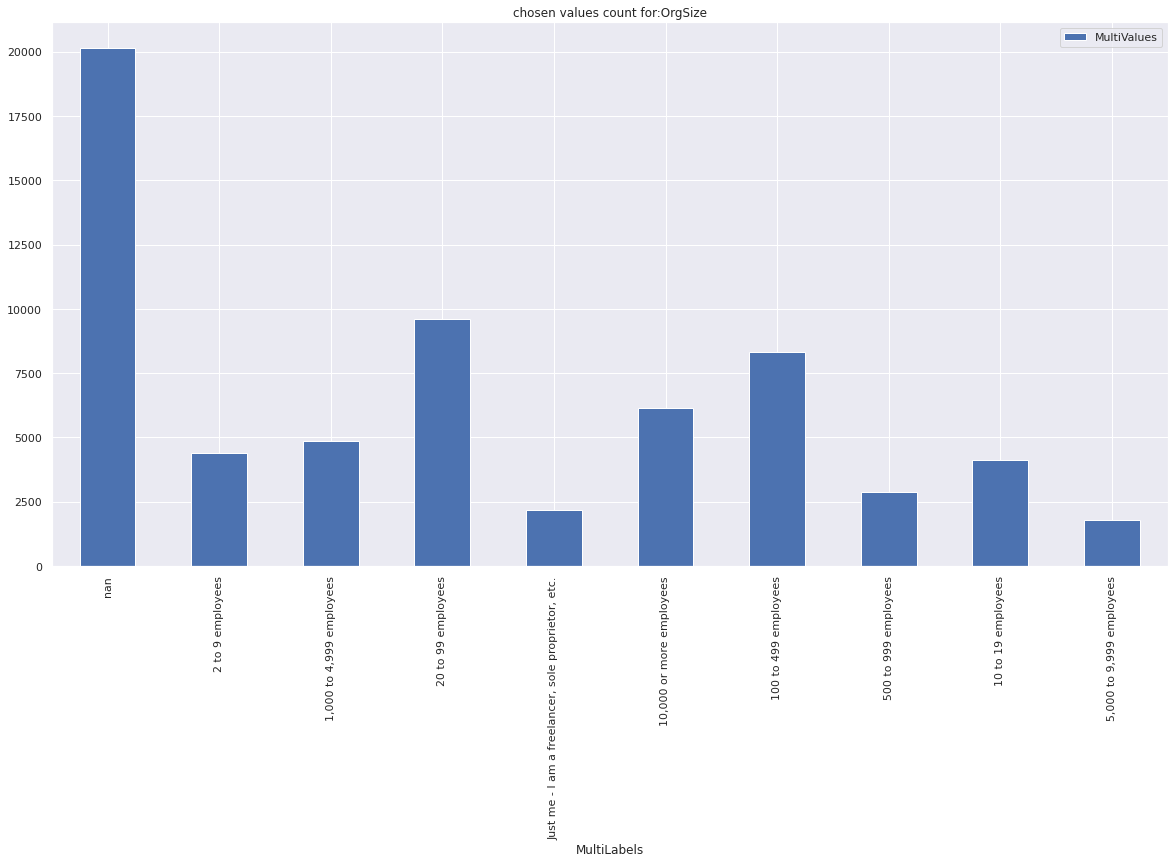

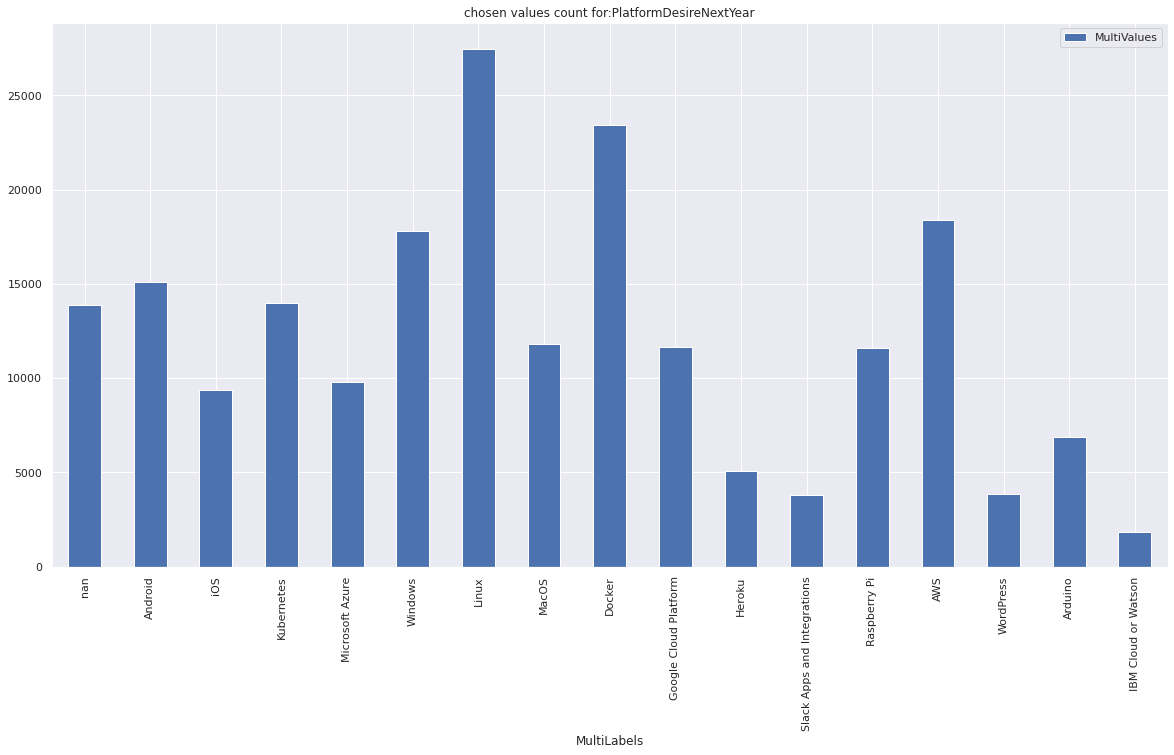

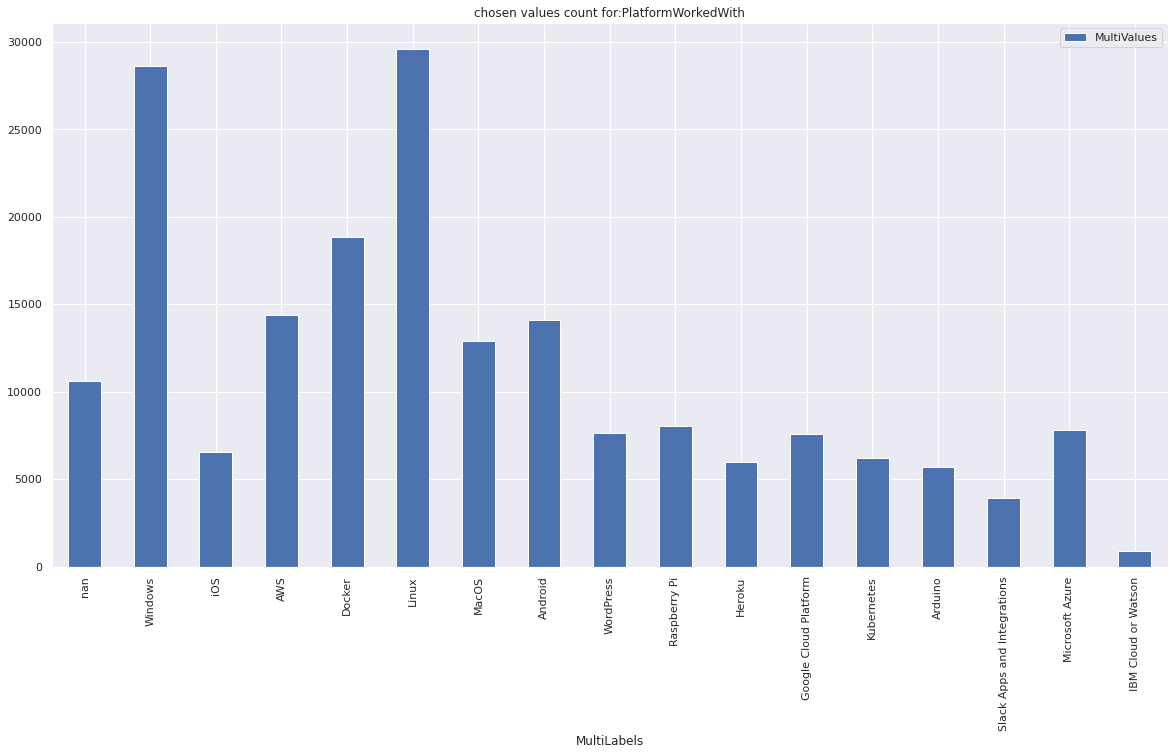

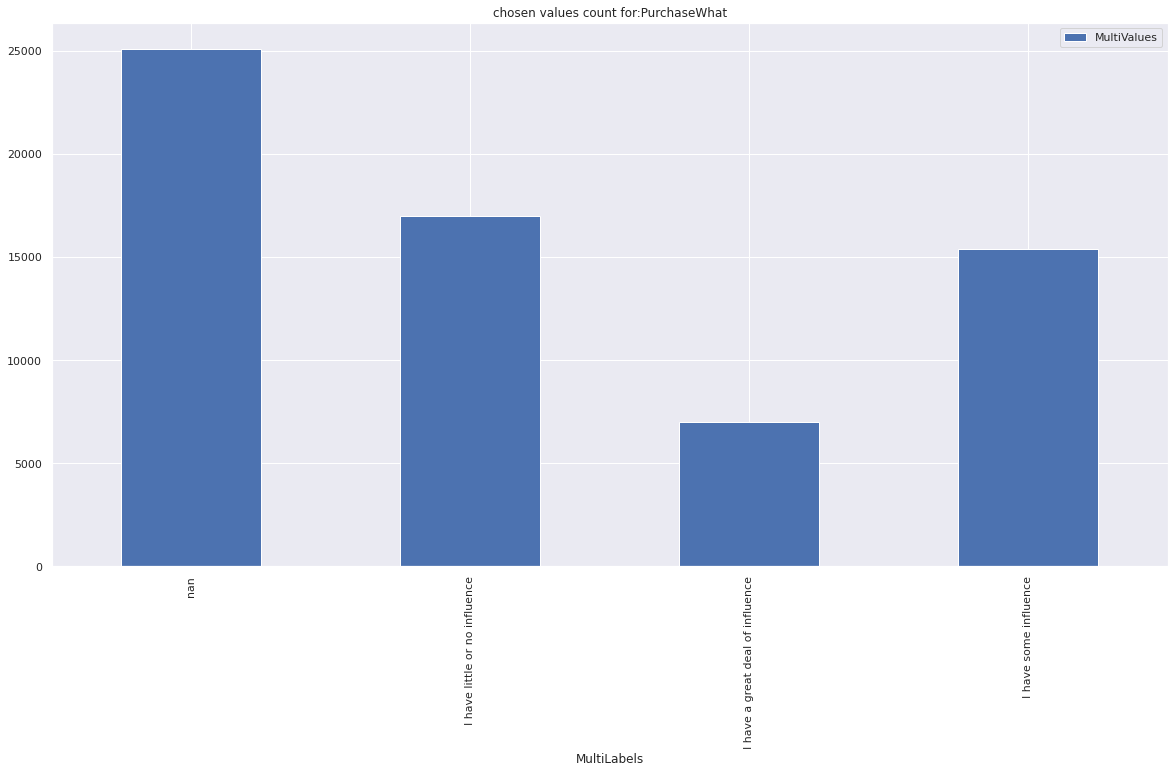

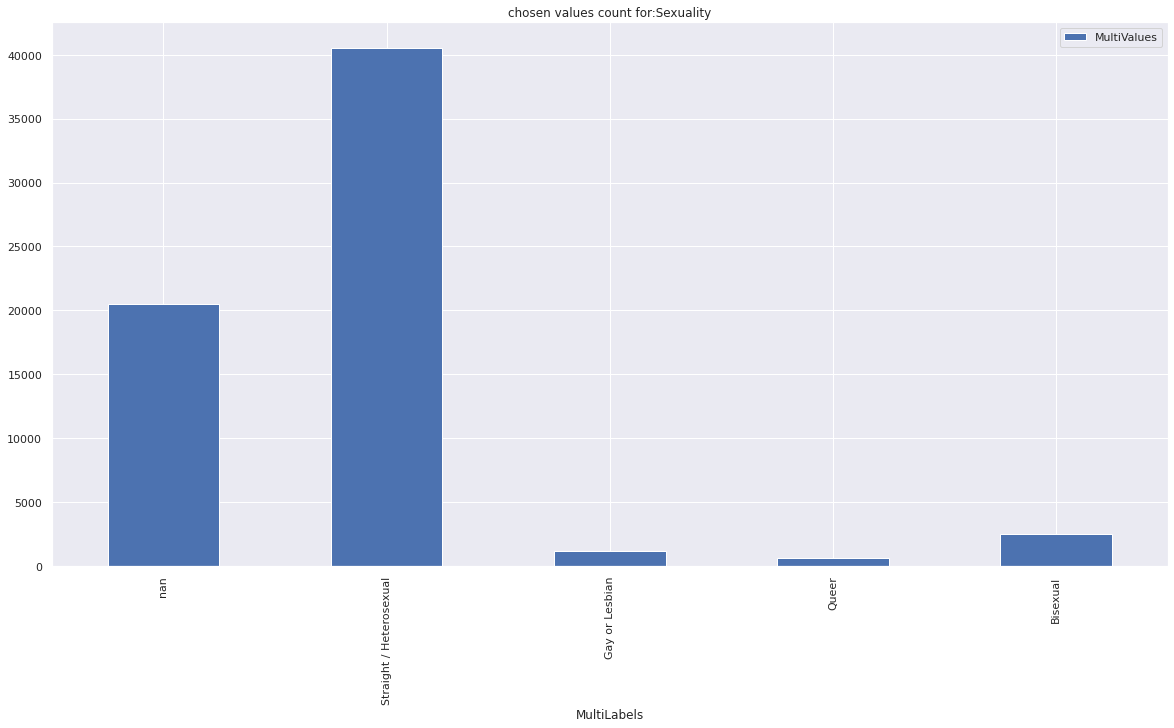

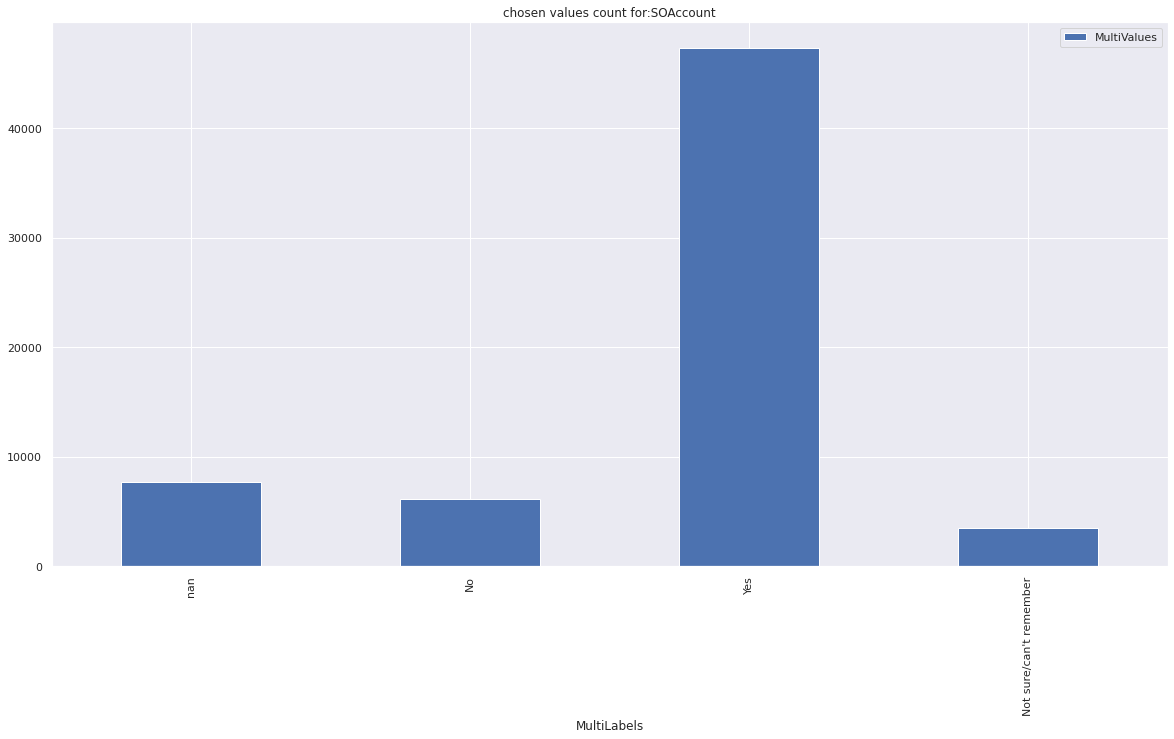

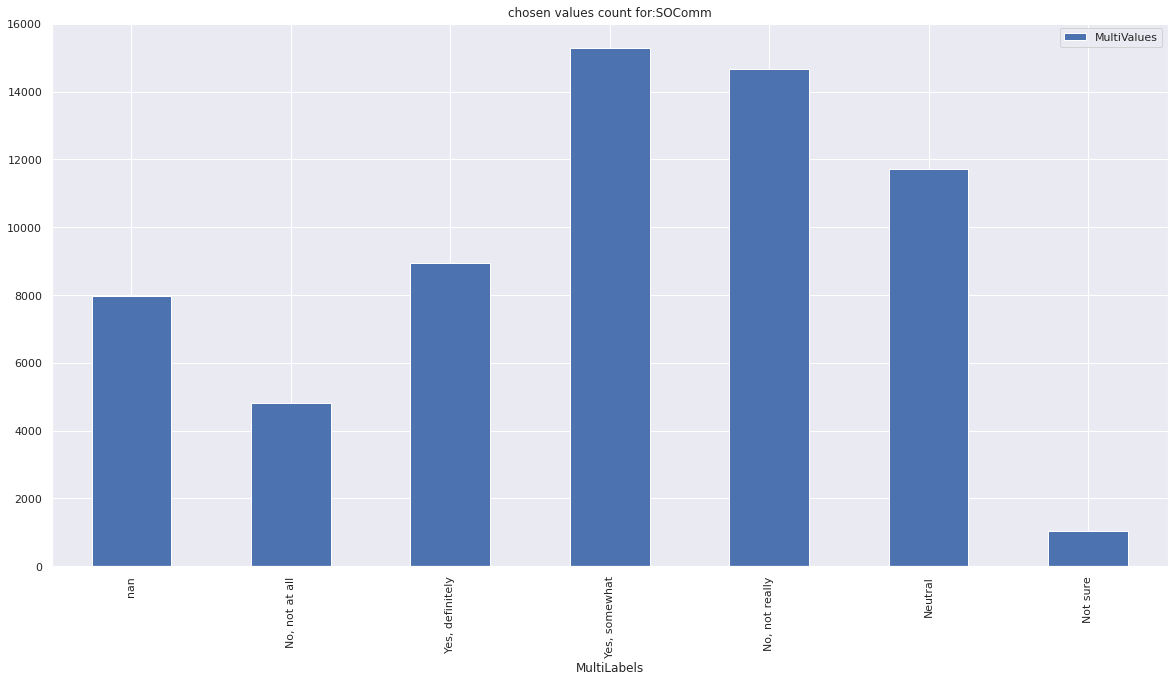

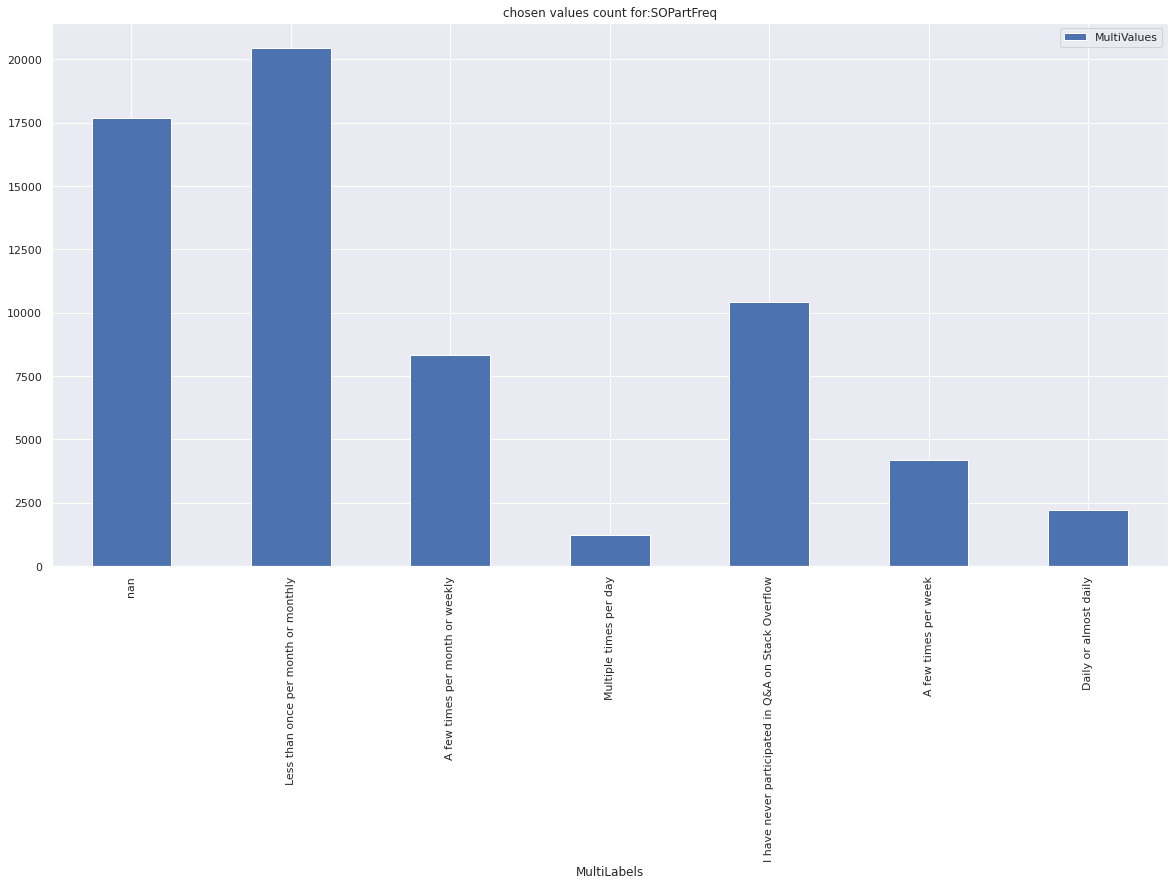

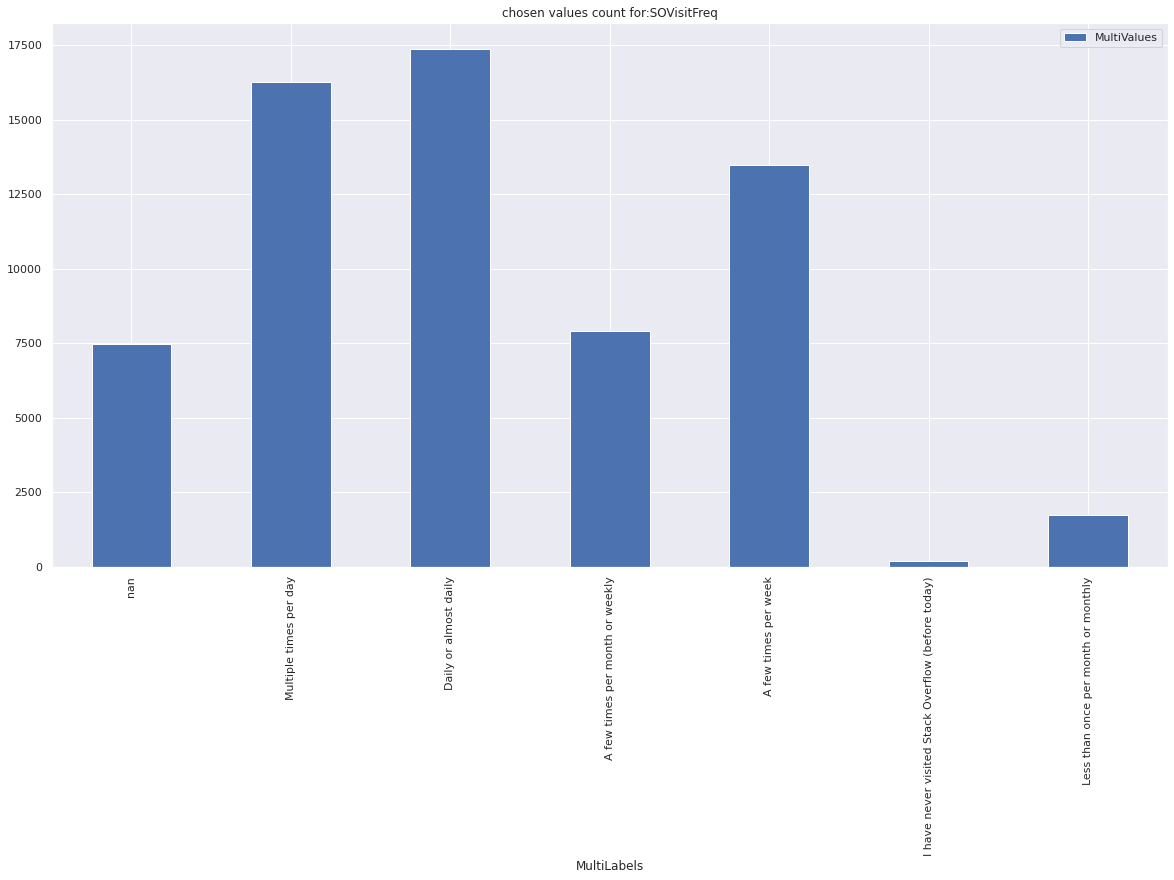

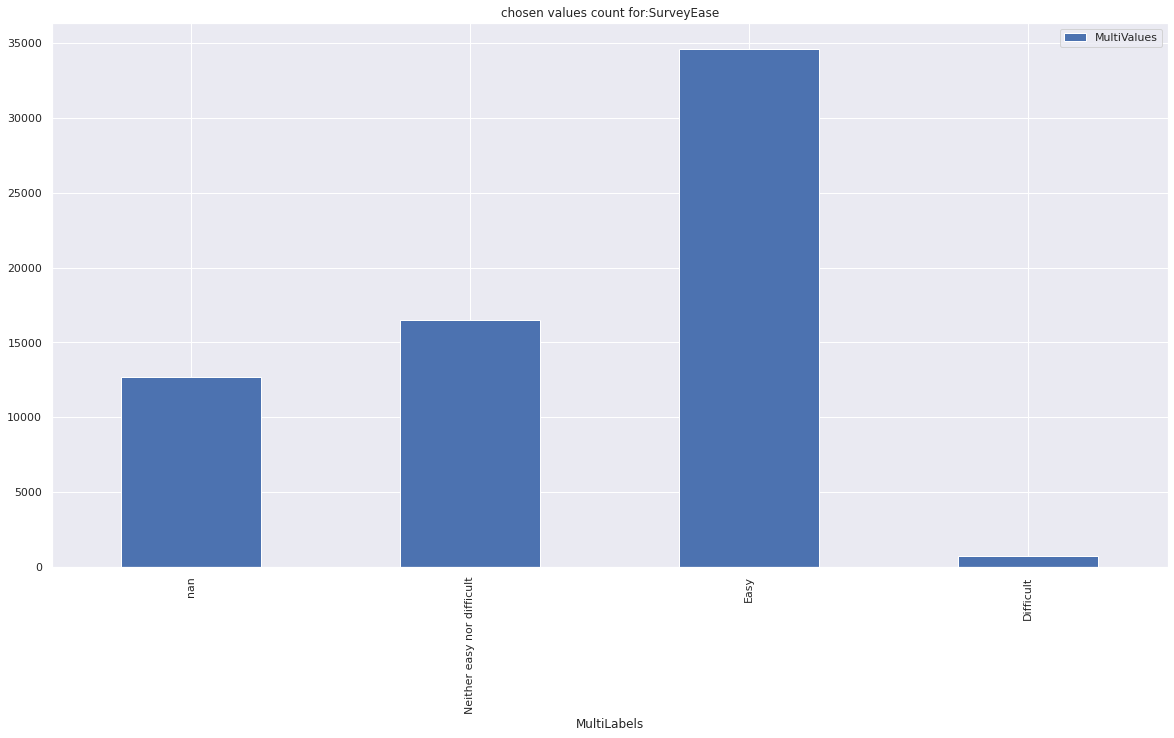

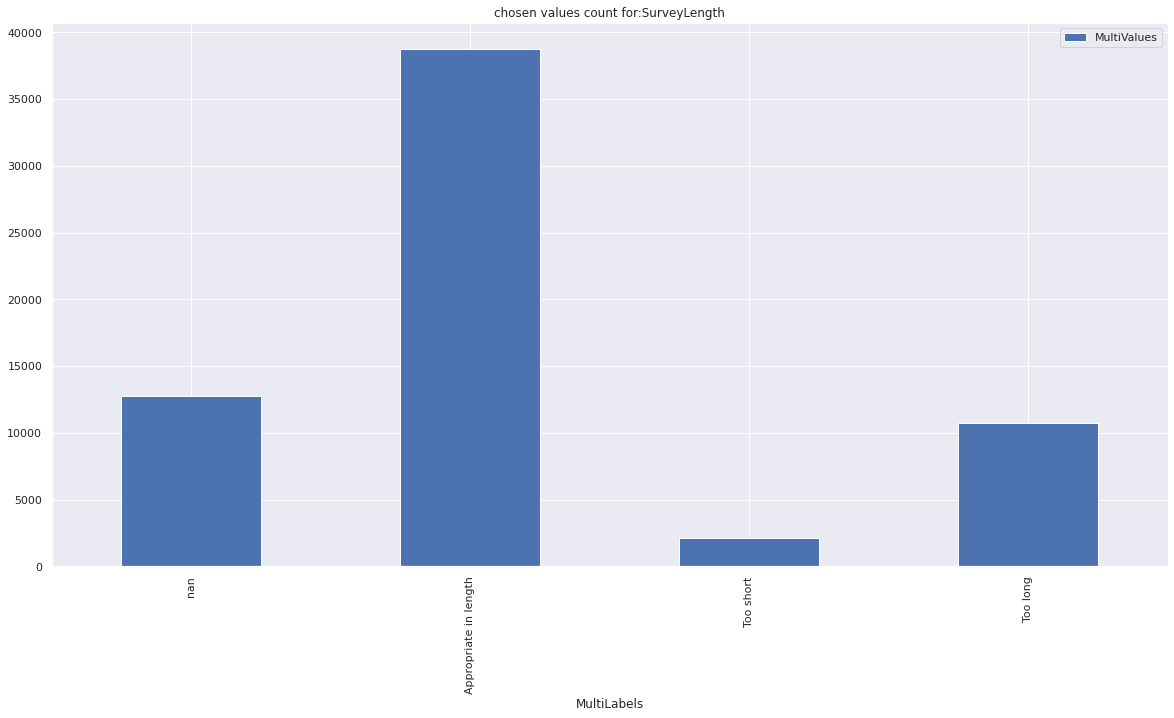

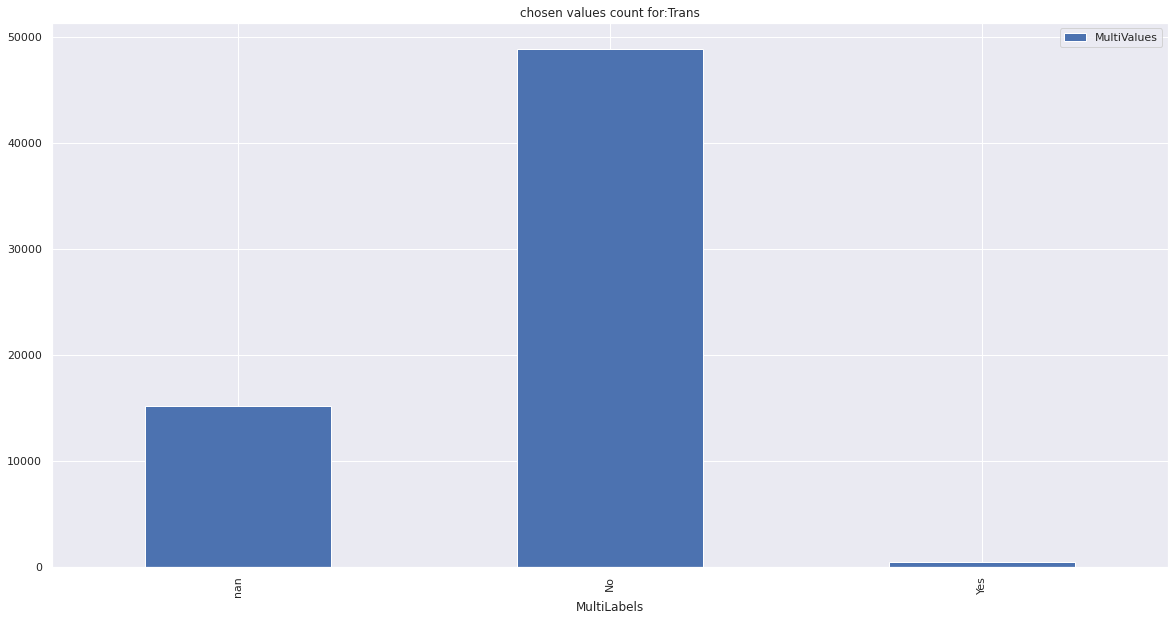

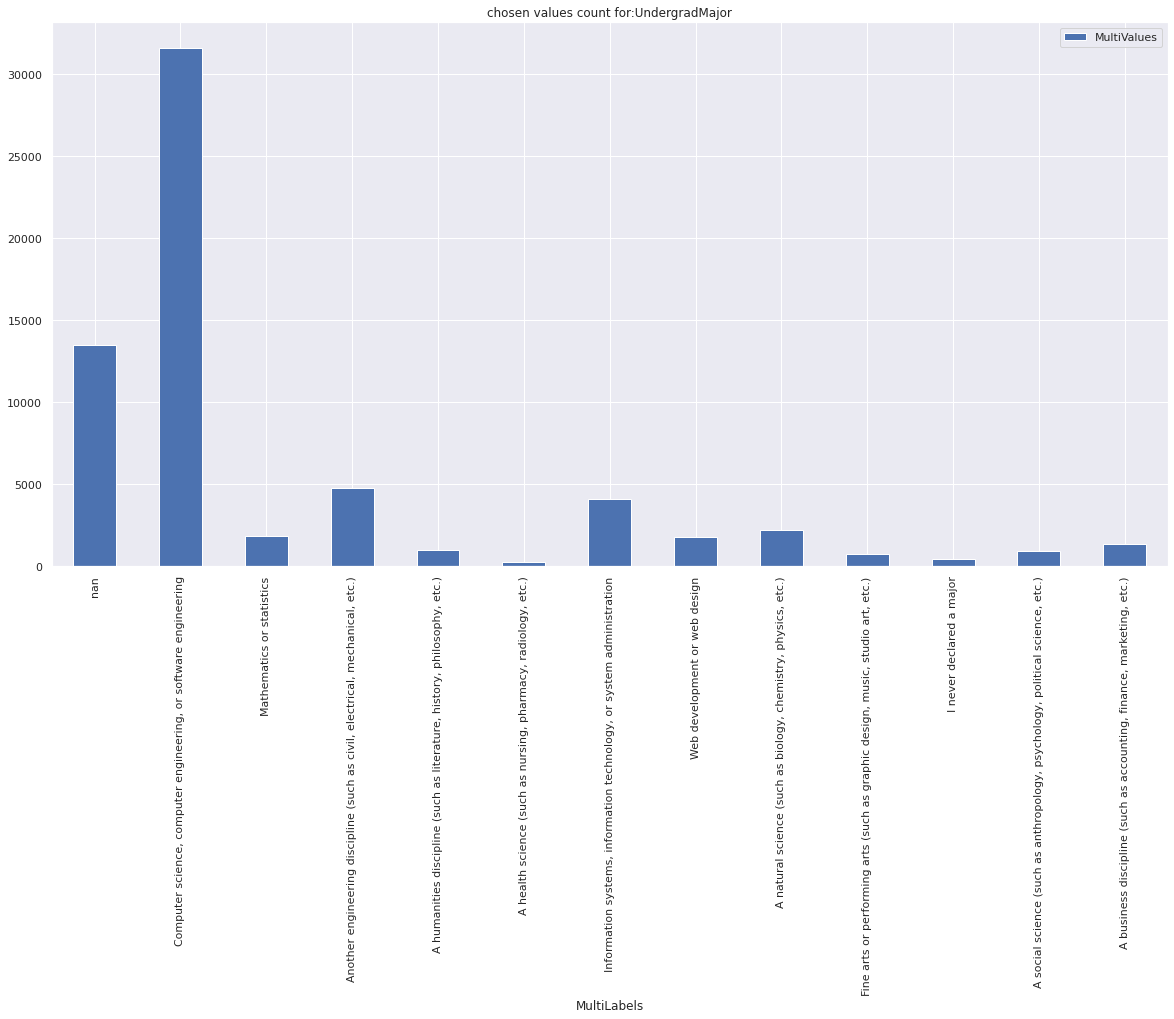

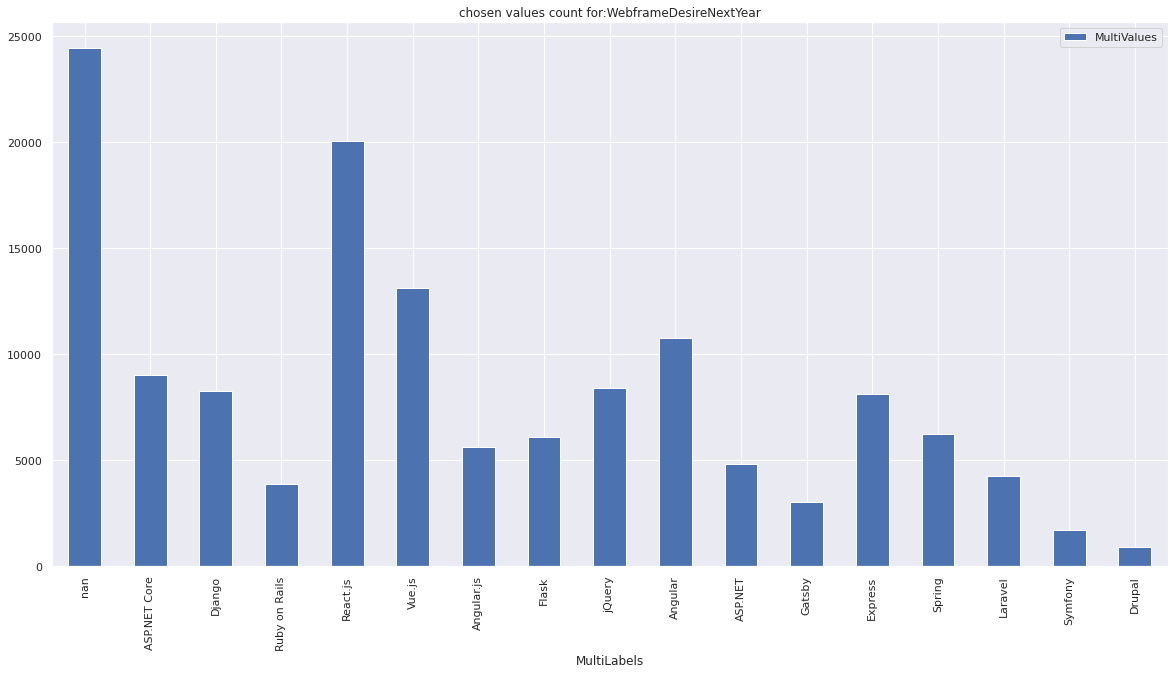

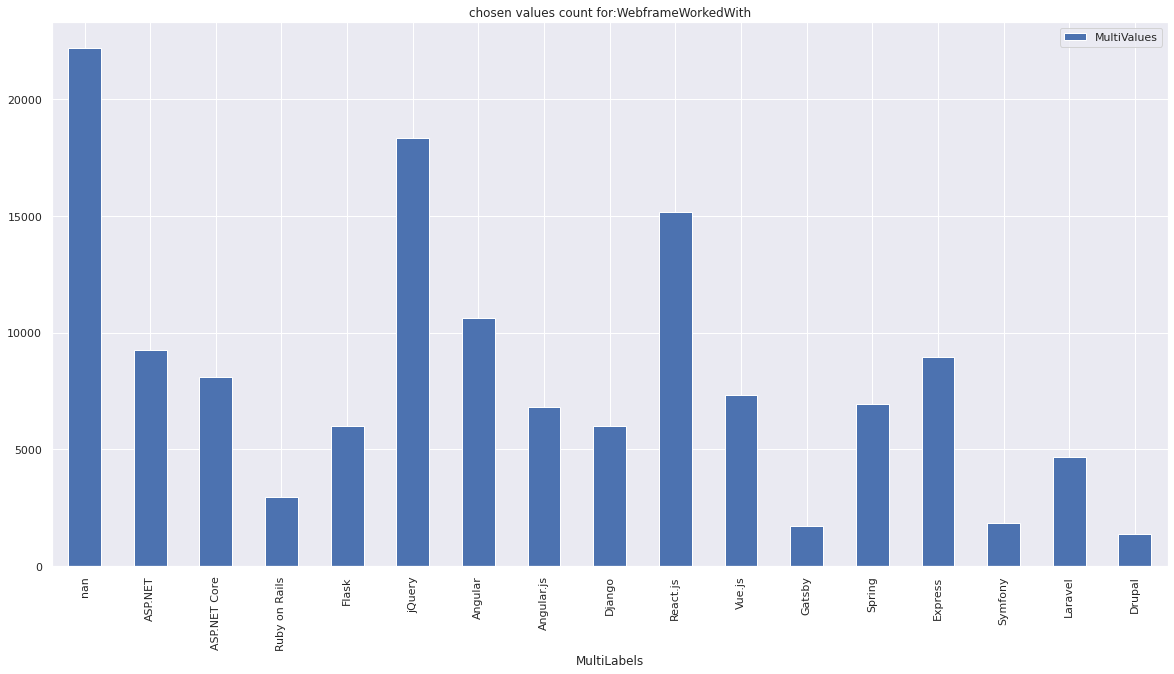

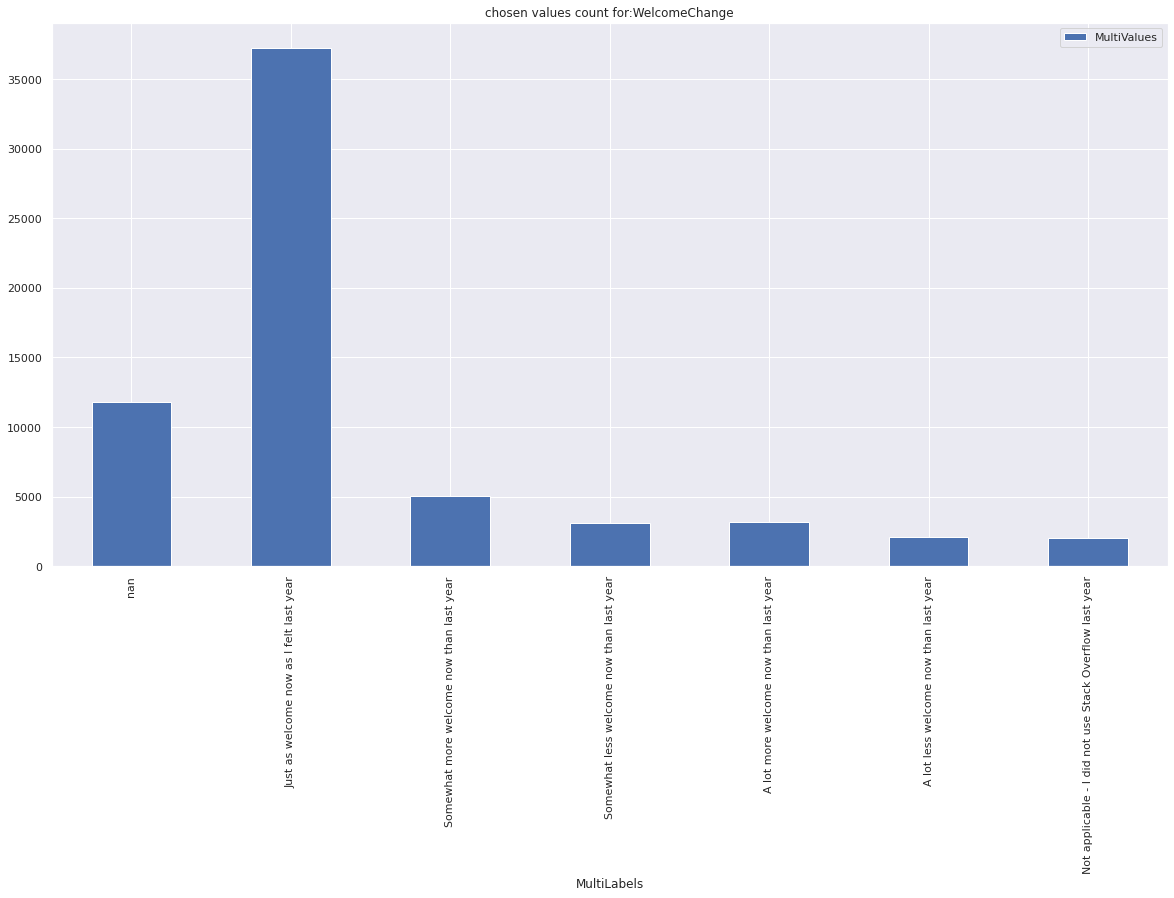

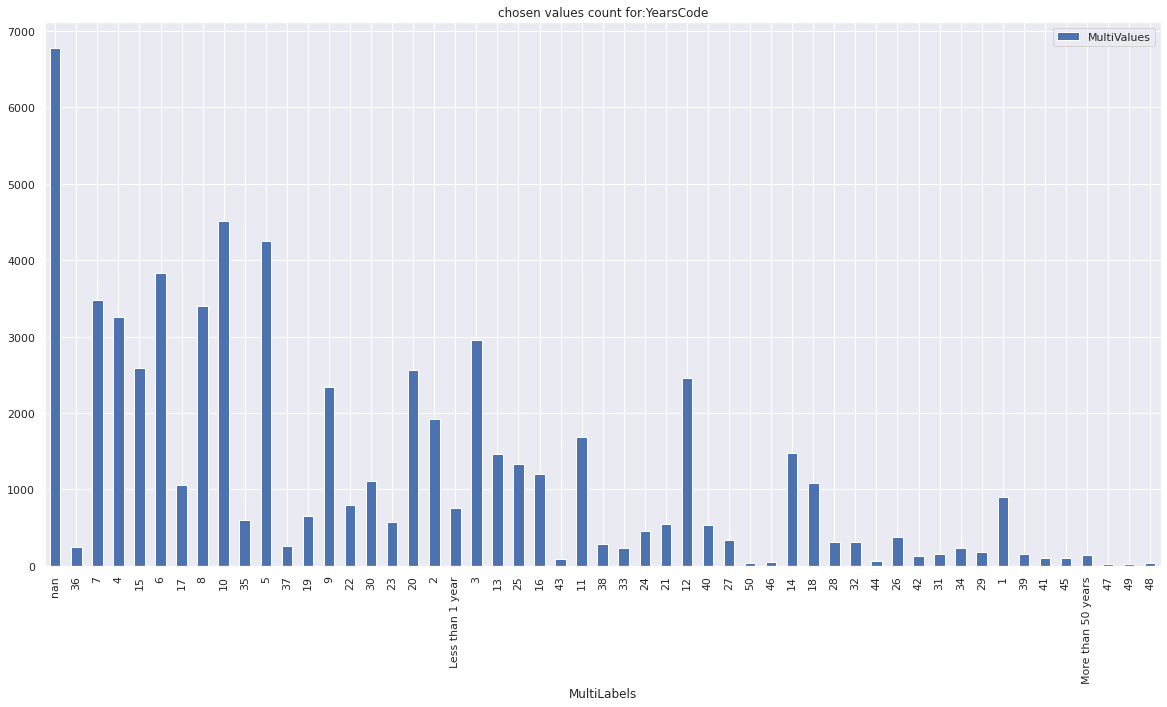

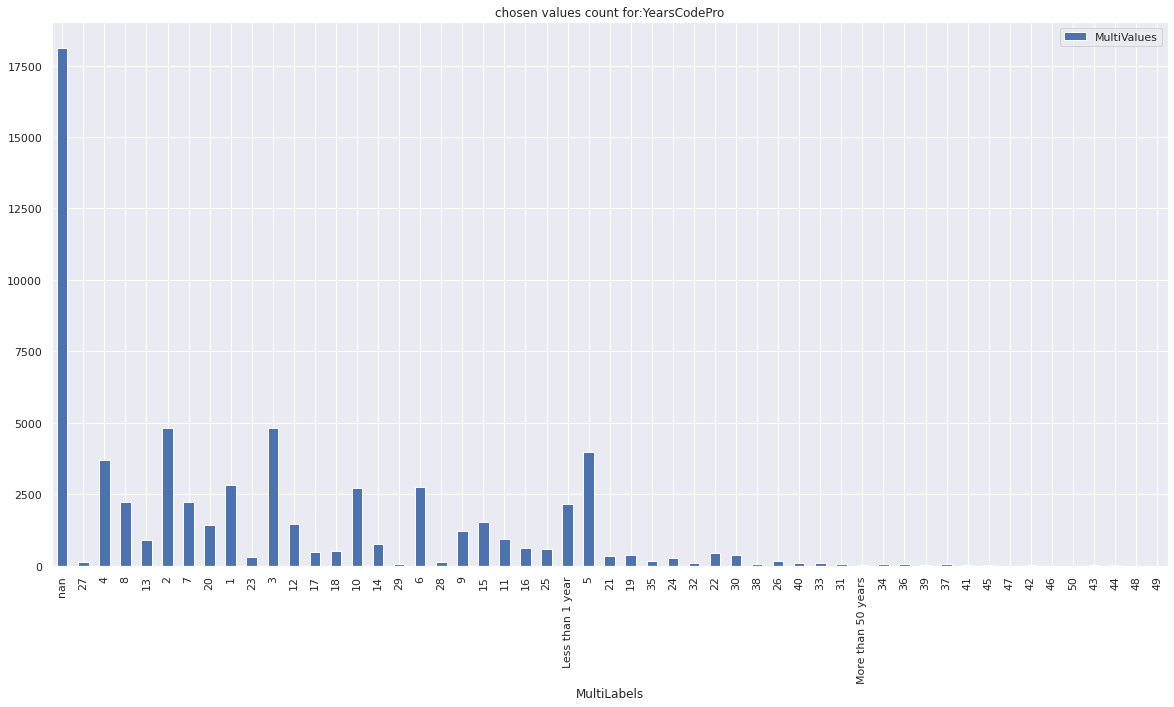

In [23]:
df_cat_fields = {}
for c in df.select_dtypes(include=['object']):
    choice_count = t.get_multiple_choice_value_count(df, c); 
    df_cat_fields[c] = choice_count[c];
df_cat_fields=pd.DataFrame(df_cat_fields);

In [24]:
df_cat_fields.head()

,MainBranch,Hobbyist,Age1stCode,CompFreq,Country,CurrencyDesc,CurrencySymbol,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,...,SOVisitFreq,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,YearsCode,YearsCodePro
0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,I am a developer by profession,Yes,13,Monthly,Germany,European Euro,EUR,Microsoft SQL Server,Elasticsearch,"Developer, desktop or enterprise applications",...,Multiple times per day,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET,Just as welcome now as I felt last year,36,27
2,I code primarily as a hobby,No,19,Yearly,United Kingdom,Pound sterling,GBP,MySQL,Microsoft SQL Server,"Developer, full-stack",...,Daily or almost daily,Easy,Too short,Yes,Mathematics or statistics,Django,ASP.NET Core,Somewhat more welcome now than last year,7,4
3,"I used to be a developer by profession, but no...",NaN,15,Weekly,Russian Federation,Albanian lek,ALL,PostgreSQL,Oracle,"Developer, mobile",...,A few times per month or weekly,Difficult,Too long,NaN,"Another engineering discipline (such as civil,...",Ruby on Rails,Ruby on Rails,Somewhat less welcome now than last year,4,8
4,"I am not primarily a developer, but I write co...",NaN,18,NaN,Albania,United States dollar,USD,MongoDB,MySQL,Designer,...,A few times per week,NaN,NaN,NaN,"A humanities discipline (such as literature, h...",React.js,Flask,A lot more welcome now than last year,15,13


### Closer look at some of the categorical fileds(exclusing missing values)
#### for the Majority of Participants(MoP) we check results on the following categories:
1. Basic Information
    * MoP are 11 to 30 years old
    * MoP are getting paid weekly or yearly
    * MoP are professional developers
    * MoP are hoppyst programmer
    * MoP are geeting paid monthly or yearly
    * MoP are located in USA
    * MoP have 1 to 15 years programming experience
    * MoP have 1 to 5 years professional programming experience
    
    
2. Education, Work, and Career
    * MoP have Bachelor's or Master's degree
    * MoP are full time employee
    * MoP are not actively looking, but open to new opportunities
    * MoP are looking for new jobs because:
        * Curious about other opportunities
        * Wanting to share accomplishments with a wider network
        * Better compensation
        * Growth or leadership opportunities
        * Better work/life balance
    * MoP are lean new thing once a year or every few months
    * MoP search for job in following way:
        * Read company media, such as employee blogs or company culture videos
        * Company reviews from third party sites (e.g. Glassdoor, Blind)
        * Personal network - friends or family  
    * MoP are studied Computer science, computer engineering, or software engineering  
   
   
3. Technology and Tech Culture
    * MoP want to learn PostgreSQL,MomgoDB, MySQL
    * MoP used MySQL, MS SQL Server, PostgreSQL, SQLite
    * MoP are BackEnd Dev, FullStack Dev, FrontEnd Dev
    * MoP are satisfied
    * MoP want to learn HTML/CSS, JavaScript, Python, SQL
    * MoP work with HTML/CSS, JavaScript, SQL, Python
    * MoP want to learn NodeJs
    * MoP are using Windows
    * MoP want to use Linux and Docker
    * MoP want to learn ReactJs
    
    
4. Stack Overflow Usage + Community
    * MoP want to learn GitHub, Slack
    * MoP find DevOps Extremely important
    * MoP are not interested in off-topic in Stack-Overflow
    * MoP are not member of any other community
    * MoP are fine with visiting similar link for question
    * MoP are using Stack Overflow when they are stucked
    * MoP are participating in Q&A less than once per month or monthly 
    * MoP find survey easy
    * MoP feel welcome in Stack-Overflow
    
    
5. Demographic Information
    * MoP are white or European
    * MoP are Man
    * MoP Straight / Heterosexual
    * MoP have the following for choosing job:
        * Languages, frameworks, and other technologies I’d be working with
        * Remote work options
        * Opportunities for professional development
        * Flex time or a flexible schedule


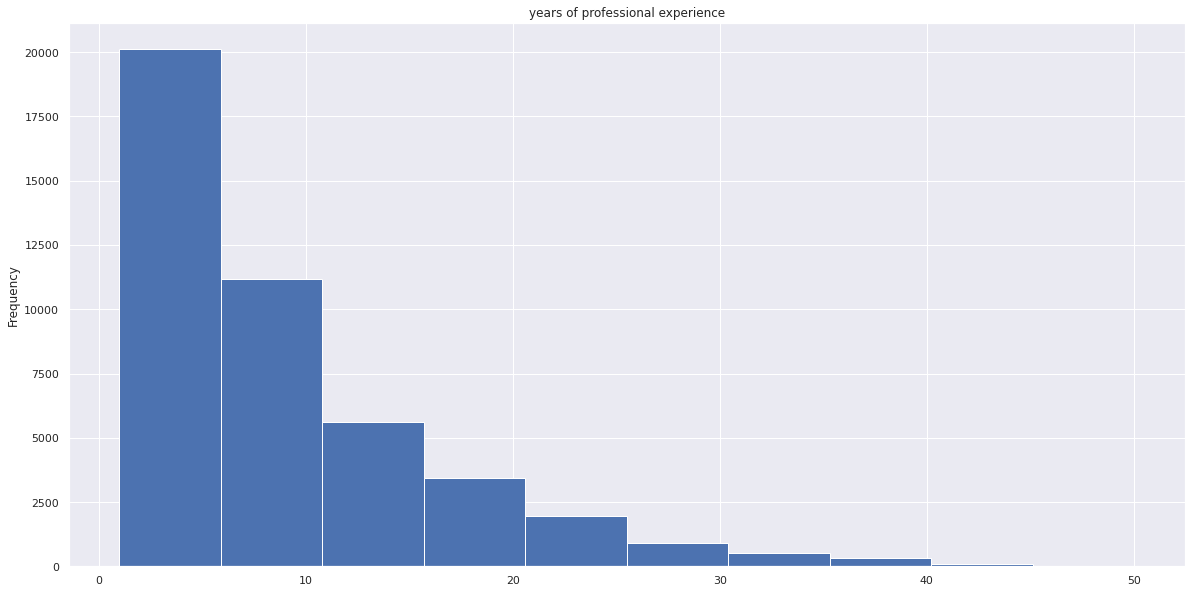

In [25]:
df[pd.to_numeric(df['YearsCodePro'], errors='coerce').notnull()]['YearsCodePro'].astype(np.float).plot(kind='hist',figsize=(20,10), title='years of professional experience');

### Comparing anual income based on gender and education
* data is filtered based on professional working experiences from 5 to 10 years.
* data grouped into Man and Woman and Education level
* some observations:
    * men in average make more money than women with the same level of education and working experiences
    * women with bachlor's degree make more money than man
    * among both group professionals with doctoral degree make have the highest anual income

In [26]:
pd.DataFrame(df.query("MainBranch == 'I am a developer by profession' and (Gender == 'Man' or Gender == 'Woman') and (YearsCodePro > '5' or YearsCodePro < '10')").groupby(['Gender', 'EdLevel']).mean()['ConvertedComp']).sort_index(axis=1,ascending=True)

ConvertedComp
Gender EdLevel                                                          
Man    Associate degree (A.A., A.S., etc.)                  83638.956863
       Bachelor’s degree (B.A., B.S., B.Eng., etc.)         97767.588041
       I never completed any formal education               47020.615385
       Master’s degree (M.A., M.S., M.Eng., MBA, etc.)      94446.611998
       Other doctoral degree (Ph.D., Ed.D., etc.)          114680.070922
       Primary/elementary school                           110352.941176
       Professional degree (JD, MD, etc.)                   87032.157895
       Secondary school (e.g. American high school, Ge...   60123.348315
       Some college/university study without earning a...   69627.575724
Woman  Associate degree (A.A., A.S., etc.)                  54090.500000
       Bachelor’s degree (B.A., B.S., B.Eng., etc.)        112622.367901
       I never completed any formal education                        NaN
       Master’s degree (M.A., M.S., M.Eng., MBA, etc.)      96294.746988
       Other doctoral degree (Ph.D., Ed.D., etc.)           73867.869565
       Professional degree (JD, MD, etc.)                   56888.750000
       Secondary school (e.g. American high school, Ge...   41181.388889
       Some college/university study without earning a...   46951.425000

### Comparing higher education level to coding tendency
* graduate participants programming more than under-graduates
* graduate participants tend to stop codding during their carrier
* under-graduates are hobbiest programmers compare to graduates

In [5]:
comp_df = t.compare_multiple_choice_with_filter(df, 'MainBranch', 'HigherEd', [0,1])
comp_df.style.bar(subset=[comp_df.columns[-1]], align='mid', color=['#d65f5f', '#5fba7d']) 

,HigherEd_1_perc,HigherEd_0_perc,HigherEd_Diff_Vals
MainBranch,,,
I am a developer by profession,1898.667000,5966.833000,-4068.166000
I am a student who is learning to code,74.667000,1253.667000,-1179.000000
"I am not primarily a developer, but I write code sometimes as part of my work",249.000000,668.000000,-419.000000
I code primarily as a hobby,35.000000,350.667000,-315.667000
"I used to be a developer by profession, but no longer am",55.333000,141.833000,-86.500000
nan,6.000000,43.833000,-37.833000


### Comparing higher education level to developer position tendency
* graduate participants working more on enterprise application 
* graduate participants working more on backend programming 
* graduate participants working more on data related positions such as data scientist and data engineer
* there are more educators among graduate participants

In [6]:
comp_df = t.compare_multiple_choice_with_filter(df, 'DevType', 'HigherEd', [0,1])
comp_df.style.bar(subset=[comp_df.columns[-1]], align='mid', color=['#d65f5f', '#5fba7d']) 


,HigherEd_1_perc,HigherEd_0_perc,HigherEd_Diff_Vals
DevType,,,
Academic researcher,52.042000,95.958000,-43.916000
Data or business analyst,48.792000,118.875000,-70.083000
Data scientist or machine learning specialist,65.667000,100.500000,-34.833000
Database administrator,50.667000,187.750000,-137.083000
Designer,42.667000,179.042000,-136.375000
DevOps specialist,66.708000,182.000000,-115.292000
"Developer, QA or test",38.083000,126.375000,-88.292000
"Developer, back-end",284.667000,849.833000,-565.166000
"Developer, desktop or enterprise applications",127.125000,363.875000,-236.750000


In [7]:
comp_df = t.compare_multiple_choice_with_filter(df, 'DevType', 'JobSatisfied', [0,1])
comp_df.style.bar(subset=[comp_df.columns[-1]], align='mid', color=['#d65f5f', '#5fba7d']) 

,JobSatisfied_1_perc,JobSatisfied_0_perc,JobSatisfied_Diff_Vals
DevType,,,
Academic researcher,80.083000,67.917000,12.166000
Data or business analyst,90.458000,77.208000,13.250000
Data scientist or machine learning specialist,96.917000,69.250000,27.667000
Database administrator,134.958000,103.458000,31.500000
Designer,115.208000,106.500000,8.708000
DevOps specialist,152.792000,95.917000,56.875000
"Developer, QA or test",94.208000,70.250000,23.958000
"Developer, back-end",653.708000,480.792000,172.916000
"Developer, desktop or enterprise applications",282.167000,208.833000,73.334000


### Job statisfaction
* under-graduates tend to not answer about thier job statisfaction level
* graduates are more statisfied with their job compare to under-graduates

In [8]:
comp_df = t.compare_multiple_choice_with_filter(df, 'JobSat', 'HigherEd', [0,1])
comp_df.style.bar(subset=[comp_df.columns[-1]], align='mid', color=['#d65f5f', '#5fba7d']) 

,HigherEd_1_perc,HigherEd_0_perc,HigherEd_Diff_Vals
JobSat,,,
Neither satisfied nor dissatisfied,250.833000,713.000000,-462.167000
Slightly dissatisfied,317.000000,870.333000,-553.333000
Slightly satisfied,621.333000,1700.333000,-1079.000000
Very dissatisfied,167.833000,456.500000,-288.667000
Very satisfied,661.333000,1773.833000,-1112.500000
nan,300.333000,2910.833000,-2610.500000


In [9]:
comp_df = t.compare_multiple_choice_with_filter(df, 'JobSat', 'Gender', ['Man','Woman'])
comp_df.style.bar(subset=[comp_df.columns[-1]], align='mid', color=['#d65f5f', '#5fba7d']) 

,Gender_Woman_perc,Gender_Man_perc,Gender_Diff_Vals
JobSat,,,
Neither satisfied nor dissatisfied,53.500000,757.500000,-704.000000
Slightly dissatisfied,79.333000,968.167000,-888.834000
Slightly satisfied,146.167000,1880.167000,-1734.000000
Very dissatisfied,35.667000,492.833000,-457.166000
Very satisfied,171.667000,1955.000000,-1783.333000
nan,154.333000,1615.167000,-1460.834000


### Down below I compare multiple filed relative to their some filter condition
* The results are self-explanatory
* JobStatisfaction defined as if a participant had any level of statisfaction in his job
* HigherEd defined as if a participant has master's degree or above

In [10]:
comp_df = t.compare_multiple_choice_with_filter(df, 'JobSeek', 'Gender', ['Man','Woman'])
comp_df.style.bar(subset=[comp_df.columns[-1]], align='mid', color=['#d65f5f', '#5fba7d']) 

,Gender_Woman_perc,Gender_Man_perc,Gender_Diff_Vals
JobSeek,,,
I am actively looking for a job,171.500000,1808.750000,-1637.250000
I am not interested in new job opportunities,261.750000,2706.500000,-2444.750000
"I’m not actively looking, but I am open to new opportunities",474.000000,6323.750000,-5849.750000
nan,53.750000,664.250000,-610.500000


In [11]:
comp_df = t.compare_multiple_choice_with_filter(df, 'JobSeek', 'HigherEd', [0,1])
comp_df.style.bar(subset=[comp_df.columns[-1]], align='mid', color=['#d65f5f', '#5fba7d']) 

,HigherEd_1_perc,HigherEd_0_perc,HigherEd_Diff_Vals
JobSeek,,,
I am actively looking for a job,447.000000,1790.500000,-1343.500000
I am not interested in new job opportunities,844.250000,2406.000000,-1561.750000
"I’m not actively looking, but I am open to new opportunities",1788.250000,5655.750000,-3867.500000
nan,398.500000,2785.000000,-2386.500000


In [12]:
comp_df = t.compare_multiple_choice_with_filter(df, 'JobSeek', 'JobSatisfied', [0,1])
comp_df.style.bar(subset=[comp_df.columns[-1]], align='mid', color=['#d65f5f', '#5fba7d']) 

,JobSatisfied_1_perc,JobSatisfied_0_perc,JobSatisfied_Diff_Vals
JobSeek,,,
I am actively looking for a job,451.250000,1786.250000,-1335.000000
I am not interested in new job opportunities,2419.500000,830.750000,1588.750000
"I’m not actively looking, but I am open to new opportunities",3889.250000,3554.750000,334.500000
nan,375.250000,2808.250000,-2433.000000


In [13]:
comp_df = t.compare_multiple_choice_with_filter(df, 'EdLevel', 'JobSatisfied', [0,1])
comp_df.style.bar(subset=[comp_df.columns[-1]], align='mid', color=['#d65f5f', '#5fba7d']) 

,JobSatisfied_1_perc,JobSatisfied_0_perc,JobSatisfied_Diff_Vals
EdLevel,,,
"Associate degree (A.A., A.S., etc.)",89.200000,95.100000,-5.900000
"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",1369.900000,1284.300000,85.600000
I never completed any formal education,13.700000,35.600000,-21.900000
"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",731.800000,579.400000,152.400000
"Other doctoral degree (Ph.D., Ed.D., etc.)",106.600000,62.400000,44.200000
Primary/elementary school,11.800000,82.300000,-70.500000
"Professional degree (JD, MD, etc.)",37.800000,42.200000,-4.400000
"Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",121.700000,355.400000,-233.700000
Some college/university study without earning a degree,320.000000,403.900000,-83.900000


In [14]:
comp_df = t.compare_multiple_choice_with_filter(df, 'OrgSize', 'JobSatisfied', [0,1])
comp_df.style.bar(subset=[comp_df.columns[-1]], align='mid', color=['#d65f5f', '#5fba7d'])

,JobSatisfied_1_perc,JobSatisfied_0_perc,JobSatisfied_Diff_Vals
OrgSize,,,
"1,000 to 4,999 employees",310.500000,175.800000,134.700000
10 to 19 employees,256.800000,155.900000,100.900000
"10,000 or more employees",383.700000,231.200000,152.500000
100 to 499 employees,527.300000,303.800000,223.500000
2 to 9 employees,278.600000,162.300000,116.300000
20 to 99 employees,606.200000,353.500000,252.700000
"5,000 to 9,999 employees",115.500000,65.300000,50.200000
500 to 999 employees,183.900000,104.100000,79.800000
"Just me - I am a freelancer, sole proprietor, etc.",134.400000,84.600000,49.800000


In [15]:
comp_df = t.compare_multiple_choice_with_filter(df, 'OrgSize', 'HigherEd', [0,1])
comp_df.style.bar(subset=[comp_df.columns[-1]], align='mid', color=['#d65f5f', '#5fba7d'])

,HigherEd_1_perc,HigherEd_0_perc,HigherEd_Diff_Vals
OrgSize,,,
"1,000 to 4,999 employees",138.300000,348.000000,-209.700000
10 to 19 employees,94.800000,317.900000,-223.100000
"10,000 or more employees",186.500000,428.400000,-241.900000
100 to 499 employees,229.000000,602.100000,-373.100000
2 to 9 employees,104.400000,336.500000,-232.100000
20 to 99 employees,251.900000,707.800000,-455.900000
"5,000 to 9,999 employees",51.200000,129.600000,-78.400000
500 to 999 employees,83.600000,204.400000,-120.800000
"Just me - I am a freelancer, sole proprietor, etc.",53.100000,165.900000,-112.800000


In [16]:
comp_df = t.compare_multiple_choice_with_filter(df, 'UndergradMajor', 'JobSatisfied', [0,1])
comp_df.style.bar(subset=[comp_df.columns[-1]], align='mid', color=['#d65f5f', '#5fba7d'])

,JobSatisfied_1_perc,JobSatisfied_0_perc,JobSatisfied_Diff_Vals
UndergradMajor,,,
"A business discipline (such as accounting, finance, marketing, etc.)",54.538000,51.231000,3.307000
"A health science (such as nursing, pharmacy, radiology, etc.)",8.231000,11.154000,-2.923000
"A humanities discipline (such as literature, history, philosophy, etc.)",45.077000,32.385000,12.692000
"A natural science (such as biology, chemistry, physics, etc.)",99.769000,69.846000,29.923000
"A social science (such as anthropology, psychology, political science, etc.)",40.538000,31.231000,9.307000
"Another engineering discipline (such as civil, electrical, mechanical, etc.)",191.692000,174.000000,17.692000
"Computer science, computer engineering, or software engineering",1255.308000,1174.077000,81.231000
"Fine arts or performing arts (such as graphic design, music, studio art, etc.)",31.923000,23.846000,8.077000
I never declared a major,14.846000,20.000000,-5.154000


In [17]:
comp_df = t.compare_multiple_choice_with_filter(df, 'UndergradMajor', 'HigherEd', [0,1])
comp_df.style.bar(subset=[comp_df.columns[-1]], align='mid', color=['#d65f5f', '#5fba7d'])

,HigherEd_1_perc,HigherEd_0_perc,HigherEd_Diff_Vals
UndergradMajor,,,
"A business discipline (such as accounting, finance, marketing, etc.)",28.769000,77.000000,-48.231000
"A health science (such as nursing, pharmacy, radiology, etc.)",6.538000,12.846000,-6.308000
"A humanities discipline (such as literature, history, philosophy, etc.)",19.692000,57.769000,-38.077000
"A natural science (such as biology, chemistry, physics, etc.)",58.308000,111.308000,-53.000000
"A social science (such as anthropology, psychology, political science, etc.)",21.231000,50.538000,-29.307000
"Another engineering discipline (such as civil, electrical, mechanical, etc.)",115.692000,250.000000,-134.308000
"Computer science, computer engineering, or software engineering",634.692000,1794.692000,-1160.000000
"Fine arts or performing arts (such as graphic design, music, studio art, etc.)",8.385000,47.385000,-39.000000
I never declared a major,1.462000,33.385000,-31.923000


In [18]:
comp_df = t.compare_multiple_choice_with_filter(df, 'Employment', 'JobSatisfied', [0,1])
comp_df.style.bar(subset=[comp_df.columns[-1]], align='mid', color=['#d65f5f', '#5fba7d'])

,JobSatisfied_1_perc,JobSatisfied_0_perc,JobSatisfied_Diff_Vals
Employment,,,
Employed full-time,6178.000000,2569.750000,3608.250000
Employed part-time,226.250000,164.000000,62.250000
"Independent contractor, freelancer, or self-employed",715.500000,351.250000,364.250000
nan,15.500000,68.125000,-52.625000


In [19]:
comp_df = t.compare_multiple_choice_with_filter(df, 'Employment', 'HigherEd', [0,1])
comp_df.style.bar(subset=[comp_df.columns[-1]], align='mid', color=['#d65f5f', '#5fba7d'])

,HigherEd_1_perc,HigherEd_0_perc,HigherEd_Diff_Vals
Employment,,,
Employed full-time,1413.500000,4245.250000,-2831.750000
Employed part-time,43.500000,233.625000,-190.125000
"Independent contractor, freelancer, or self-employed",165.125000,543.875000,-378.750000
"Not employed, and not looking for work",4.000000,36.250000,-32.250000
"Not employed, but looking for work",36.875000,256.000000,-219.125000
Retired,8.500000,21.875000,-13.375000
Student,61.250000,912.125000,-850.875000
nan,6.250000,69.625000,-63.375000


In [20]:
comp_df = t.compare_multiple_choice_with_filter(df, 'Hobbyist', 'JobSatisfied', [0,1])
comp_df.style.bar(subset=[comp_df.columns[-1]], align='mid', color=['#d65f5f', '#5fba7d'])

,JobSatisfied_1_perc,JobSatisfied_0_perc,JobSatisfied_Diff_Vals
Hobbyist,,,
No,3276.500000,2491.667000,784.833000
Yes,10994.000000,9466.667000,1527.333000


In [21]:
comp_df = t.compare_multiple_choice_with_filter(df, 'Hobbyist', 'HigherEd', [0,1])
comp_df.style.bar(subset=[comp_df.columns[-1]], align='mid', color=['#d65f5f', '#5fba7d'])

,HigherEd_1_perc,HigherEd_0_perc,HigherEd_Diff_Vals
Hobbyist,,,
No,1653.000000,3574.000000,-1921.000000
Yes,5303.000000,13260.667000,-7957.667000


In [22]:
comp_df = t.compare_multiple_choice_with_filter(df, 'CompFreq', 'JobSatisfied', [0,1])
comp_df.style.bar(subset=[comp_df.columns[-1]], align='mid', color=['#d65f5f', '#5fba7d'])

,JobSatisfied_1_perc,JobSatisfied_0_perc,JobSatisfied_Diff_Vals
CompFreq,,,
Monthly,2781.000000,1943.750000,837.250000
Weekly,206.750000,131.250000,75.500000
Yearly,3305.500000,1649.000000,1656.500000
nan,842.000000,5256.000000,-4414.000000


In [23]:
comp_df = t.compare_multiple_choice_with_filter(df, 'CompFreq', 'HigherEd', [0,1])
comp_df.style.bar(subset=[comp_df.columns[-1]], align='mid', color=['#d65f5f', '#5fba7d'])

,HigherEd_1_perc,HigherEd_0_perc,HigherEd_Diff_Vals
CompFreq,,,
Monthly,1273.000000,3451.750000,-2178.750000
Weekly,61.750000,276.250000,-214.500000
Yearly,1312.750000,3641.750000,-2329.000000
nan,830.500000,5267.500000,-4437.000000


In [24]:
comp_df = t.compare_multiple_choice_with_filter(df, 'NEWLearn', 'JobSatisfied', [0,1])
comp_df.style.bar(subset=[comp_df.columns[-1]], align='mid', color=['#d65f5f', '#5fba7d'])

,JobSatisfied_1_perc,JobSatisfied_0_perc,JobSatisfied_Diff_Vals
NEWLearn,,,
Every few months,1758.600000,2429.000000,-670.400000
Once a decade,113.400000,134.800000,-21.400000
Once a year,2039.200000,2099.400000,-60.200000
Once every few years,1364.600000,1292.200000,72.400000
nan,432.400000,1228.600000,-796.200000


In [25]:
comp_df = t.compare_multiple_choice_with_filter(df, 'NEWLearn', 'HigherEd', [0,1])
comp_df.style.bar(subset=[comp_df.columns[-1]], align='mid', color=['#d65f5f', '#5fba7d'])

,HigherEd_1_perc,HigherEd_0_perc,HigherEd_Diff_Vals
NEWLearn,,,
Every few months,783.600000,3404.000000,-2620.400000
Once a decade,66.000000,182.200000,-116.200000
Once a year,962.200000,3176.400000,-2214.200000
Once every few years,734.000000,1922.800000,-1188.800000
nan,236.600000,1424.400000,-1187.800000


In [26]:
comp_df = t.compare_multiple_choice_with_filter(df, 'SOVisitFreq', 'JobSatisfied', [0,1])
comp_df.style.bar(subset=[comp_df.columns[-1]], align='mid', color=['#d65f5f', '#5fba7d'])

,JobSatisfied_1_perc,JobSatisfied_0_perc,JobSatisfied_Diff_Vals
SOVisitFreq,,,
A few times per month or weekly,458.571000,670.143000,-211.572000
A few times per week,879.429000,1048.143000,-168.714000
Daily or almost daily,1211.429000,1270.286000,-58.857000
I have never visited Stack Overflow (before today),4.000000,23.429000,-19.429000
Less than once per month or monthly,74.857000,173.571000,-98.714000
Multiple times per day,1208.286000,1116.429000,91.857000
nan,240.714000,829.429000,-588.715000


In [27]:
comp_df = t.compare_multiple_choice_with_filter(df, 'SOVisitFreq', 'HigherEd', [0,1])
comp_df.style.bar(subset=[comp_df.columns[-1]], align='mid', color=['#d65f5f', '#5fba7d'])

,HigherEd_1_perc,HigherEd_0_perc,HigherEd_Diff_Vals
SOVisitFreq,,,
A few times per month or weekly,228.143000,900.571000,-672.428000
A few times per week,416.286000,1511.286000,-1095.000000
Daily or almost daily,579.143000,1902.571000,-1323.428000
I have never visited Stack Overflow (before today),2.571000,24.857000,-22.286000
Less than once per month or monthly,42.429000,206.000000,-163.571000
Multiple times per day,563.000000,1761.714000,-1198.714000
nan,155.857000,914.286000,-758.429000


In [28]:
comp_df = t.compare_multiple_choice_with_filter(df, 'NEWJobHunt', 'JobSatisfied', [0,1])
comp_df.style.bar(subset=[comp_df.columns[-1]], align='mid', color=['#d65f5f', '#5fba7d'])

,JobSatisfied_1_perc,JobSatisfied_0_perc,JobSatisfied_Diff_Vals
NEWJobHunt,,,
Better compensation,1364.615000,910.846000,453.769000
Better work/life balance,904.462000,665.385000,239.077000
Curious about other opportunities,1143.308000,715.462000,427.846000
Growth or leadership opportunities,1029.615000,692.538000,337.077000
Having a bad day (or week or month) at work,338.923000,321.000000,17.923000
Just because,246.769000,154.308000,92.461000
Looking to relocate,520.846000,334.231000,186.615000
Trouble with leadership at my company,487.538000,384.077000,103.461000
Trouble with my direct manager,327.615000,225.615000,102.000000


In [29]:
comp_df = t.compare_multiple_choice_with_filter(df, 'NEWJobHunt', 'HigherEd', [0,1])
comp_df.style.bar(subset=[comp_df.columns[-1]], align='mid', color=['#d65f5f', '#5fba7d']) 

,HigherEd_1_perc,HigherEd_0_perc,HigherEd_Diff_Vals
NEWJobHunt,,,
Better compensation,592.769000,1682.692000,-1089.923000
Better work/life balance,402.000000,1167.846000,-765.846000
Curious about other opportunities,485.077000,1373.692000,-888.615000
Growth or leadership opportunities,441.538000,1280.615000,-839.077000
Having a bad day (or week or month) at work,171.077000,488.846000,-317.769000
Just because,96.308000,304.769000,-208.461000
Looking to relocate,218.154000,636.923000,-418.769000
Trouble with leadership at my company,227.308000,644.308000,-417.000000
Trouble with my direct manager,150.923000,402.308000,-251.385000


In [30]:
comp_df = t.compare_multiple_choice_with_filter(df, 'NEWEdImpt', 'JobSatisfied', [0,1])
comp_df.style.bar(subset=[comp_df.columns[-1]], align='mid', color=['#d65f5f', '#5fba7d']) 

,JobSatisfied_1_perc,JobSatisfied_0_perc,JobSatisfied_Diff_Vals
NEWEdImpt,,,
Critically important,457.667000,334.333000,123.334000
Fairly important,1217.000000,895.333000,321.667000
Not at all important/not necessary,755.833000,541.667000,214.166000
Somewhat important,1114.500000,783.500000,331.000000
Very important,1133.667000,844.000000,289.667000
nan,78.167000,2587.833000,-2509.666000


In [31]:
comp_df = t.compare_multiple_choice_with_filter(df, 'NEWEdImpt', 'HigherEd', [0,1])
comp_df.style.bar(subset=[comp_df.columns[-1]], align='mid', color=['#d65f5f', '#5fba7d']) 

,HigherEd_1_perc,HigherEd_0_perc,HigherEd_Diff_Vals
NEWEdImpt,,,
Critically important,276.500000,515.500000,-239.000000
Fairly important,604.500000,1507.833000,-903.333000
Not at all important/not necessary,172.000000,1125.500000,-953.500000
Somewhat important,406.333000,1491.667000,-1085.334000
Very important,696.500000,1281.167000,-584.667000
nan,162.833000,2503.167000,-2340.334000


In [32]:
comp_df = t.compare_multiple_choice_with_filter(df, 'NEWOvertime', 'JobSatisfied', [0,1])
comp_df.style.bar(subset=[comp_df.columns[-1]], align='mid', color=['#d65f5f', '#5fba7d'])

,JobSatisfied_1_perc,JobSatisfied_0_perc,JobSatisfied_Diff_Vals
NEWOvertime,,,
Never,467.667000,318.667000,149.000000
Occasionally: 1-2 days per quarter but less than monthly,1019.333000,558.667000,460.666000
Often: 1-2 days per week or more,1125.667000,712.167000,413.500000
Rarely: 1-2 days per year or less,667.667000,410.833000,256.834000
Sometimes: 1-2 days per month but less than weekly,1262.333000,662.167000,600.166000
nan,214.167000,3324.167000,-3110.000000


In [33]:
comp_df = t.compare_multiple_choice_with_filter(df, 'NEWOvertime', 'HigherEd', [0,1])
comp_df.style.bar(subset=[comp_df.columns[-1]], align='mid', color=['#d65f5f', '#5fba7d'])

,HigherEd_1_perc,HigherEd_0_perc,HigherEd_Diff_Vals
NEWOvertime,,,
Never,206.500000,579.833000,-373.333000
Occasionally: 1-2 days per quarter but less than monthly,423.833000,1154.167000,-730.334000
Often: 1-2 days per week or more,485.667000,1352.167000,-866.500000
Rarely: 1-2 days per year or less,288.667000,789.833000,-501.166000
Sometimes: 1-2 days per month but less than weekly,529.000000,1395.500000,-866.500000
nan,385.000000,3153.333000,-2768.333000


In [40]:
c, n = t.categorize_values_in_range(df['WorkWeekHrs'], 20);
df[n]=c;
comp_df = t.compare_multiple_choice_with_filter(df, n, 'JobSatisfied', [0,1])
comp_df.style.bar(subset=[comp_df.columns[-1]], align='mid', color=['#d65f5f', '#5fba7d']) 


,JobSatisfied_1_perc,JobSatisfied_0_perc,JobSatisfied_Diff_Vals
WorkWeekHrsCategorized,,,
13.0,115.308000,106.909000,8.399000
37.0,1833.923000,2970.182000,-1136.259000
60.0,223.769000,171.455000,52.314000
84.0,12.231000,8.636000,3.595000
108.0,2.154000,2.364000,-0.210000
131.0,1.000000,1.091000,-0.091000
155.0,2.462000,1.818000,0.644000
179.0,1.615000,0.909000,0.706000
368.0,2.462000,1.182000,1.280000


In [41]:
c, n = t.categorize_values_in_range(df['ConvertedComp'], 20);
df[n]=c;
comp_df =t.compare_multiple_choice_with_filter(df, n, 'JobSatisfied', [0,1])
comp_df.style.bar(subset=[comp_df.columns[-1]], align='mid', color=['#d65f5f', '#5fba7d']) 

,JobSatisfied_1_perc,JobSatisfied_0_perc,JobSatisfied_Diff_Vals
ConvertedCompCategorized,,,
49000.0,828.800000,513.550000,315.250000
150000.0,521.600000,1243.800000,-722.200000
250000.0,24.550000,9.750000,14.800000
350000.0,7.500000,4.250000,3.250000
450000.0,5.200000,2.750000,2.450000
550000.0,5.050000,2.650000,2.400000
650000.0,3.800000,2.850000,0.950000
750000.0,3.250000,2.250000,1.000000
850000.0,3.100000,1.550000,1.550000


In [42]:
c, n = t.categorize_values_in_range(df['ConvertedComp'], 20);
df[n]=c;
comp_df =t.compare_multiple_choice_with_filter(df, n, 'HigherEd', [0,1])
comp_df.style.bar(subset=[comp_df.columns[-1]], align='mid', color=['#d65f5f', '#5fba7d']) 

,HigherEd_1_perc,HigherEd_0_perc,HigherEd_Diff_Vals
ConvertedCompCategorized,,,
49000.0,353.800000,988.550000,-634.750000
150000.0,311.050000,1454.350000,-1143.300000
250000.0,9.350000,24.950000,-15.600000
350000.0,3.150000,8.600000,-5.450000
450000.0,2.350000,5.600000,-3.250000
550000.0,2.550000,5.150000,-2.600000
650000.0,1.850000,4.800000,-2.950000
750000.0,1.950000,3.550000,-1.600000
850000.0,1.600000,3.050000,-1.450000


In [43]:
c, n = t.categorize_values_in_range(df['ConvertedComp'], 20);
df[n]=c;
comp_df =t.compare_multiple_choice_with_filter(df, n, 'Gender', ['Man', 'Woman'])
comp_df.style.bar(subset=[comp_df.columns[-1]], align='mid', color=['#d65f5f', '#5fba7d']) 

,Gender_Woman_perc,Gender_Man_perc,Gender_Diff_Vals
ConvertedCompCategorized,,,
49000.0,118.467000,1137.900000,-1019.433000
150000.0,129.667000,1065.900000,-936.233000
250000.0,2.267000,28.750000,-26.483000
350000.0,0.667000,9.900000,-9.233000
450000.0,0.933000,6.550000,-5.617000
550000.0,0.533000,6.400000,-5.867000
650000.0,0.400000,5.650000,-5.250000
750000.0,0.133000,4.900000,-4.767000
850000.0,0.400000,3.850000,-3.450000


In [44]:
c, n = t.categorize_values_in_range(df['Age'], 40);
df[n]=c;
comp_df =t.compare_multiple_choice_with_filter(df, n,  'JobSatisfied', [0,1])
comp_df.style.bar(subset=[comp_df.columns[-1]], align='mid', color=['#d65f5f', '#5fba7d']) 

,JobSatisfied_1_perc,JobSatisfied_0_perc,JobSatisfied_Diff_Vals
AgeCategorized,,,
4.0,0.125000,0.467000,-0.342000
11.0,0.125000,13.800000,-13.675000
18.0,55.312000,292.733000,-237.421000
25.0,524.750000,521.333000,3.417000
32.0,796.125000,1252.600000,-456.475000
39.0,229.875000,172.867000,57.008000
46.0,97.500000,74.800000,22.700000
53.0,49.938000,36.800000,13.138000
60.0,21.875000,17.000000,4.875000


In [45]:
c, n = t.categorize_values_in_range(df['Age'], 40);
df[n]=c;
comp_df =t.compare_multiple_choice_with_filter(df, n,  'HigherEd', [0,1])
comp_df.style.bar(subset=[comp_df.columns[-1]], align='mid', color=['#d65f5f', '#5fba7d']) 

,HigherEd_1_perc,HigherEd_0_perc,HigherEd_Diff_Vals
AgeCategorized,,,
4.0,0.071000,0.500000,-0.429000
11.0,0.071000,13.000000,-12.929000
18.0,5.429000,325.000000,-319.571000
25.0,225.071000,816.562000,-591.491000
32.0,515.357000,1519.500000,-1004.143000
39.0,141.929000,267.750000,-125.821000
46.0,57.286000,117.500000,-60.214000
53.0,30.500000,57.750000,-27.250000
60.0,10.429000,28.688000,-18.259000


In [46]:
c, n = t.categorize_values_in_range(df['Age'], 40);
df[n]=c;
comp_df =t.compare_multiple_choice_with_filter(df, n, 'Gender', ['Man', 'Woman'])
comp_df.style.bar(subset=[comp_df.columns[-1]], align='mid', color=['#d65f5f', '#5fba7d']) 

,Gender_Woman_perc,Gender_Man_perc,Gender_Diff_Vals
AgeCategorized,,,
4.0,0.083000,0.312000,-0.229000
11.0,0.333000,11.750000,-11.417000
18.0,25.667000,298.062000,-272.395000
25.0,119.667000,898.625000,-778.958000
32.0,118.833000,1025.000000,-906.167000
39.0,31.750000,357.812000,-326.062000
46.0,12.333000,154.875000,-142.542000
53.0,7.167000,77.500000,-70.333000
60.0,3.667000,34.188000,-30.521000


In [47]:
c, n = t.categorize_values_in_range(df['YearsCodePro'], 20);
df[n]=c;
comp_df =t.compare_multiple_choice_with_filter(df, n, 'JobSatisfied', [0,1])
comp_df.style.bar(subset=[comp_df.columns[-1]], align='mid', color=['#d65f5f', '#5fba7d']) 


,JobSatisfied_1_perc,JobSatisfied_0_perc,JobSatisfied_Diff_Vals
YearsCodeProCategorized,,,
2.0,375.000000,247.350000,127.650000
5.0,230.250000,154.450000,75.800000
7.0,221.900000,138.300000,83.600000
10.0,200.200000,1014.550000,-814.350000
12.0,100.850000,64.700000,36.150000
14.0,70.150000,44.300000,25.850000
17.0,50.200000,31.400000,18.800000
19.0,57.350000,32.100000,25.250000
22.0,34.500000,20.800000,13.700000


In [48]:
c, n = t.categorize_values_in_range(df['YearsCodePro'], 20);
df[n]=c;
comp_df =t.compare_multiple_choice_with_filter(df, n, 'HigherEd', [0,1])
comp_df.style.bar(subset=[comp_df.columns[-1]], align='mid', color=['#d65f5f', '#5fba7d']) 

,HigherEd_1_perc,HigherEd_0_perc,HigherEd_Diff_Vals
YearsCodeProCategorized,,,
2.0,130.850000,491.500000,-360.650000
5.0,103.050000,281.650000,-178.600000
7.0,105.500000,254.700000,-149.200000
10.0,155.800000,1058.950000,-903.150000
12.0,53.250000,112.300000,-59.050000
14.0,37.650000,76.800000,-39.150000
17.0,28.200000,53.400000,-25.200000
19.0,27.050000,62.400000,-35.350000
22.0,16.300000,39.000000,-22.700000


In [49]:
c, n = t.categorize_values_in_range(df['Age1stCode'], 20);
df[n]=c;
comp_df =t.compare_multiple_choice_with_filter(df, n, 'JobSatisfied', [0,1])
comp_df.style.bar(subset=[comp_df.columns[-1]], align='mid', color=['#d65f5f', '#5fba7d']) 

,JobSatisfied_1_perc,JobSatisfied_0_perc,JobSatisfied_Diff_Vals
Age1stCodeCategorized,,,
7.0,173.214000,123.263000,49.951000
11.0,563.214000,377.105000,186.109000
15.0,738.929000,905.842000,-166.913000
19.0,403.643000,343.421000,60.222000
23.0,99.571000,80.421000,19.150000
27.0,33.571000,29.053000,4.518000
31.0,16.071000,15.158000,0.913000
35.0,5.571000,6.316000,-0.745000
39.0,2.714000,3.737000,-1.023000


In [50]:
c, n = t.categorize_values_in_range(df['Age1stCode'], 20);
df[n]=c;
comp_df =t.compare_multiple_choice_with_filter(df, n, 'HigherEd', [0,1])
comp_df.style.bar(subset=[comp_df.columns[-1]], align='mid', color=['#d65f5f', '#5fba7d']) 

,HigherEd_1_perc,HigherEd_0_perc,HigherEd_Diff_Vals
Age1stCodeCategorized,,,
7.0,72.800000,193.421000,-120.621000
11.0,231.533000,609.316000,-377.783000
15.0,343.200000,1179.368000,-836.168000
19.0,197.333000,485.053000,-287.720000
23.0,52.333000,112.474000,-60.141000
27.0,16.067000,41.105000,-25.038000
31.0,8.067000,20.632000,-12.565000
35.0,2.733000,8.263000,-5.530000
39.0,1.533000,4.526000,-2.993000


### Fitting a model to predict job statisfaction 
* define the JobSatisfied as target 
* train only with existing numerical features
* split data to train and test data
* fit linear regression model
* only with numerical values less than 14% in train and test data

In [51]:

X, y, x_train, x_test, y_train, y_test = t.clean_and_split_data(df,'JobSatisfied', include_cat_field=False, test_size=0.30, rand_state=42);
test_score, train_score, lm_model = t.train_linear_model(x_train, y_train, x_test, y_test);
print('test_score:{}, train_score:{},'.format(test_score, train_score))


test_score:0.1556067487920415, train_score:0.1465561021178905,


### Fitting a model to predict job statisfaction 
* define the JobSatisfied as target 
* train only with categorical and inverval data and numerical features
* split data to train and test data
* fit linear regression model
* the model reaches 36% in train and test data

In [52]:
desired_columns = ['MainBranch','HigherEd','DevType','JobSeek','OrgSize','Employment','CompFreq',
                   'NEWLearn','YearsCodeProCategorized','Age1stCodeCategorized','Hobbyist','ConvertedCompCategorized','AgeCategorized']
X, y, x_train, x_test, y_train, y_test = t.clean_and_split_data(df,response_col='JobSatisfied', desired_columns=desired_columns, cutoff_rate=0.2, include_cat_field=True, test_size=0.30, rand_state=42);



/media/ramzo/home-disk/ramin/ramin-personal-projects/z-Udacity-course/data-science-term-2/ml-blog-project/stackoverflow_survey_analysis/src/data_utils.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(col + '_' + s).replace(" ", "")][i] = 1
/media/ramzo/home-disk/ramin/ramin-personal-projects/z-Udacity-course/data-science-term-2/ml-blog-project/stackoverflow_survey_analysis/src/data_utils.py:313: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[(col + '_' + str(j)).replace(" ", "")][i] = 1


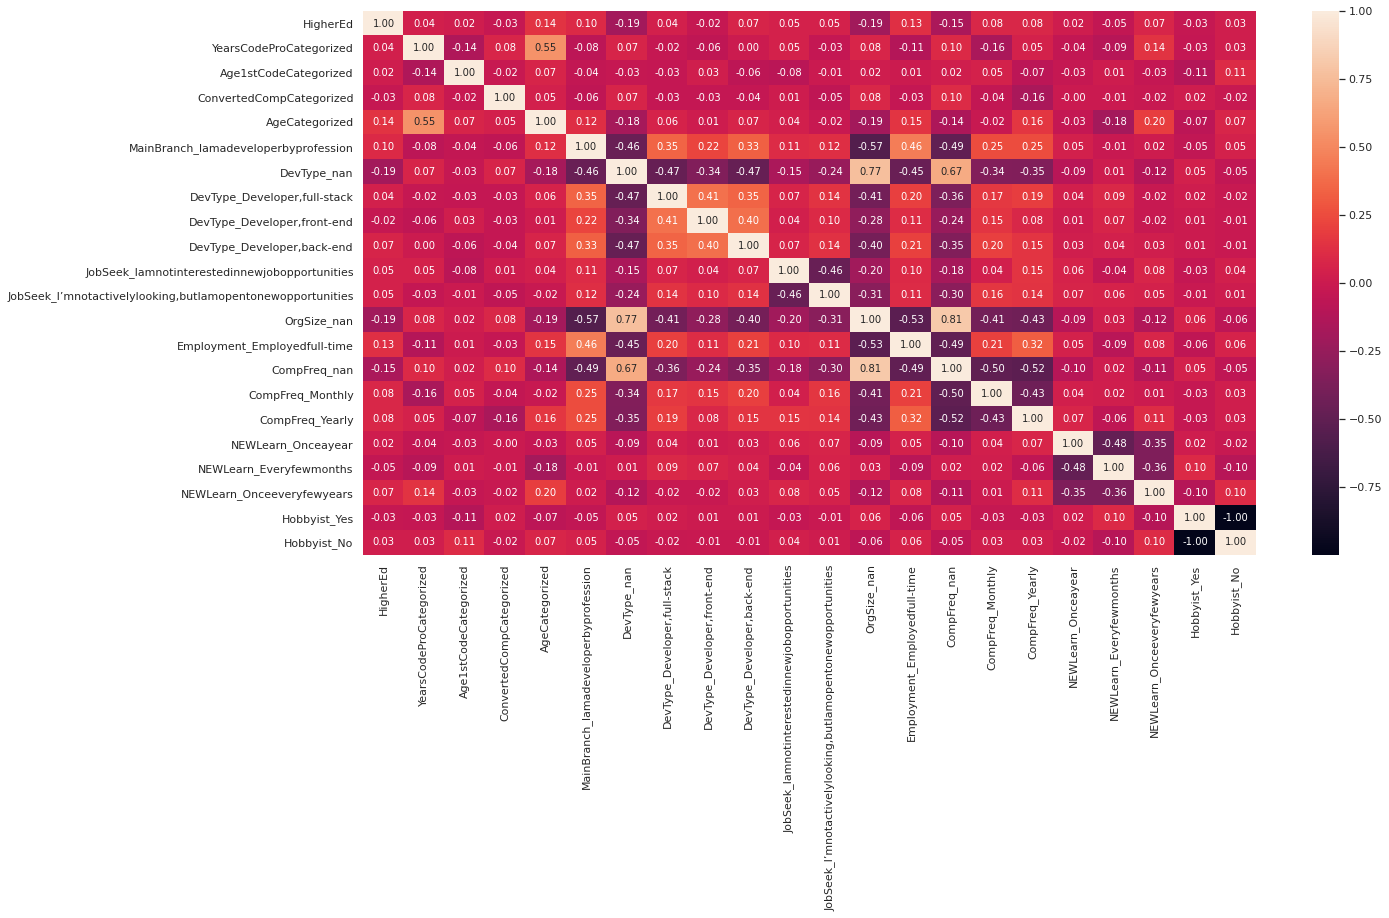

In [53]:
plt.figure(figsize=(20, 10))
sns.heatmap(x_test.corr(), annot=True, fmt='0.2f');

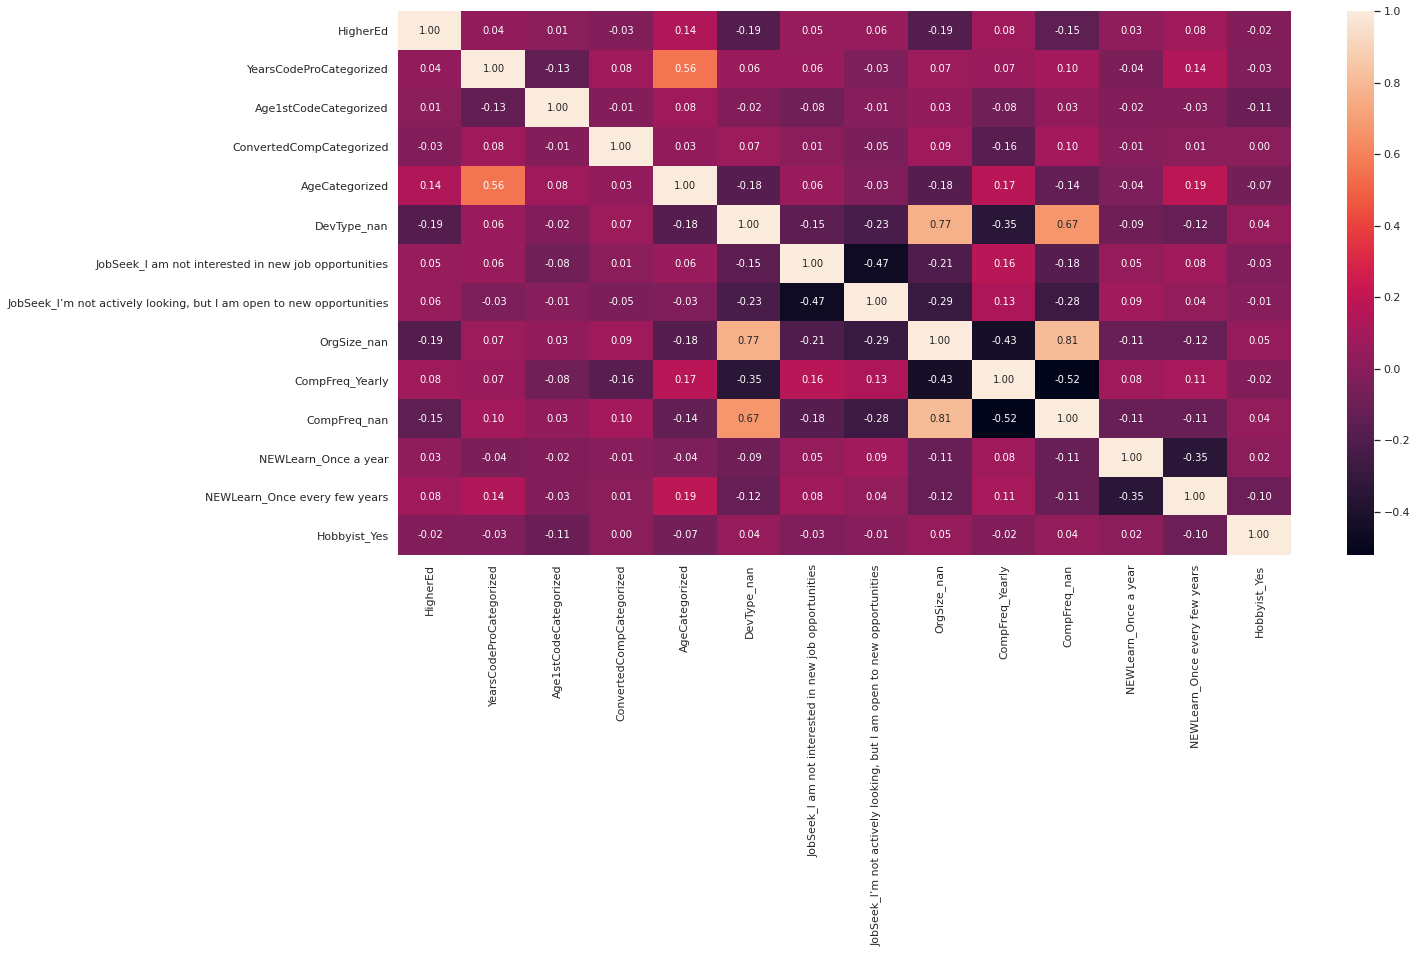

In [23]:
plt.figure(figsize=(20, 10))
sns.heatmap(x_train.corr(), annot=True, fmt='0.2f');

In [54]:
test_score, train_score, lm_model = t.train_linear_model(x_train, y_train, x_test, y_test);
print('test_score:{}, train_score:{},'.format(test_score, train_score))

test_score:0.3790822252742435, train_score:0.37274288086371643,
